In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from clusters import try_clusters_kmeans

from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def cluster_analysis(data, models, n_clusters):
    
    data = data.copy()
    columns = data.columns
    feature = 'cluster'
    data[feature] = models[n_clusters].labels_
    
    print("Cluster size: ",data.groupby(feature).size())
    columns.sort_values()

    for col in columns:
        if col != feature:
            
            fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(14,5), sharey=True)
            ax.invert_xaxis()
            ax.yaxis.tick_right()
            
            tmp = data.groupby([feature, col]).size()/data.groupby([feature]).size()
            pd.DataFrame(tmp).unstack().plot.bar(ax=ax, stacked=True,colormap='copper'
                                                ).legend(loc='center right',bbox_to_anchor=(.05, 0.5))
            plt.title(col,loc='left')
            
            tmp = data.groupby([col,feature]).size()/data.groupby([col]).size()
            pd.DataFrame(tmp).unstack().plot.bar(ax=ax2,stacked=True,colormap='copper'
                                                ).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
            #plt.title(feature)
            plt.show()
           

In [3]:
data = pd.read_csv('../data/base_cluster_group.csv')
for col in data.columns:
    try:
        data[col] = data[col].astype("category")
    except:
        data[col] = data[col]
data.head()

ANO ASSISTMED CAUSAABORTO CAUSADIRETA CAUSAINDIRETA CIRURGIA  ESC  \
0  2010       NaN           0           1             0      2.0  9.0   
1  2010       NaN           0           1             0      1.0  3.0   
2  2010       NaN           0           1             0      9.0  9.0   
3  2010       NaN           0           0             1      9.0  3.0   
4  2010       NaN           0           0             1      2.0  4.0   

  ESC_BAIXA ESTCIV ESTCIVBIN  ... LOCOCORBIN NATURALIDADE NECROPSIA  \
0         0    1.0         2  ...          1            0         2   
1         1    1.0         2  ...          1            0         2   
2         0    1.0         2  ...          1            0         9   
3         1    2.0         1  ...          1            0         2   
4         0    1.0         2  ...          1            0         2   

  NOMEREGOCOR NOMEREGRES OBITOGRAV OBITOPUERP      RACACOR SIGLAUFOCOR  \
0       Norte      Norte       1.0        3.0  Preta_Parda          RO   
1       Norte      Norte       2.0        1.0  Preta_Parda          RO   
2       Norte      Norte       2.0        1.0  Preta_Parda          RO   
3       Norte      Norte       1.0        3.0  Preta_Parda          RO   
4       Norte      Norte       2.0        1.0  Preta_Parda          RO   

  SIGLAUFRES  
0         RO  
1         RO  
2         RO  
3         RO  
4         RO  

[5 rows x 23 columns]

# Kmeans
### RACACOR, ESC, ESTADO_CIVIL, FAIXA_ETARIA

Index(['ESC_BAIXA_0', 'ESC_BAIXA_1', 'ESTCIVBIN_1', 'ESTCIVBIN_2',
       'ESTCIVBIN_9', 'FAIXA_ETARIA_14 ou menos ', 'FAIXA_ETARIA_15-19',
       'FAIXA_ETARIA_20-29', 'FAIXA_ETARIA_30-39', 'FAIXA_ETARIA_40-49',
       'FAIXA_ETARIA_50 +', 'RACACOR_Branca', 'RACACOR_Preta_Parda'],
      dtype='object')


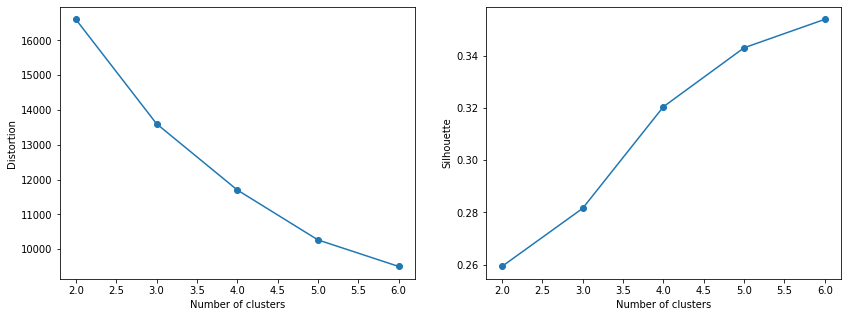

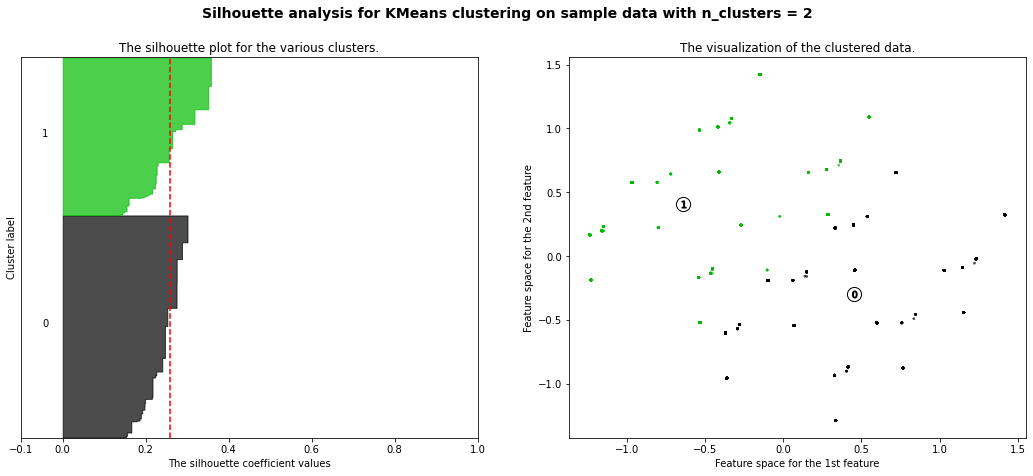

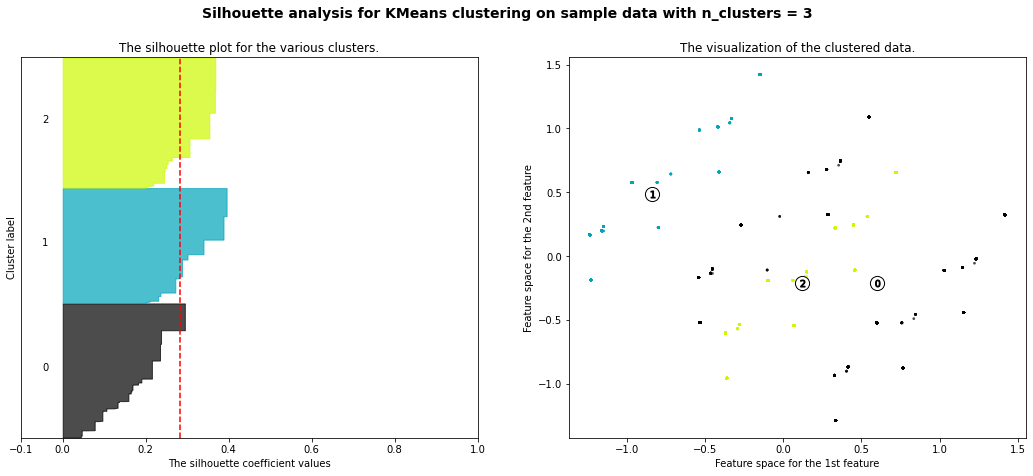

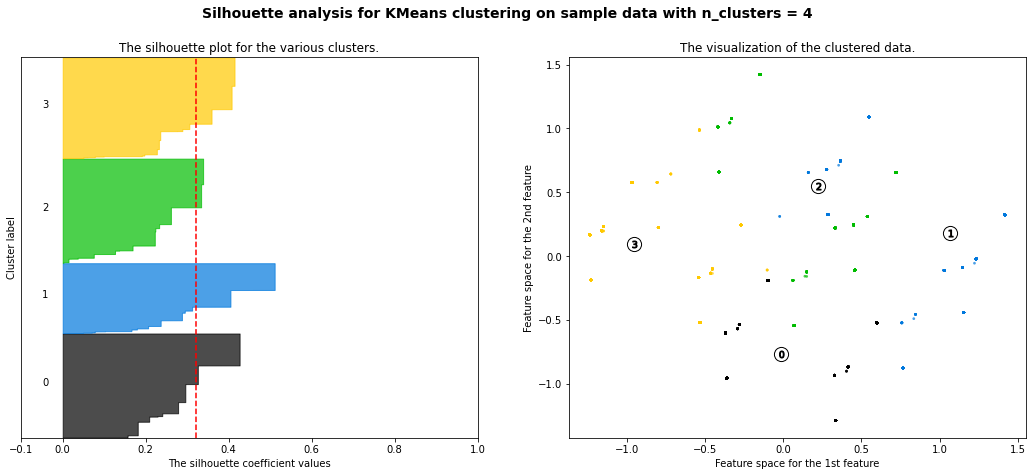

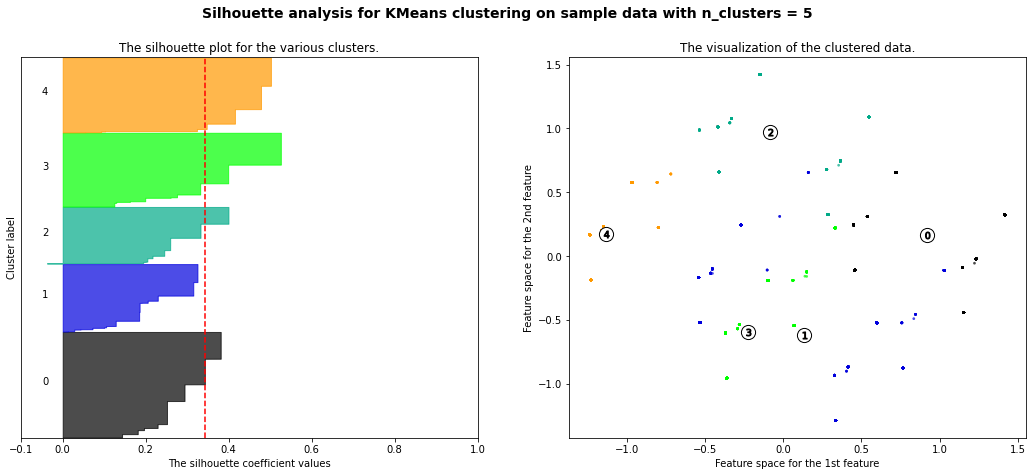

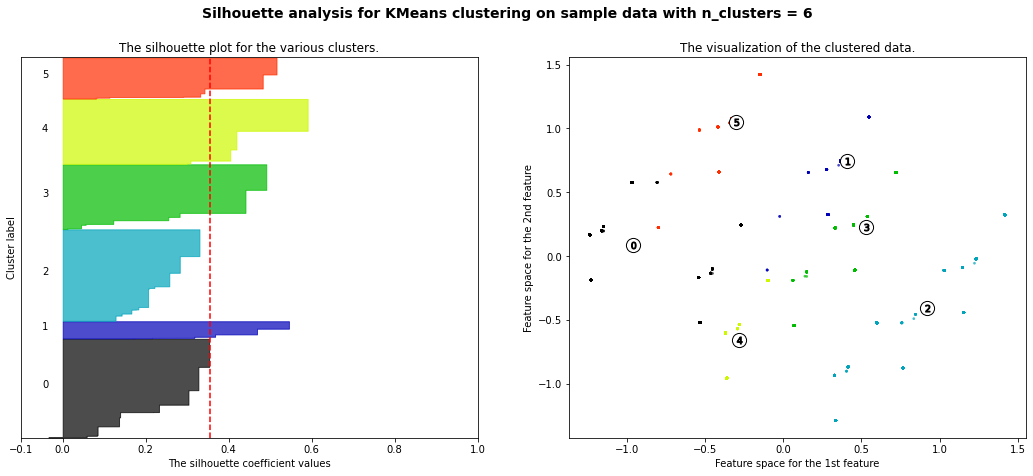

In [25]:
cluster_basico = data[['ESC_BAIXA', 'ESTCIVBIN', 'FAIXA_ETARIA', 'RACACOR']]
cluster_basico = pd.get_dummies(cluster_basico)

new_columns = []
for col in cluster_basico.columns:
    new_columns.append(col.split(".")[0])
    
cluster_basico.columns = new_columns
pca = PCA(n_components=5)
cluster_basico_comp = pca.fit_transform(cluster_basico)
print(cluster_basico.columns)

models = try_clusters_kmeans(X = cluster_basico, range_n_clusters=6)

Cluster size:  cluster
0    5957
1    4223
dtype: int64


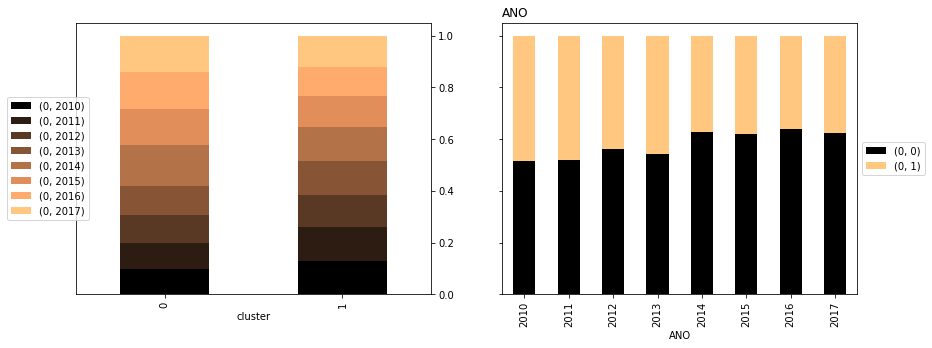

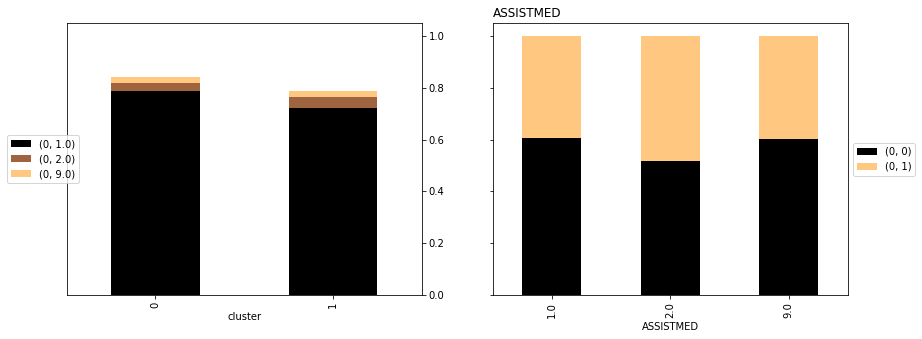

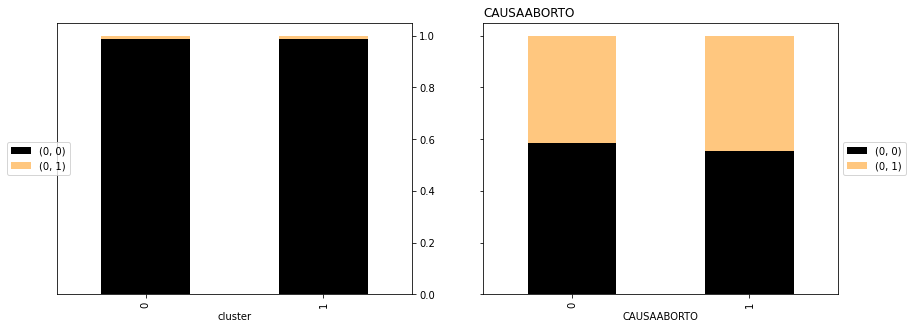

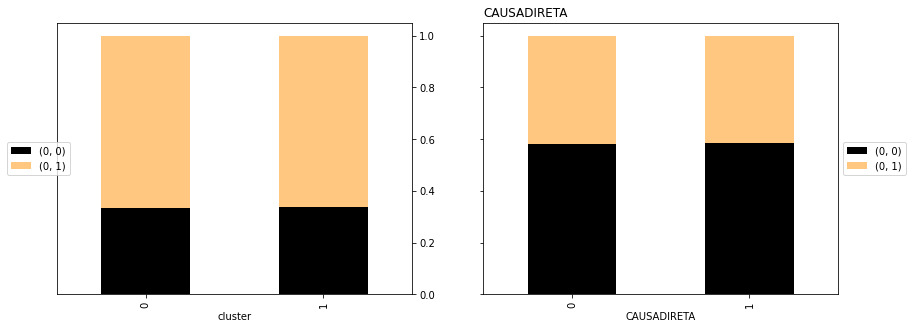

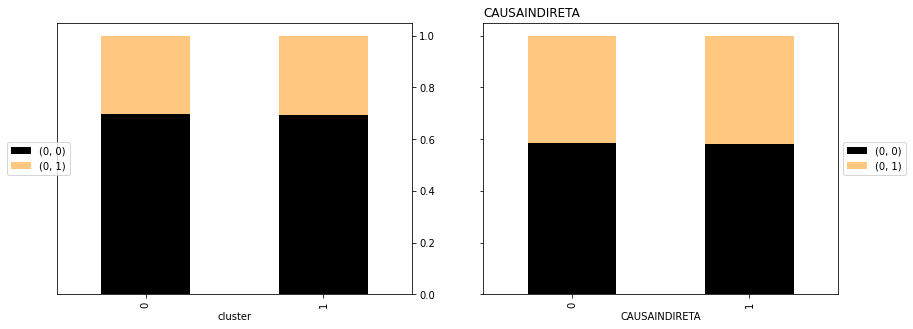

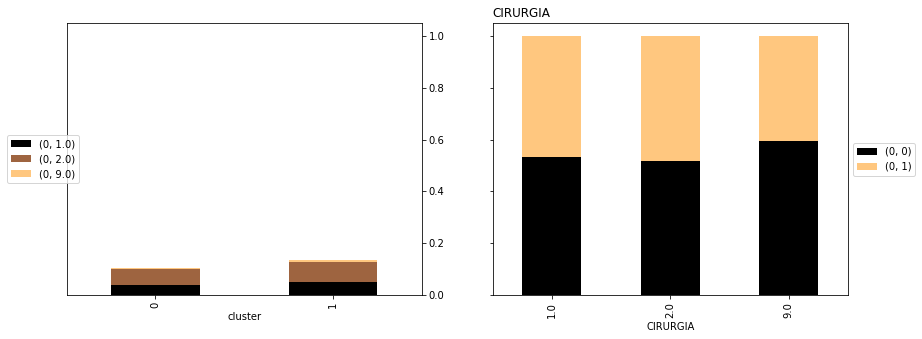

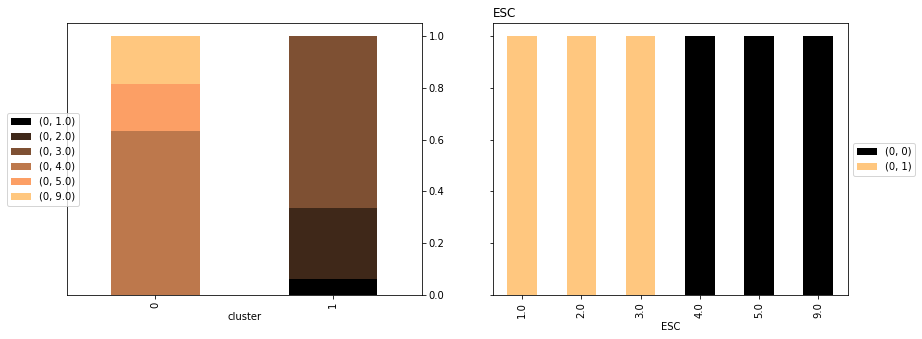

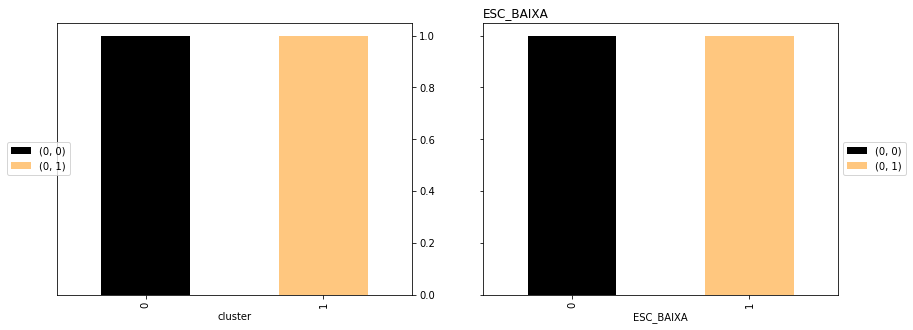

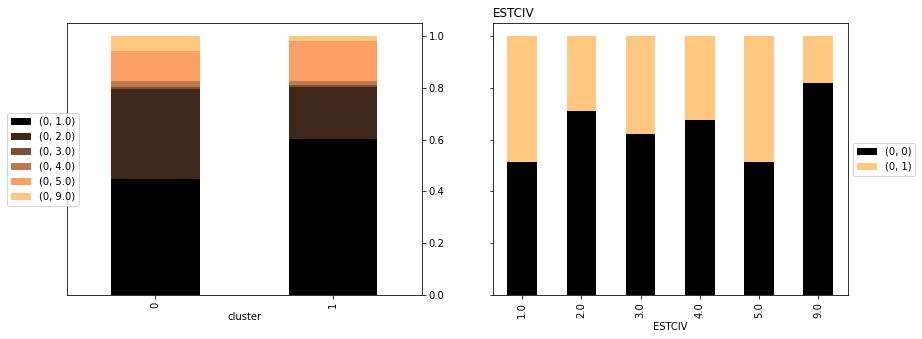

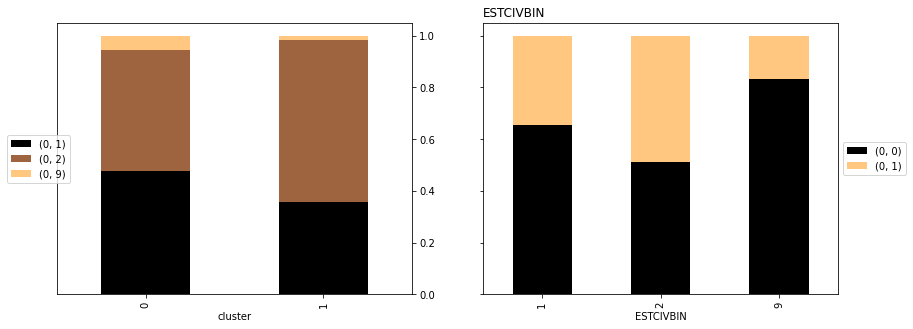

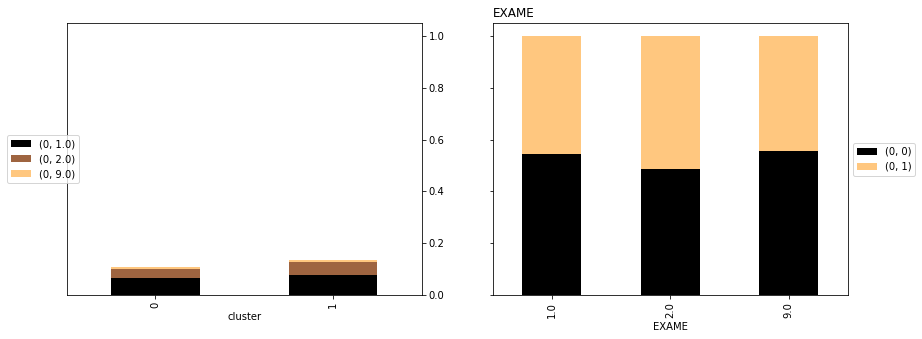

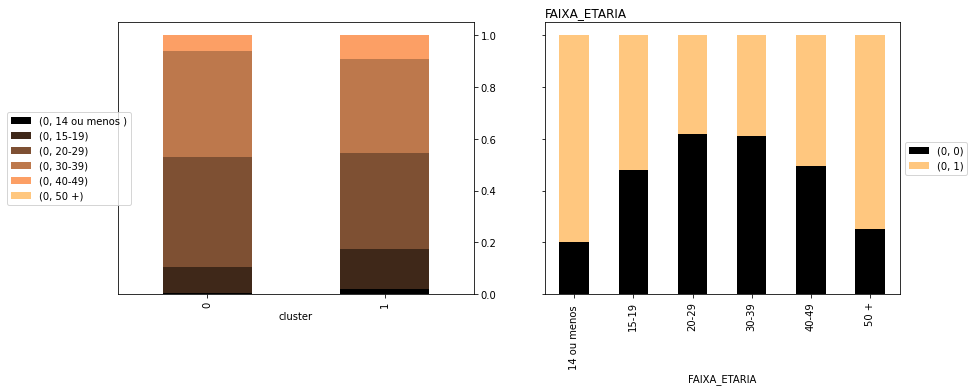

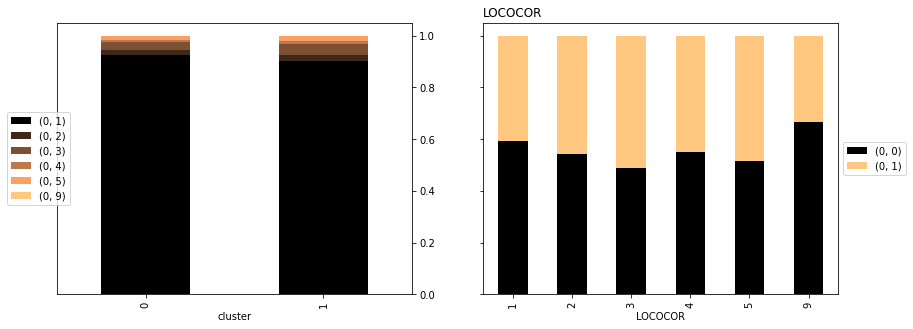

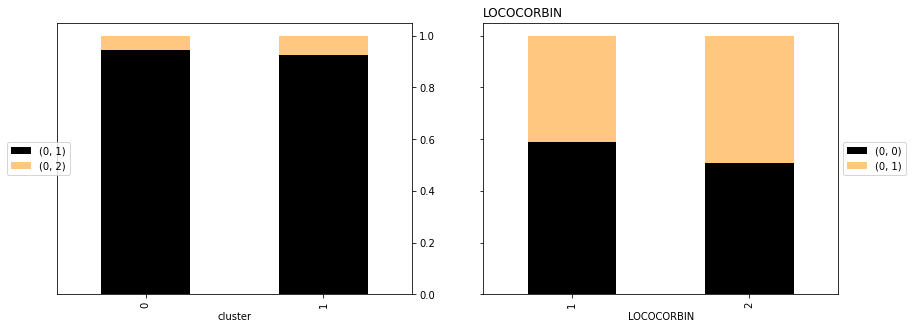

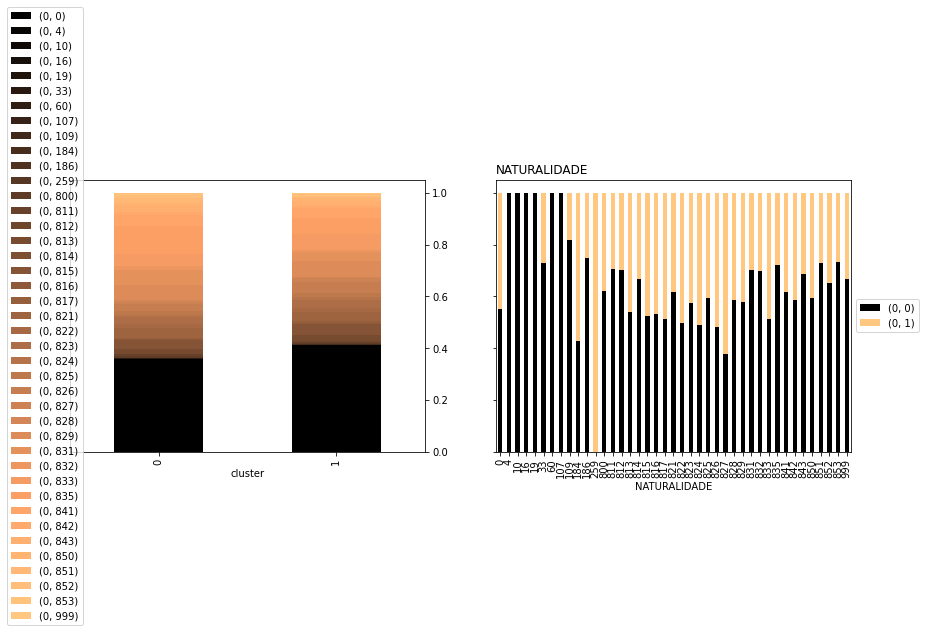

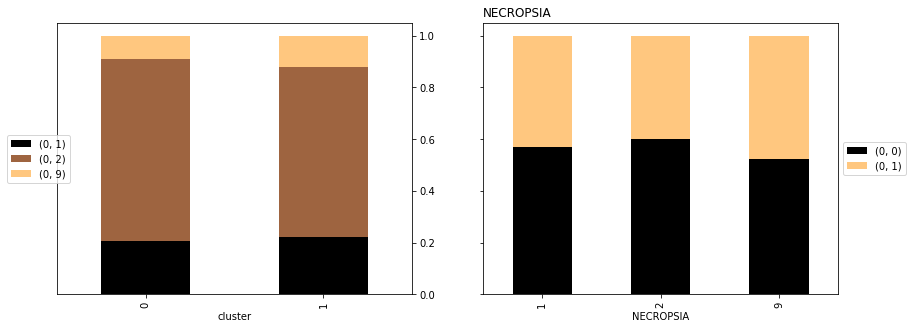

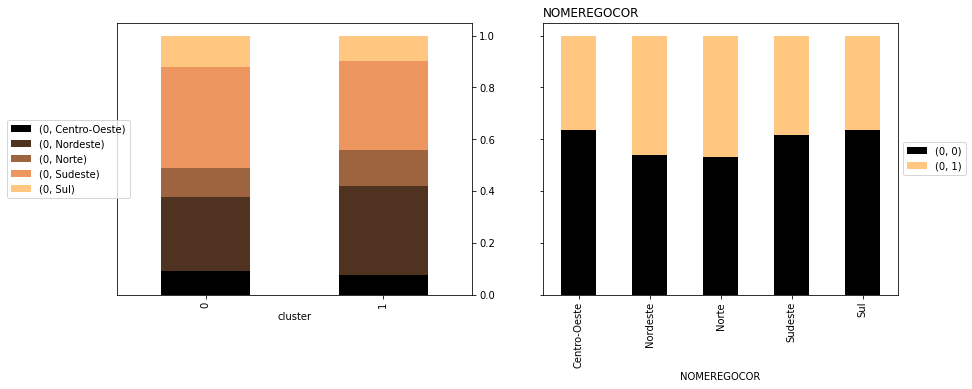

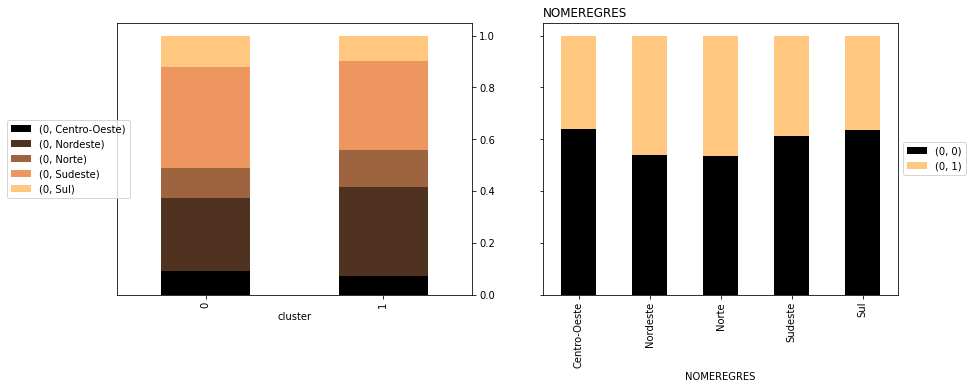

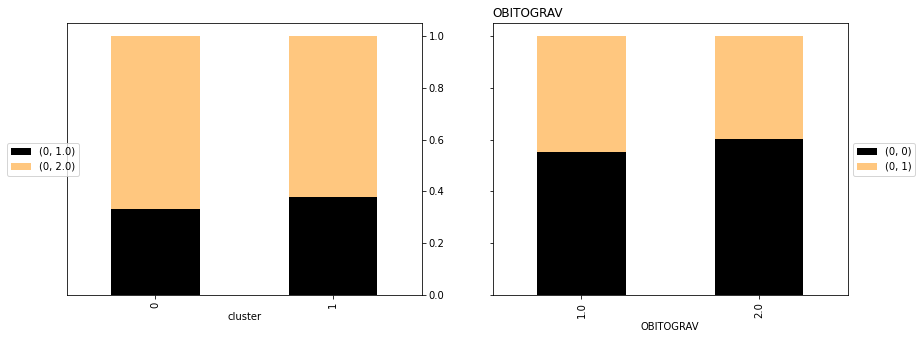

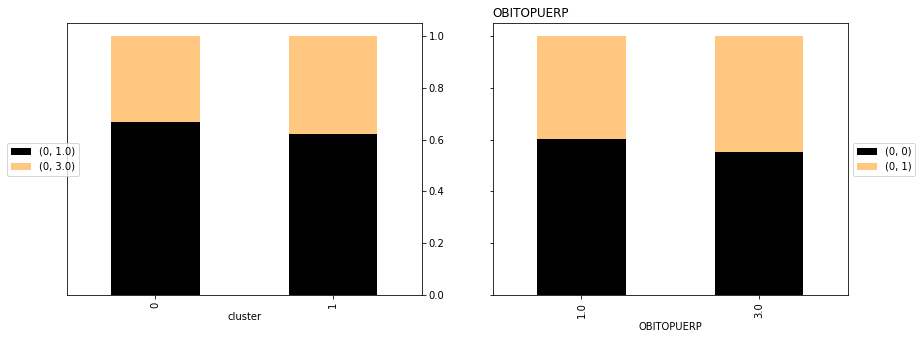

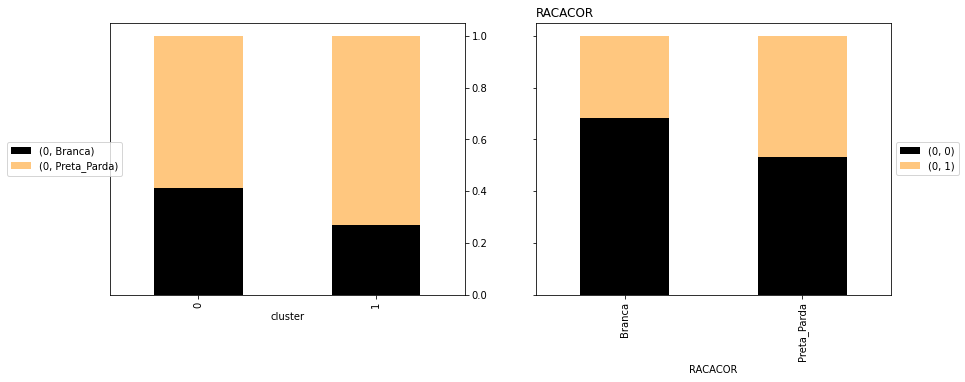

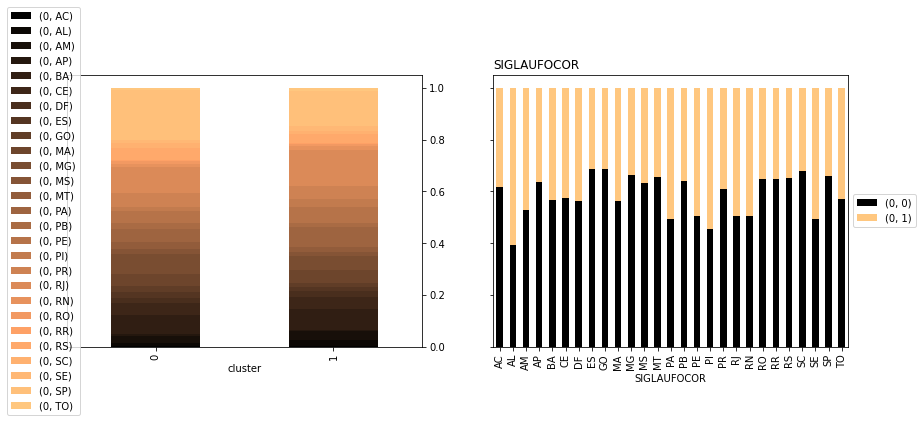

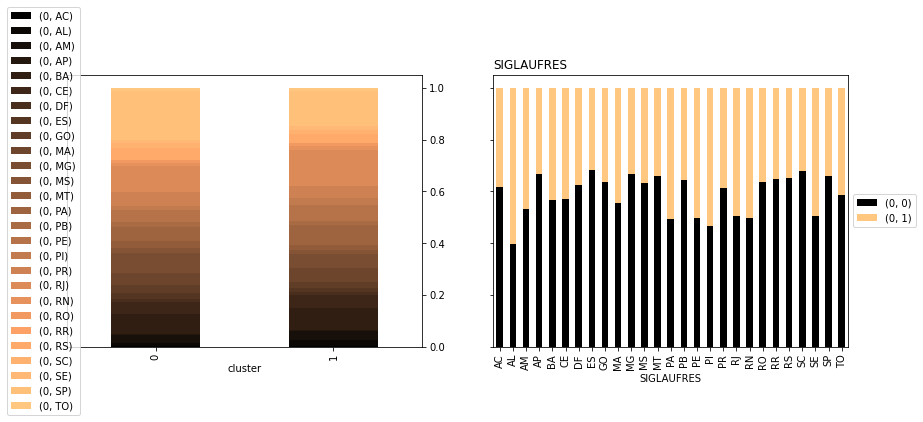

In [26]:
cluster_analysis(n_clusters = 2, models = models, data=data)

In [30]:
from pandas_profiling import ProfileReport
data['cluster'] = models[2].labels_
data.rename({"ESTCIVBIN":"POSSUICOMP"}, axis=0,inplace=True)

profile = ProfileReport(data.loc[data.cluster == 0], title='Mortalidade Materna KMeans Cluster 0', minimal=True)
profile.to_file(output_file="report_mortalidade_materna_kmeans_cluster_0.html")

profile = ProfileReport(data.loc[data.cluster == 1], title='Mortalidade Materna KMeans Cluster 1', minimal=True)
profile.to_file(output_file="report_mortalidade_materna_kmeans_cluster_1.html")

# Agrupamento por região Sul

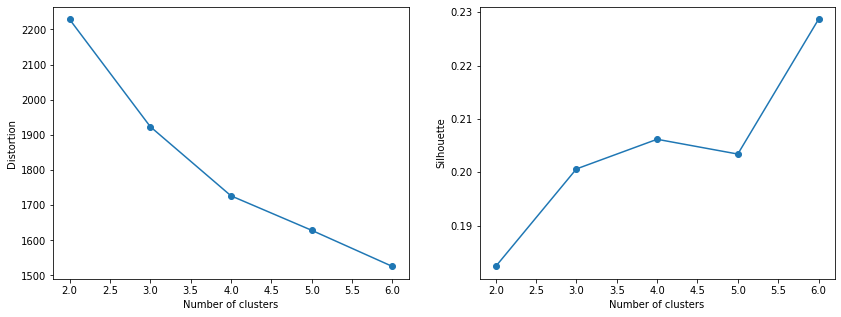

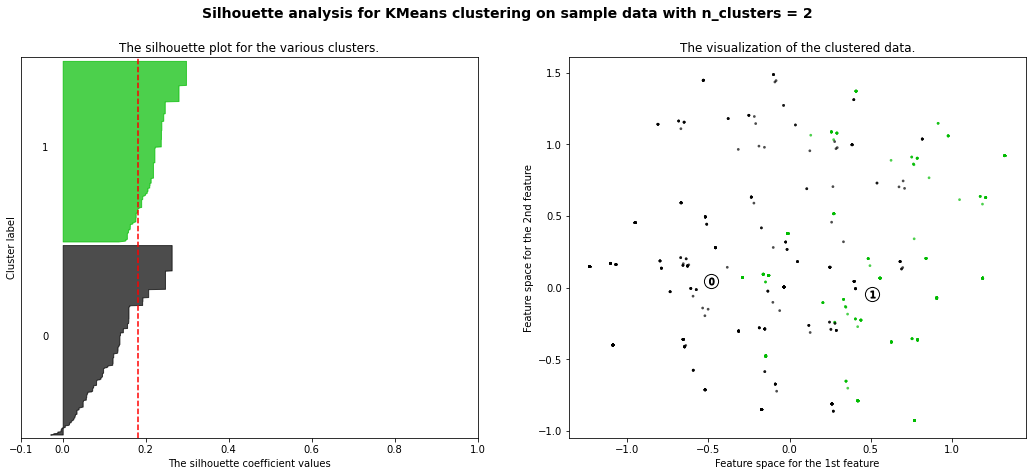

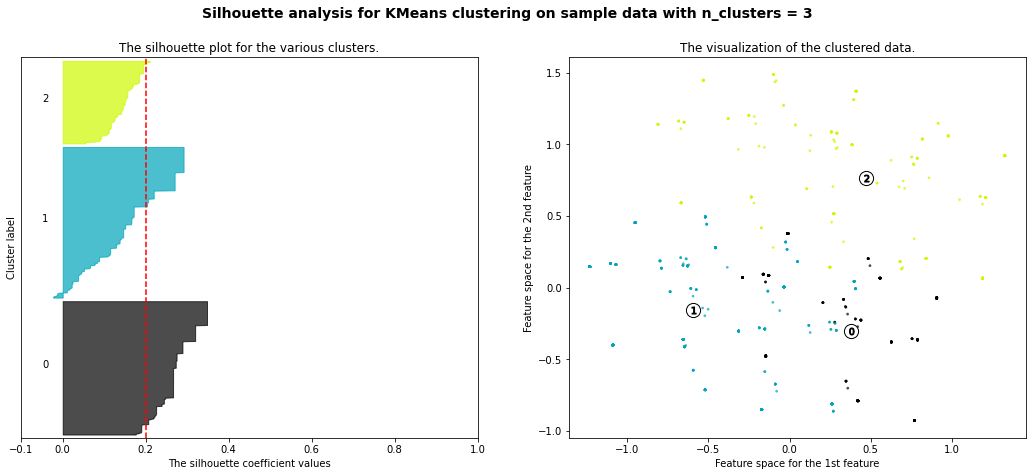

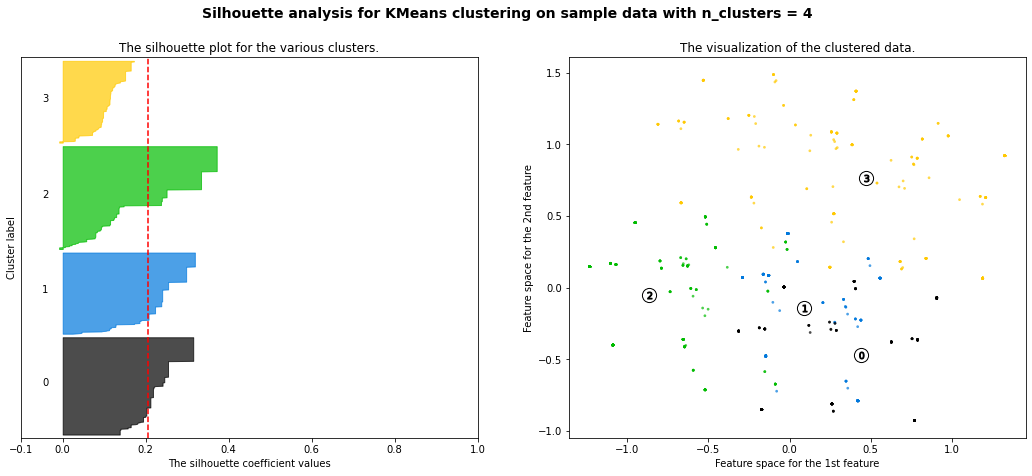

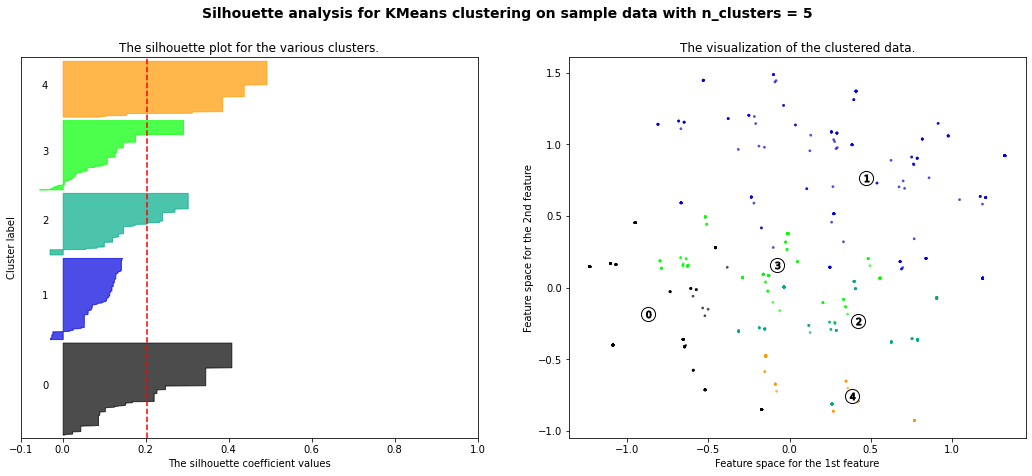

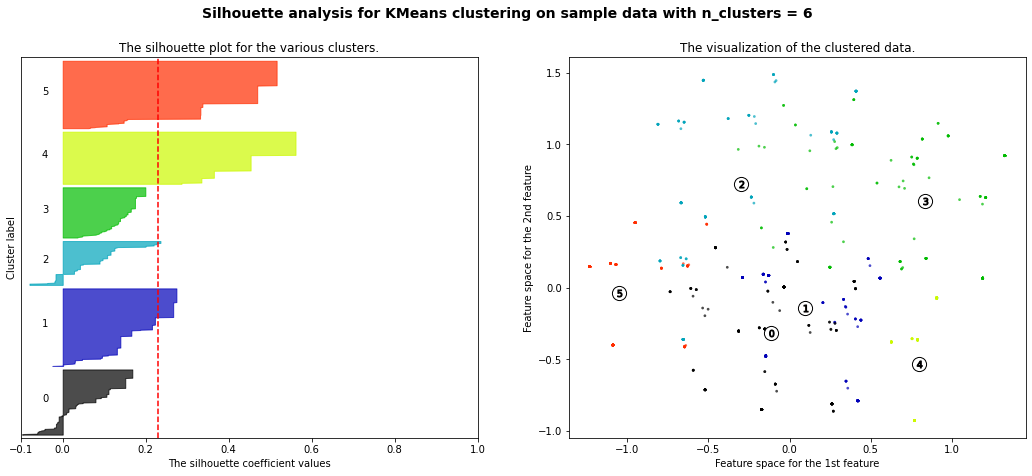

In [27]:
regiao = "Sul"

columns_simple = ['ESC', 'ESTCIV', 'FAIXA_ETARIA', 'RACACOR']
columns_complex = [ 'ESC', 'ESTCIV', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP', 'CAUSADIRETA', 'RACACOR']


cluster_sul = data.loc[data.NOMEREGOCOR == regiao,columns_simple]
cluster_sul = pd.get_dummies(cluster_sul)
cluster_sul.fillna(0, inplace=True)

new_columns = []
for col in cluster_sul.columns:
    new_columns.append(col.split(".")[0])    
cluster_sul.columns = new_columns

models_sul = try_clusters_kmeans(X = cluster_sul, range_n_clusters=6)

Cluster size:  cluster
0    288
1    254
2    193
3    217
4    175
dtype: int64


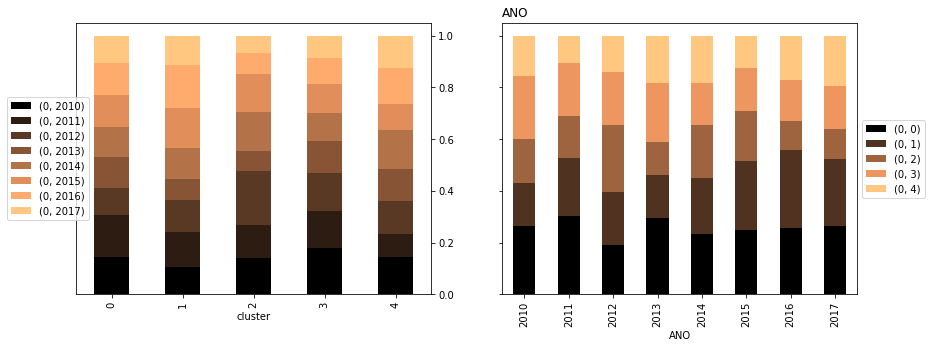

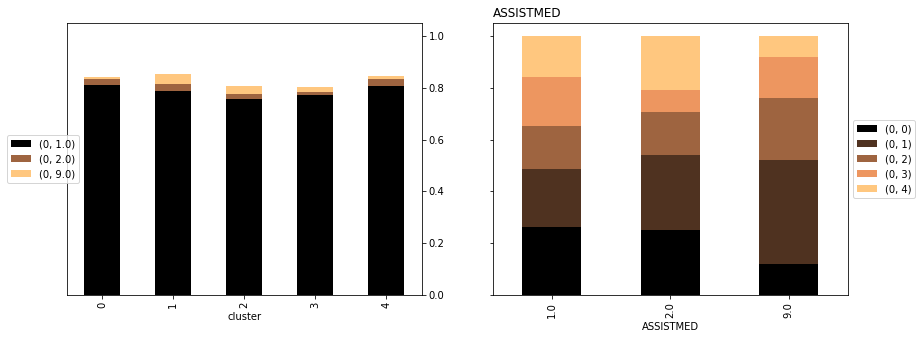

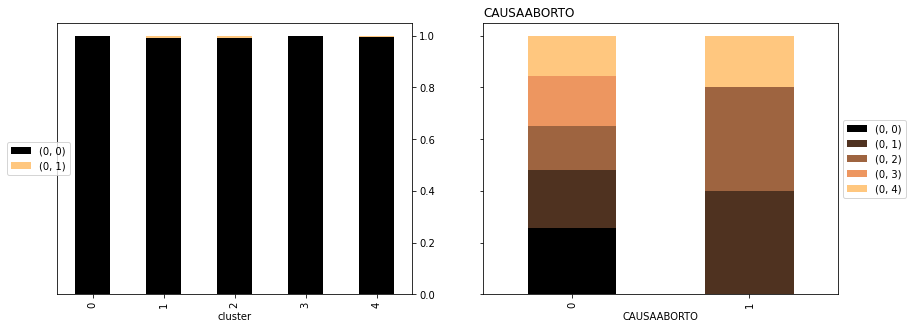

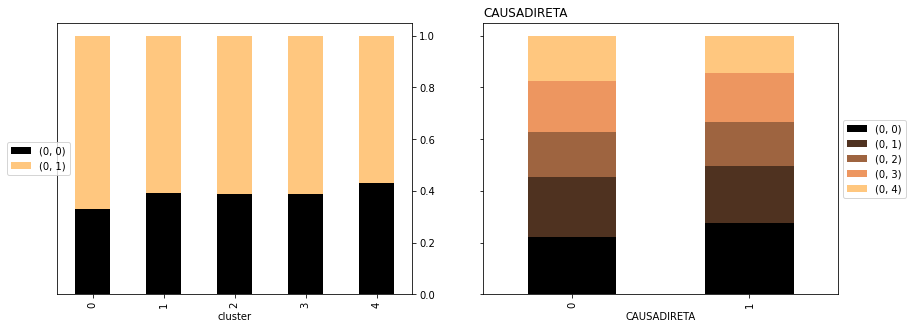

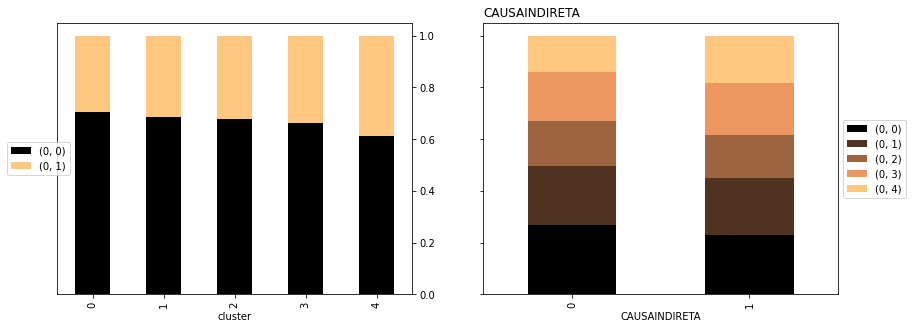

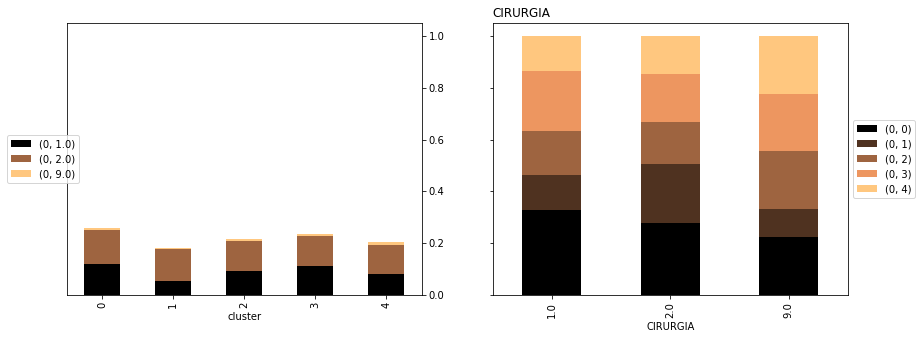

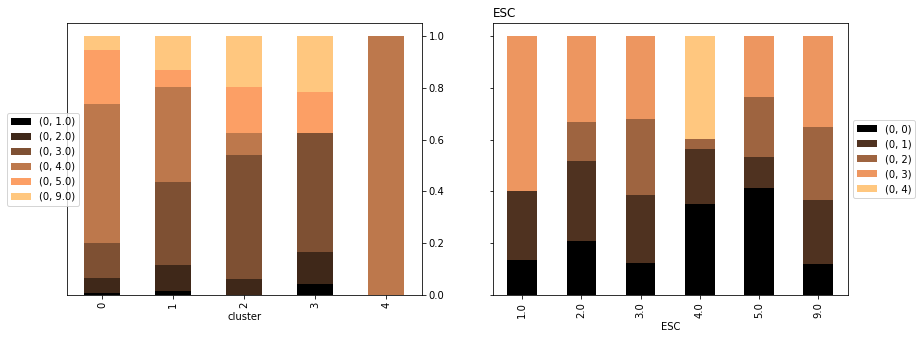

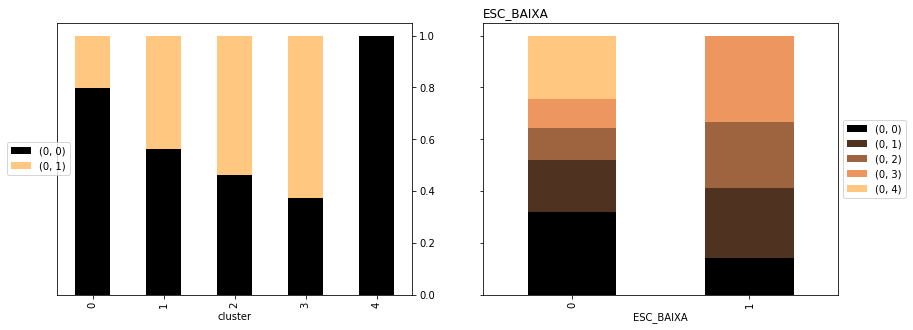

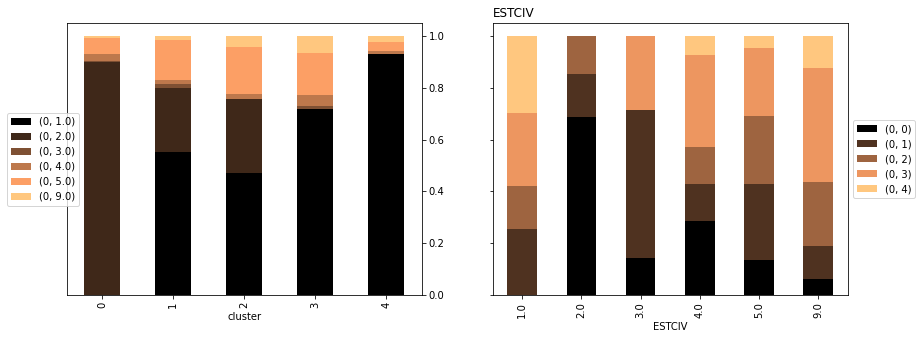

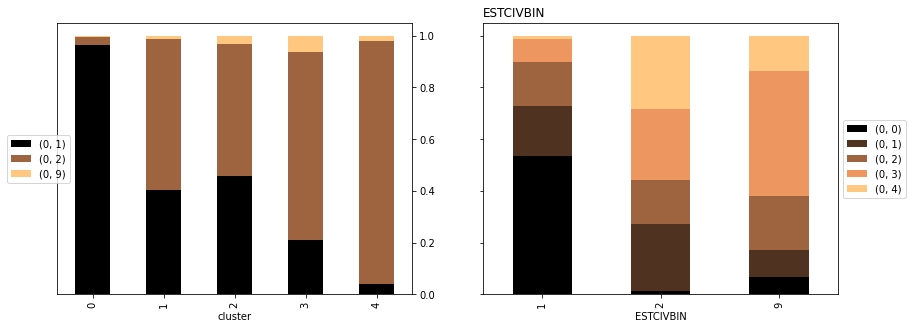

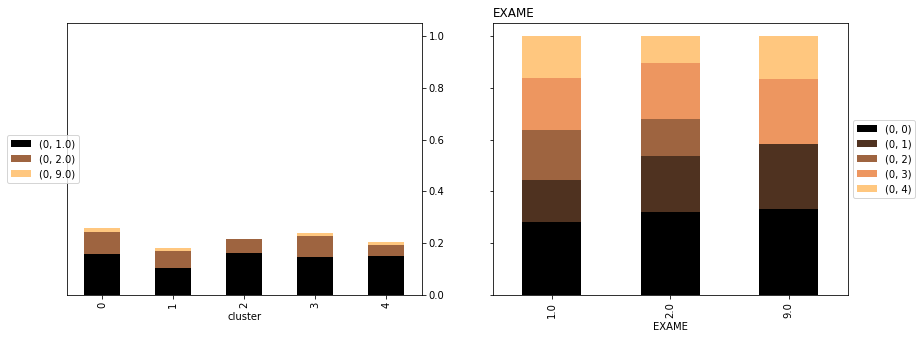

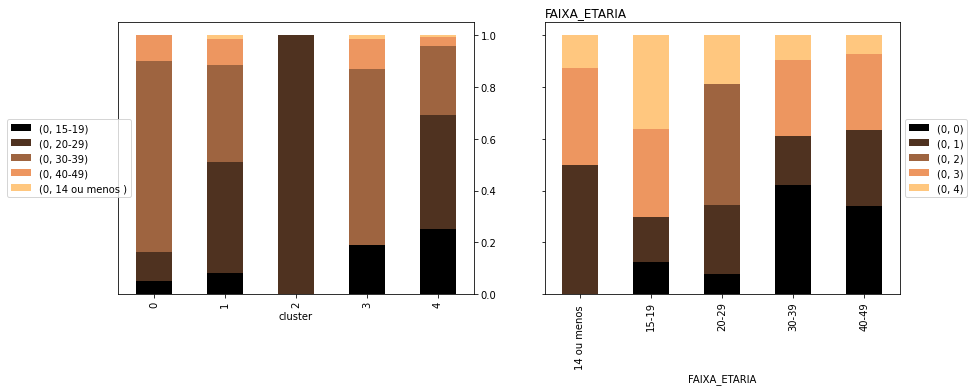

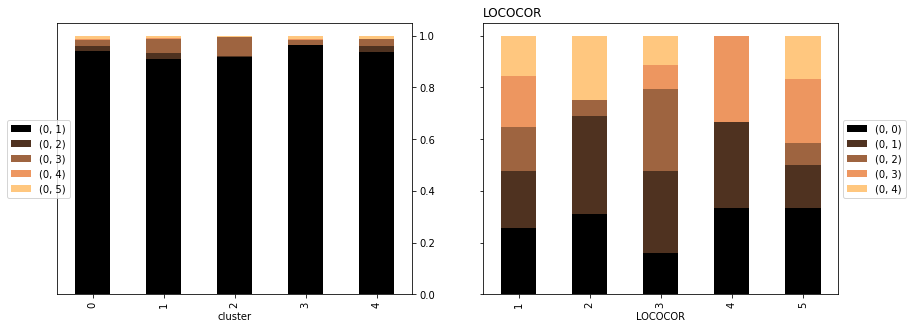

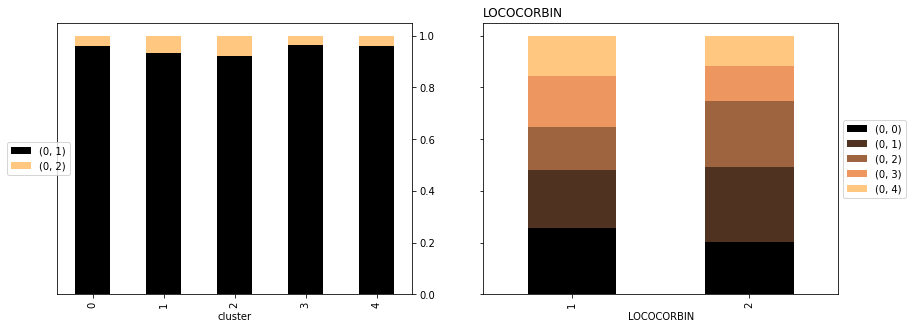

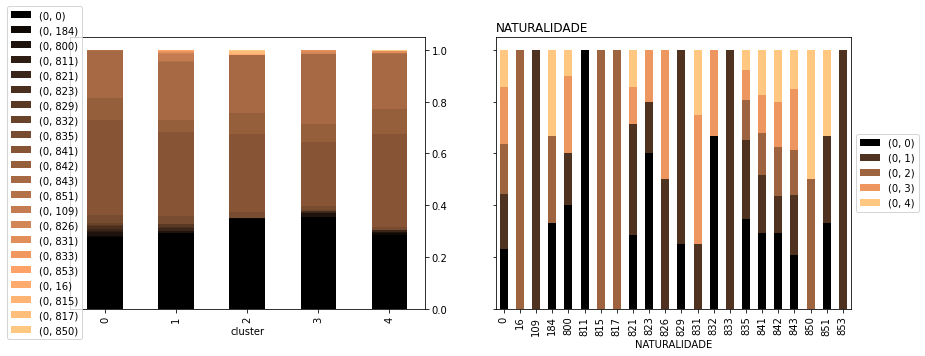

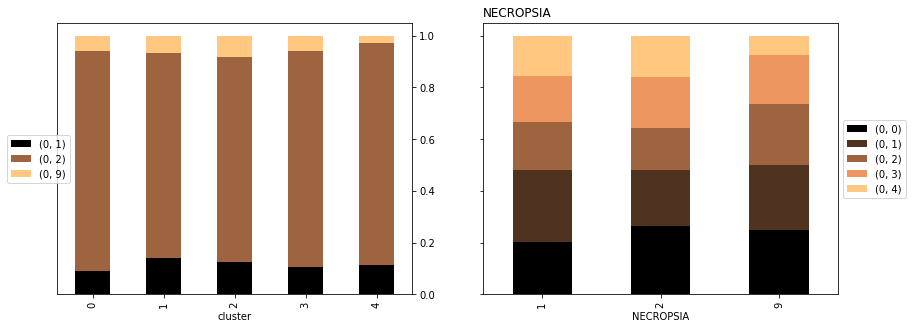

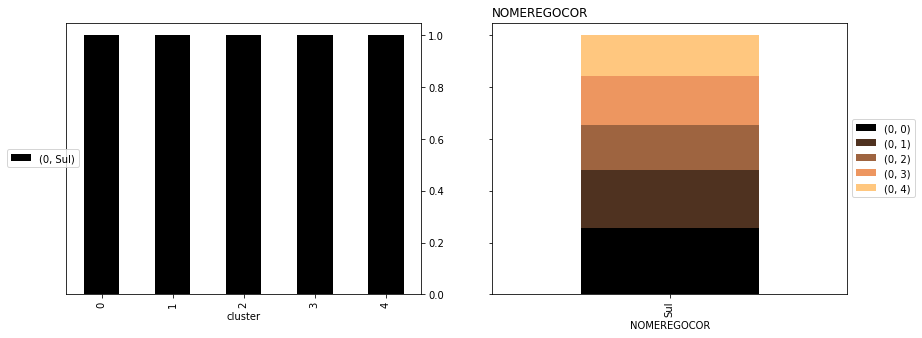

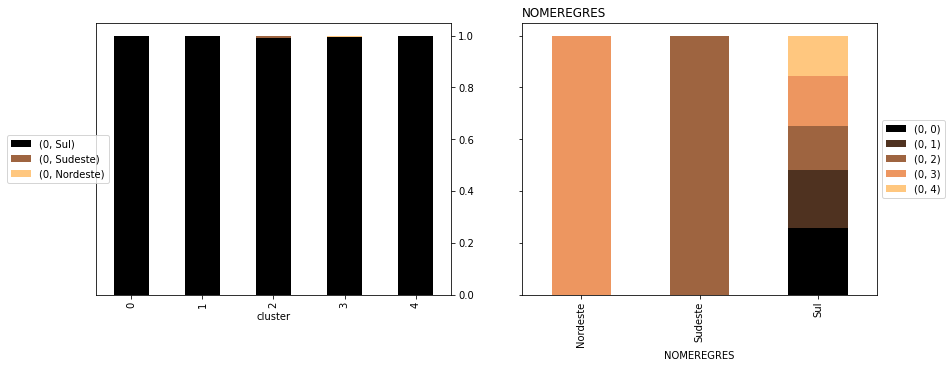

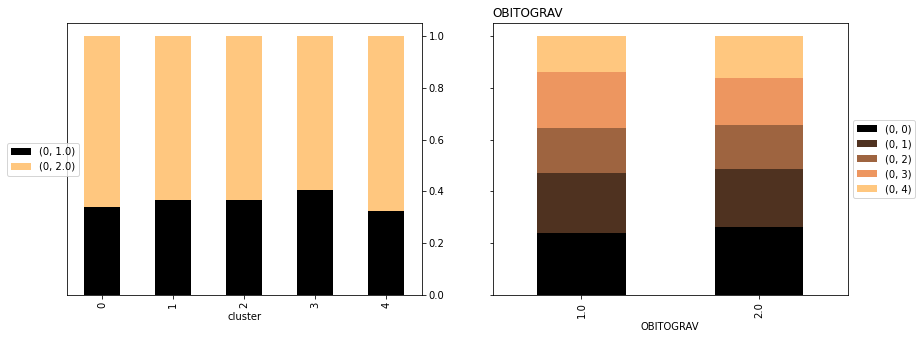

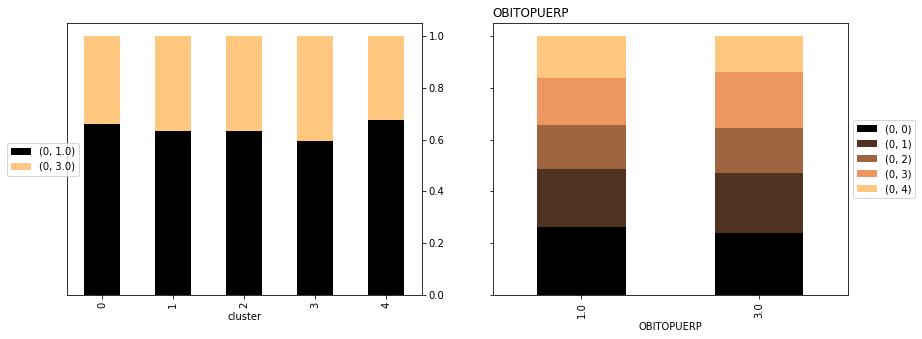

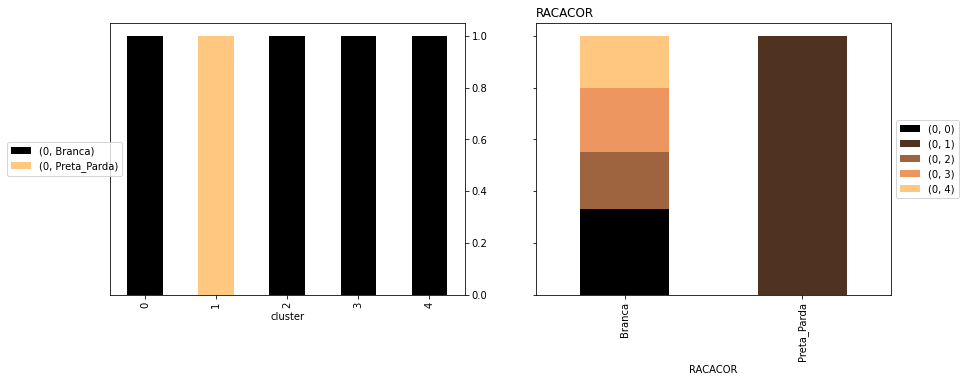

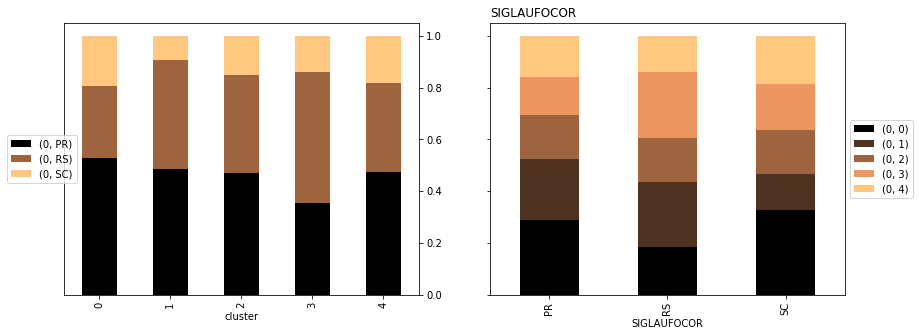

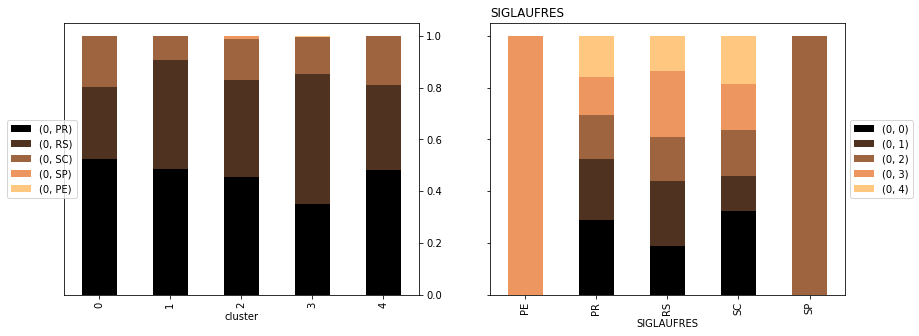

In [28]:
data_sul = data.loc[data.NOMEREGOCOR == regiao]
cluster_analysis(n_clusters = 5, models = models_sul, data=data_sul)

# Agrupamento por região Sudeste

In [29]:
regiao = "Sudeste"

columns_simple = ['ESC', 'ESTCIV', 'FAIXA_ETARIA', 'RACACOR']
columns_complex = [ 'ESC', 'ESTCIV', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP',  'CAUSADIRETA','RACACOR',


cluster_sudeste = data.loc[data.NOMEREGOCOR == regiao,columns_simple]

cluster_sudeste = pd.get_dummies(cluster_sudeste)
cluster_sudeste.fillna(0, inplace=True)

new_columns = []
for col in cluster_sudeste.columns:
    new_columns.append(col.split(".")[0])    
cluster_sudeste.columns = new_columns

models_sudeste = try_clusters_kmeans(X = cluster_sudeste, range_n_clusters=6)

SyntaxError: invalid syntax (<ipython-input-29-fdaad4427f18>, line 8)

Cluster size:  cluster
0    955
1    756
2    896
3    638
4    538
dtype: int64


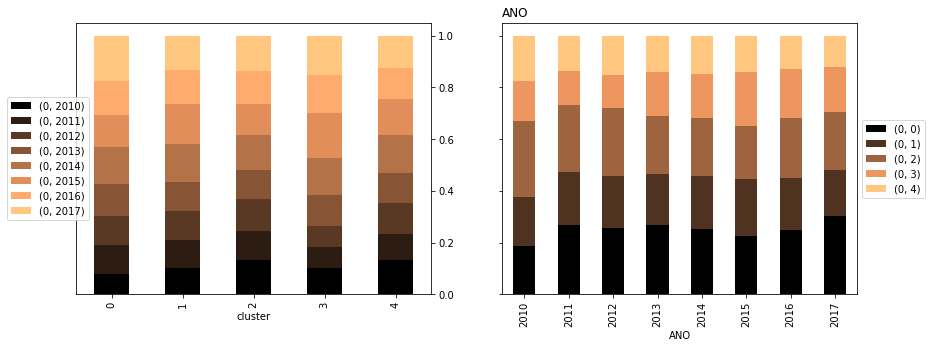

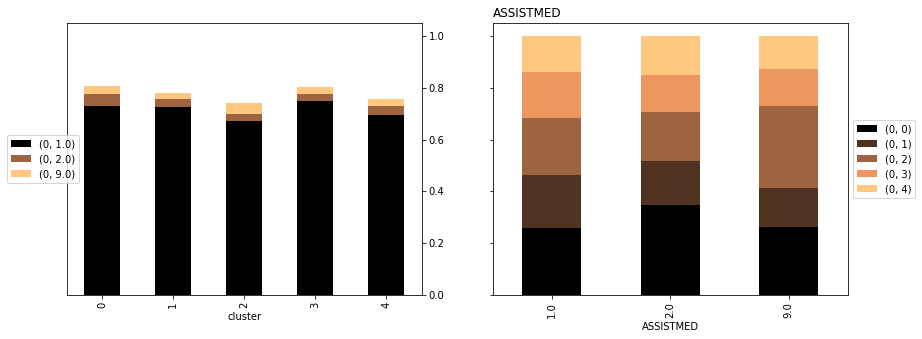

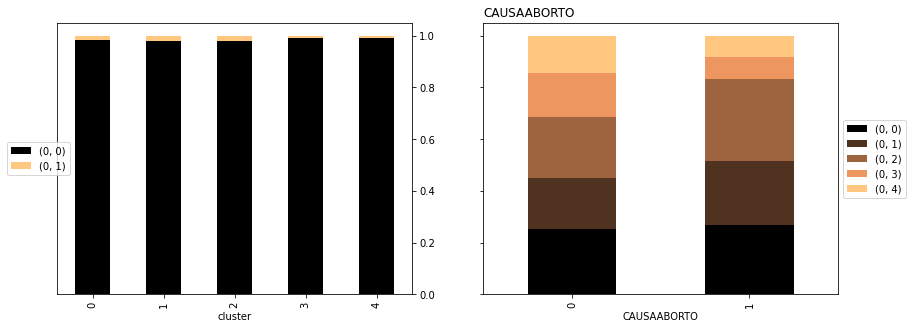

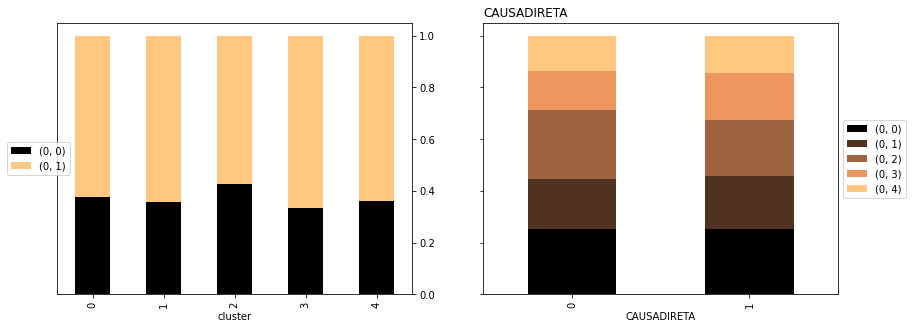

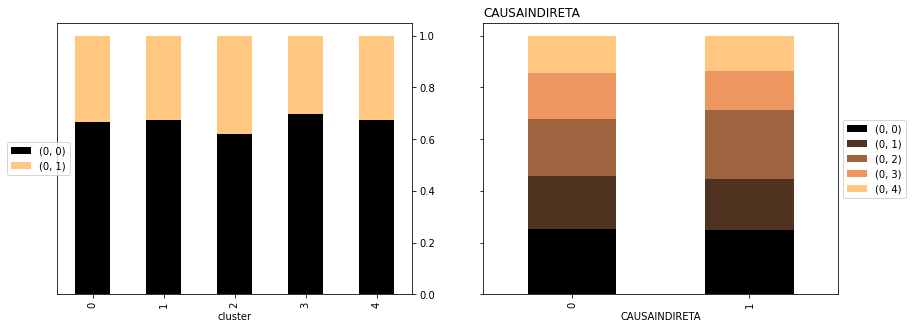

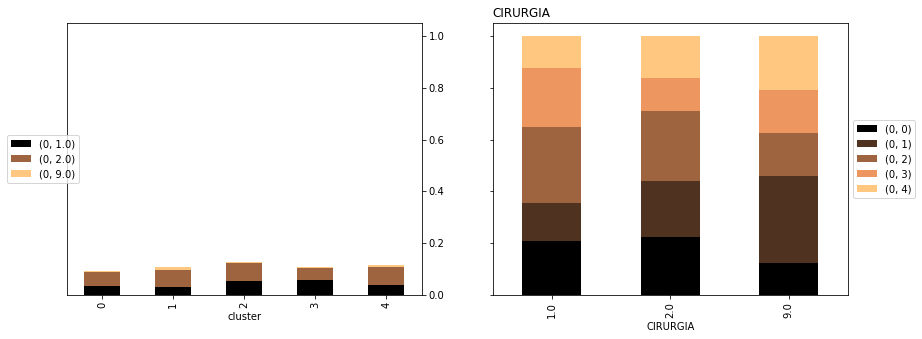

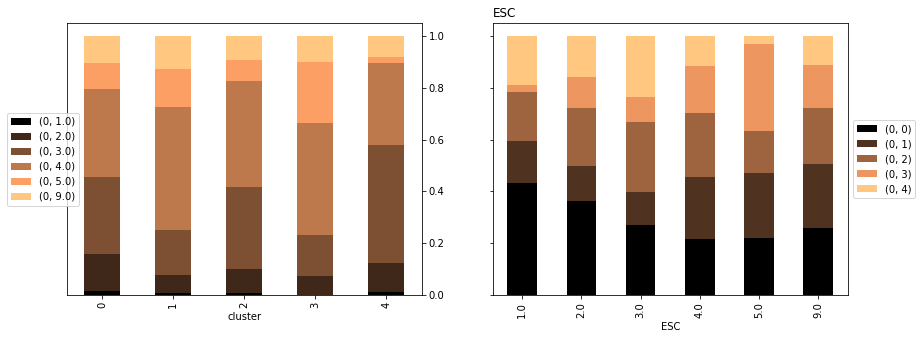

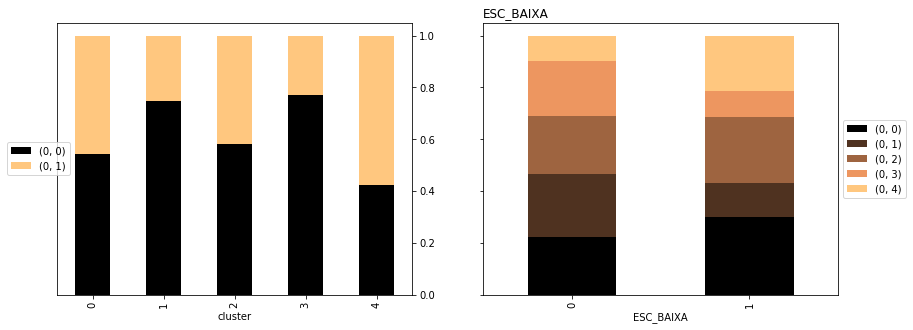

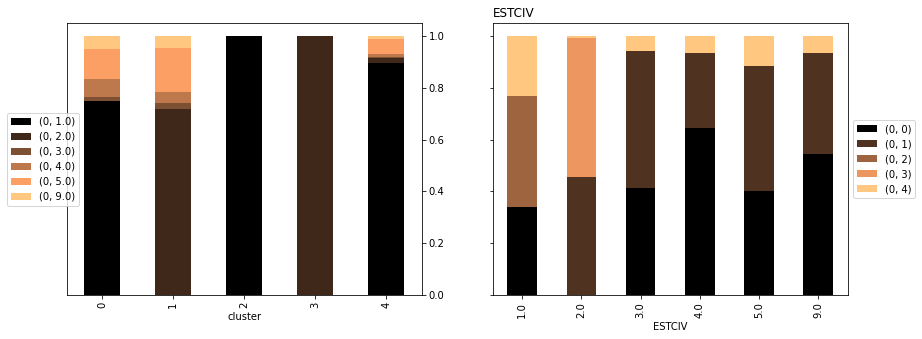

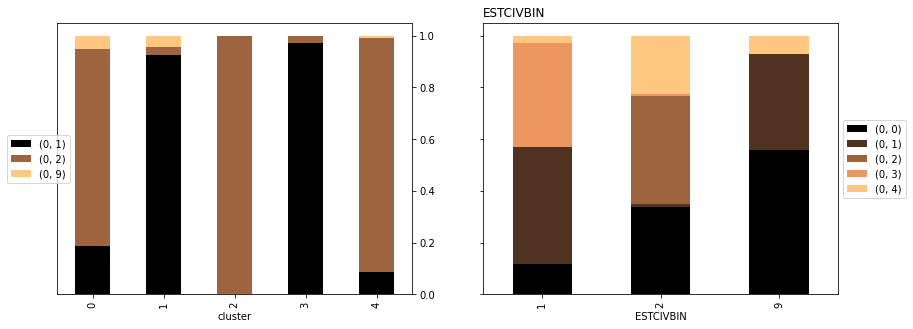

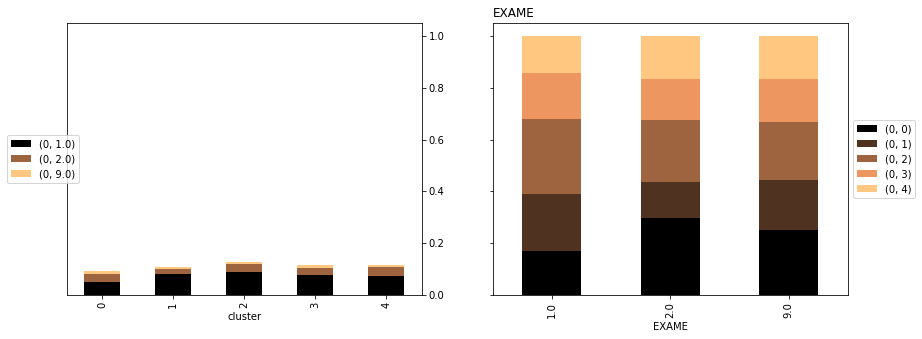

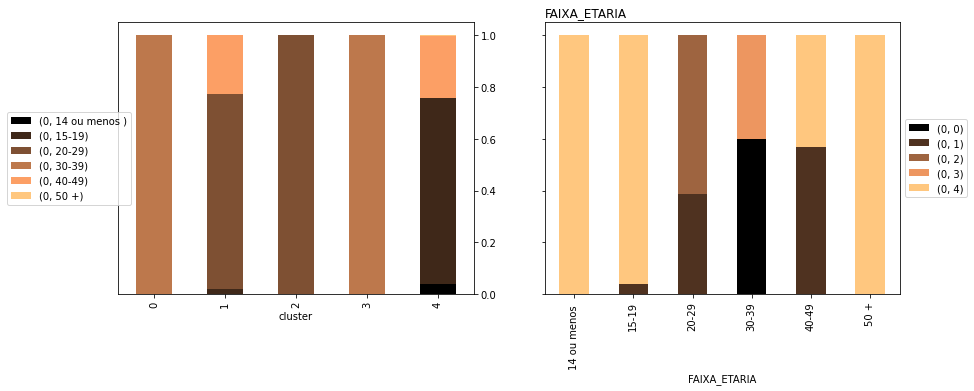

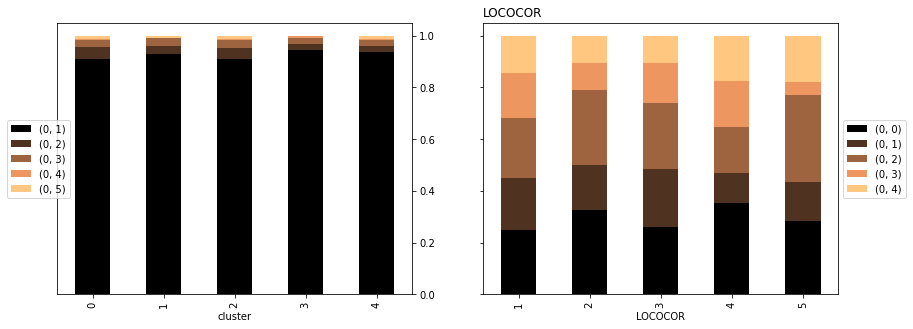

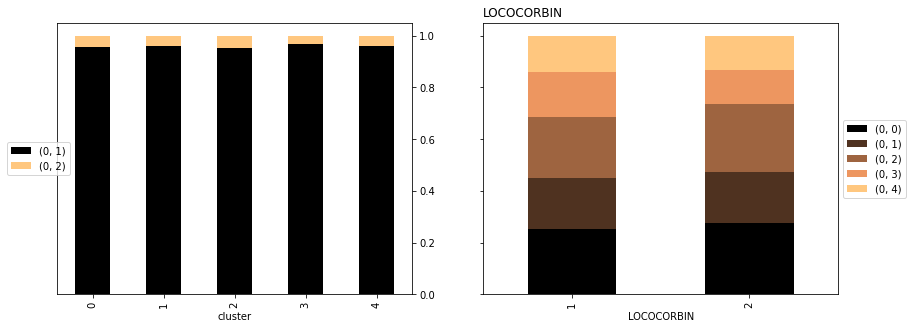

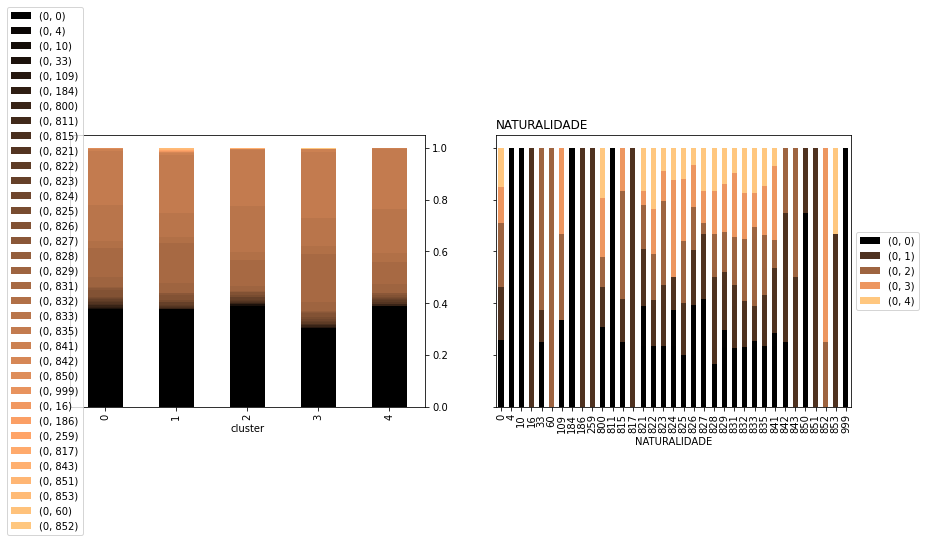

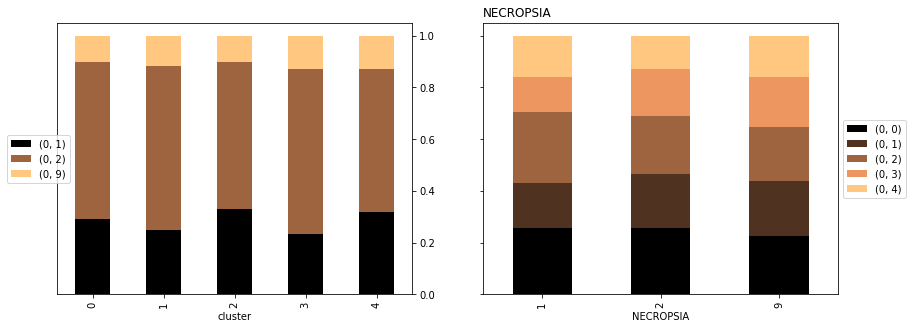

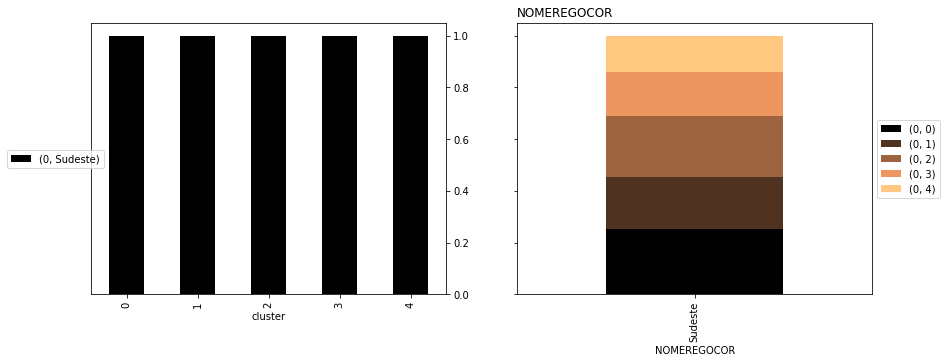

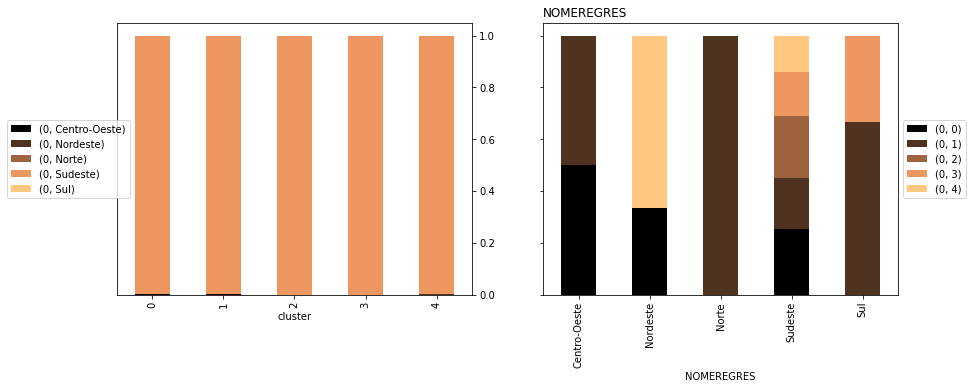

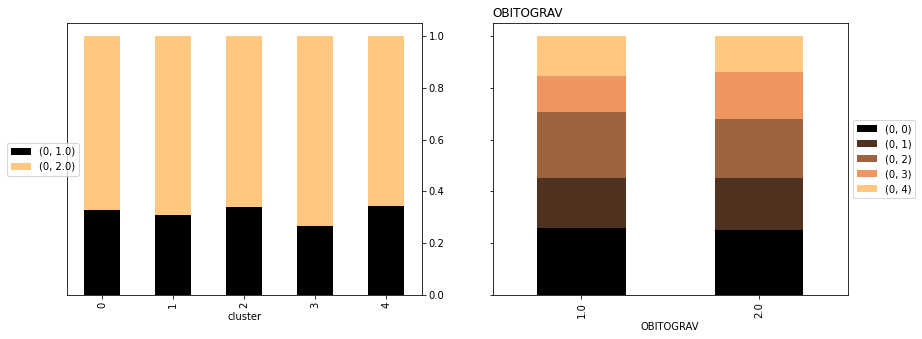

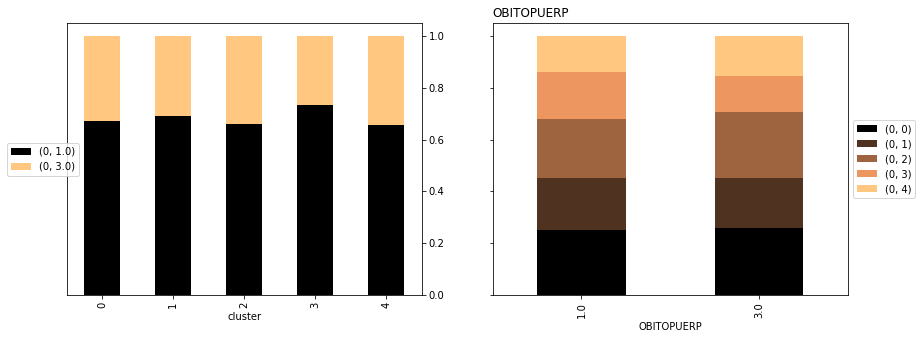

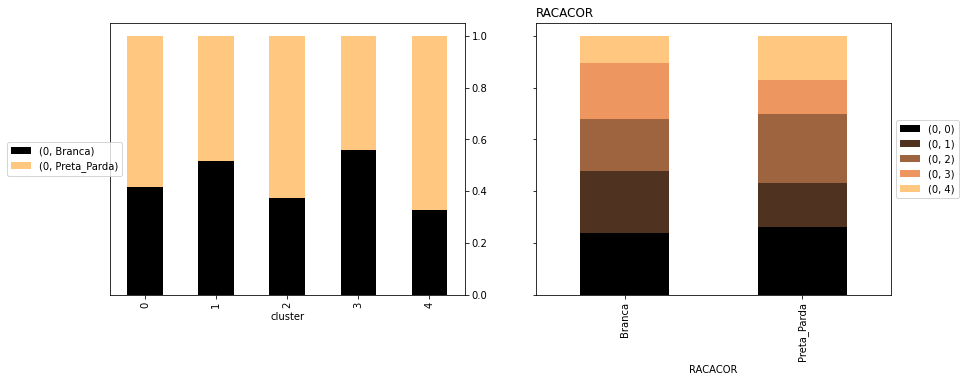

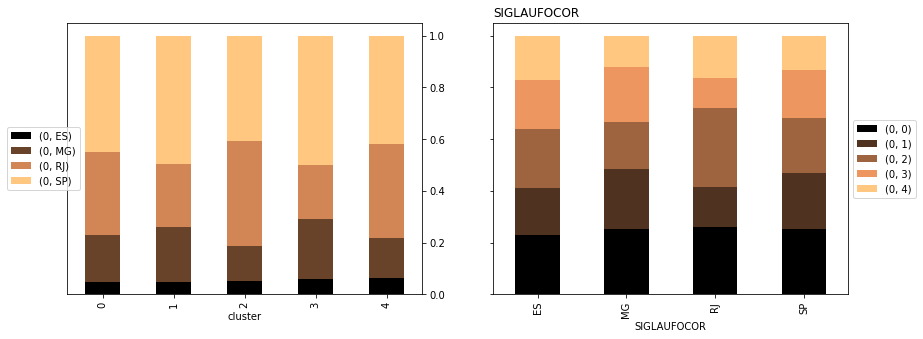

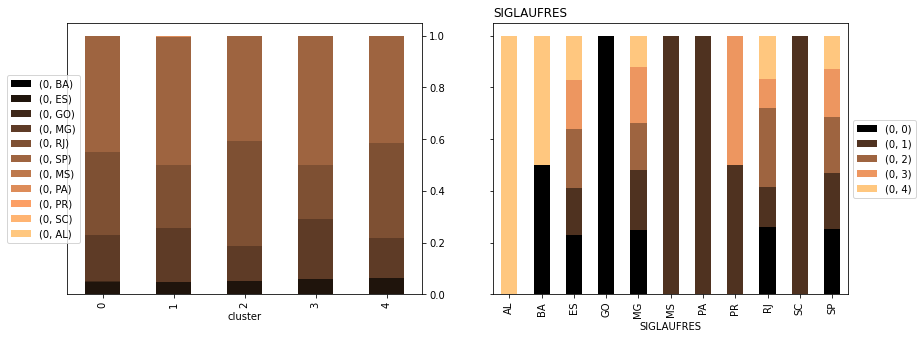

In [9]:
data_sudeste = data.loc[data.NOMEREGOCOR == regiao]
cluster_analysis(n_clusters = 5, models = models_sudeste, data=data_sudeste)

# Agrupamento por região Centro-Oeste

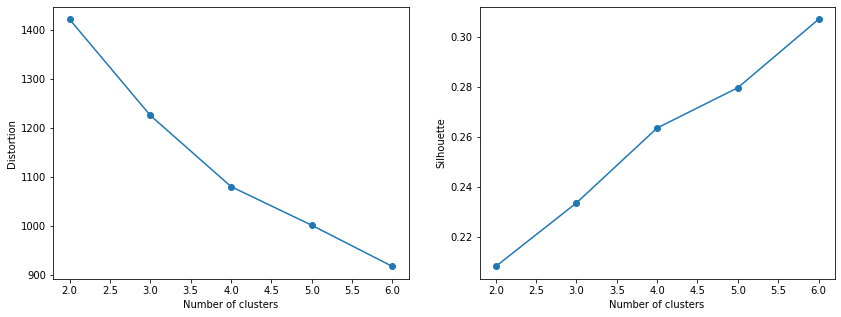

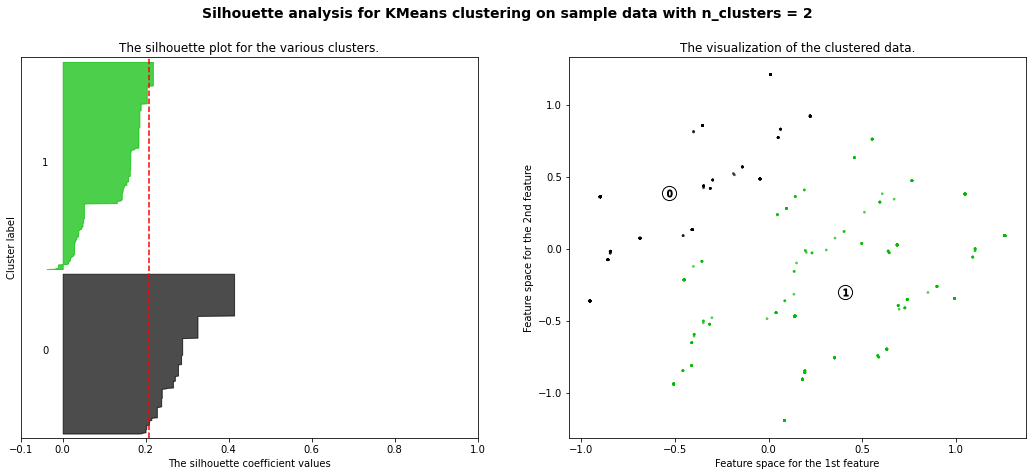

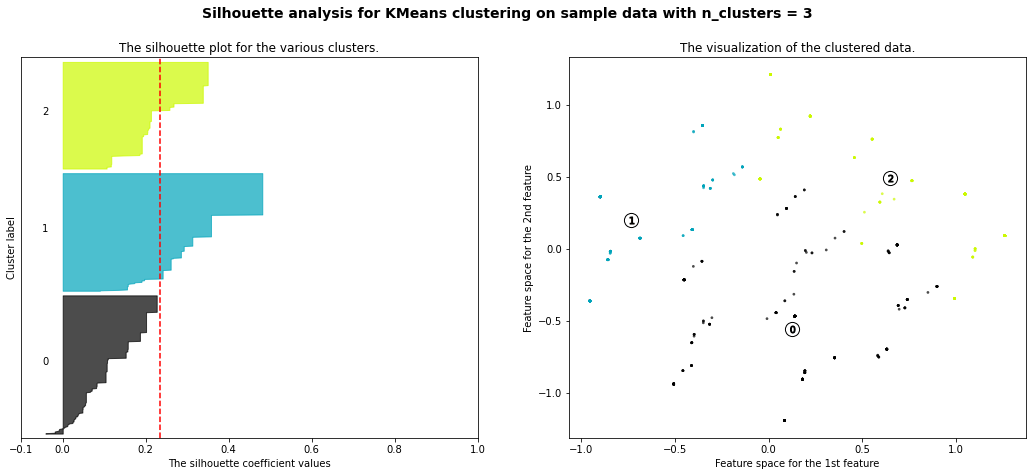

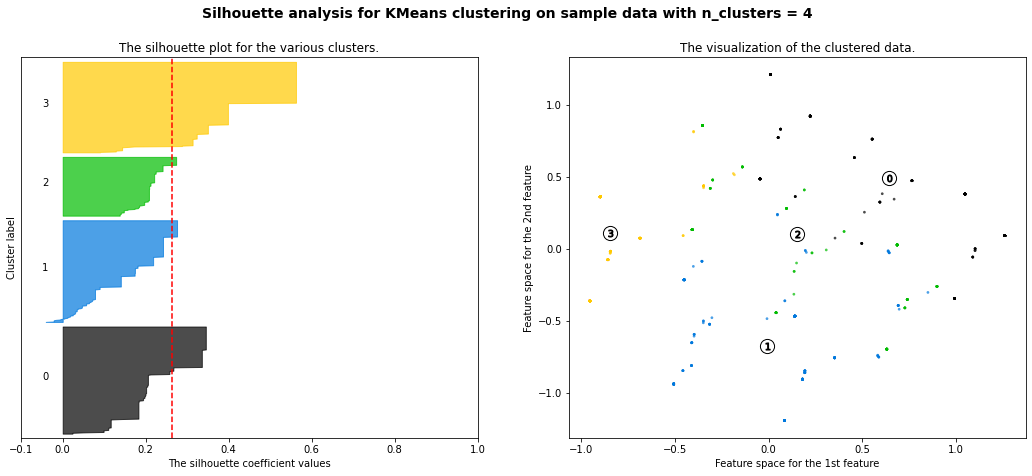

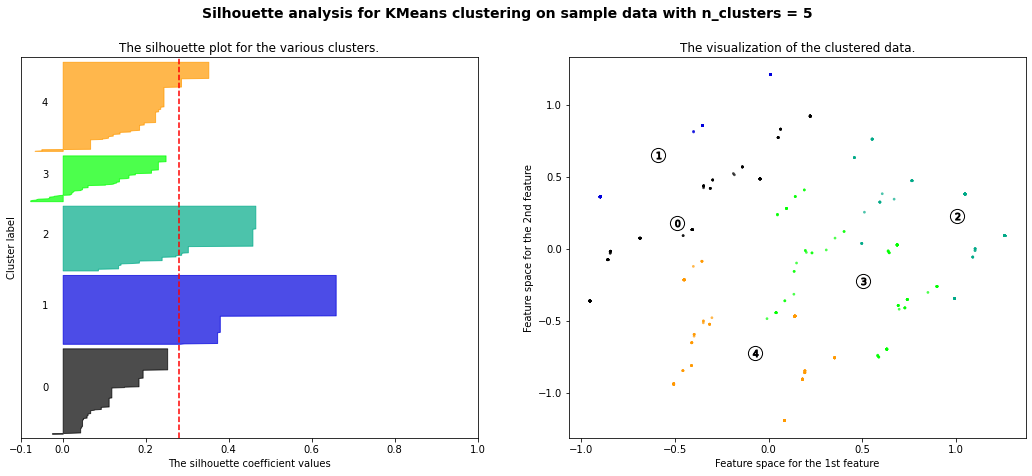

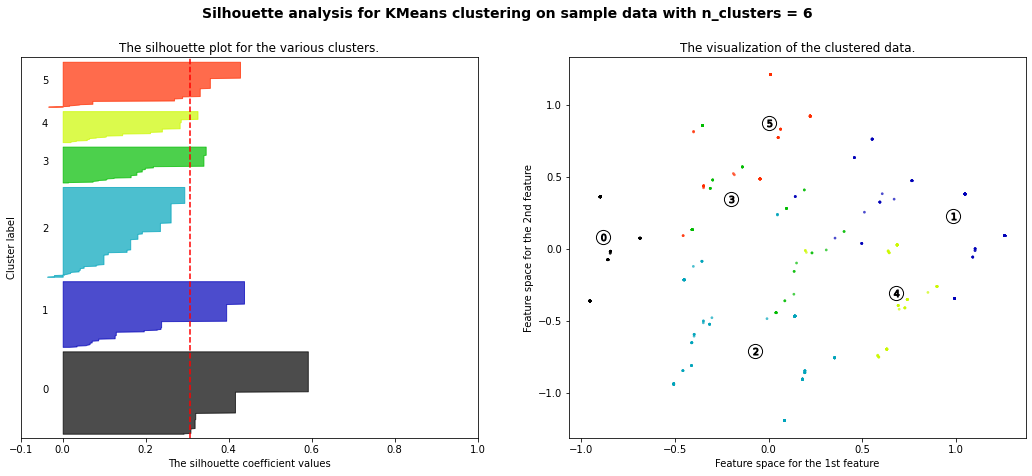

In [10]:
regiao = "Centro-Oeste"

columns_simple = ['ESC', 'ESTCIV', 'FAIXA_ETARIA']#, 'RACACOR']
columns_complex = [ 'ESC', 'ESTCIV', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP',  'CAUSADIRETA']#'RACACOR',


cluster_centro_oeste = data.loc[data.NOMEREGOCOR == regiao,columns_simple]

cluster_centro_oeste = pd.get_dummies(cluster_centro_oeste)
cluster_centro_oeste.fillna(0, inplace=True)

new_columns = []
for col in cluster_centro_oeste.columns:
    new_columns.append(col.split(".")[0])    
cluster_centro_oeste.columns = new_columns

models_centro_oeste = try_clusters_kmeans(X = cluster_centro_oeste, range_n_clusters=6)

Cluster size:  cluster
0    208
1    168
2    158
3    112
4    217
dtype: int64


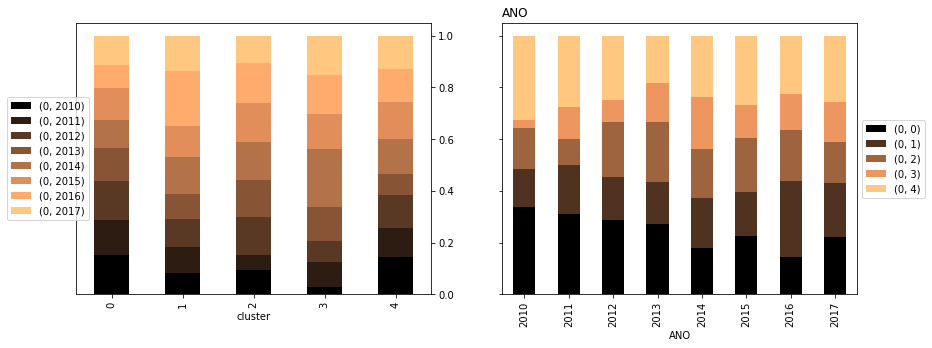

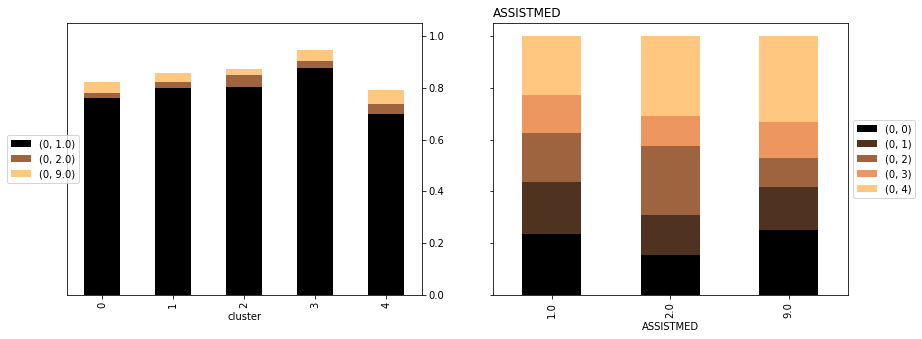

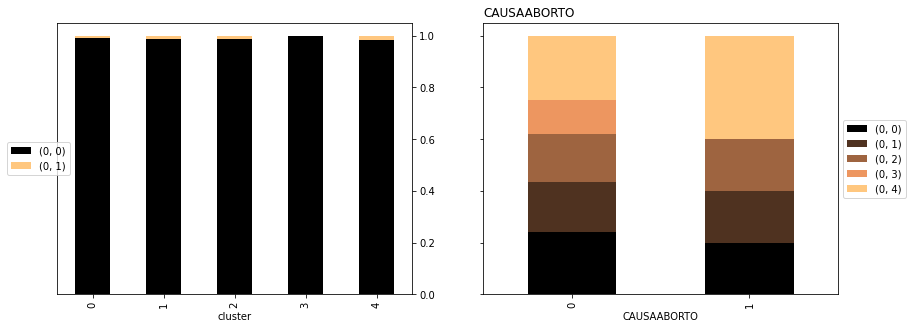

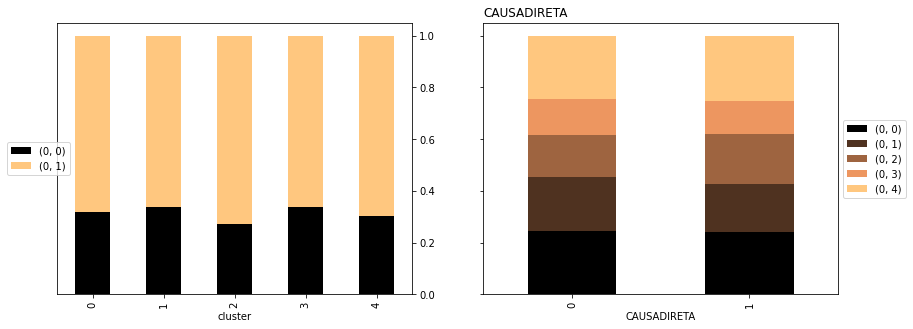

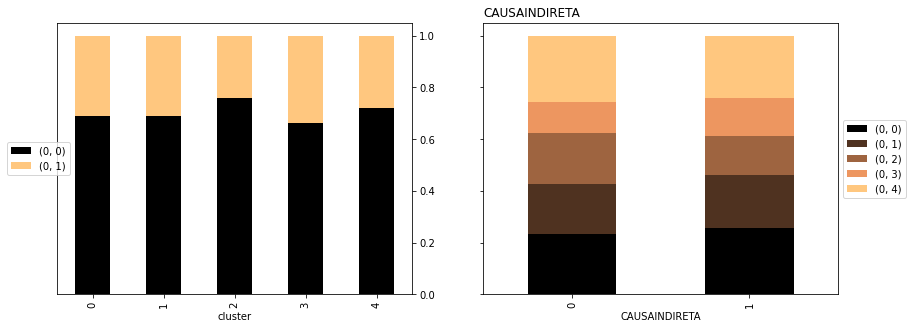

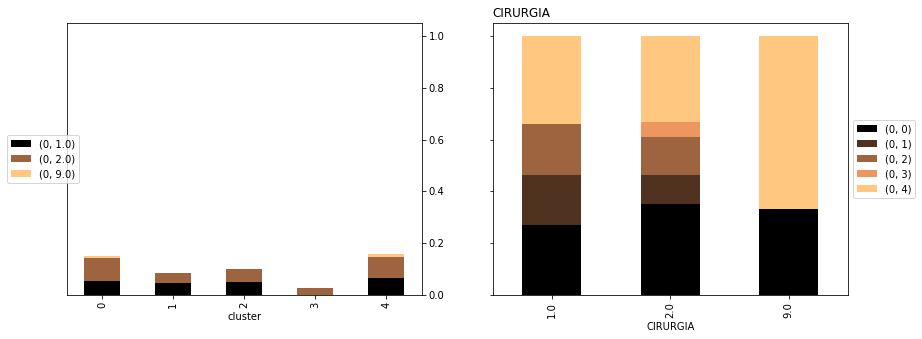

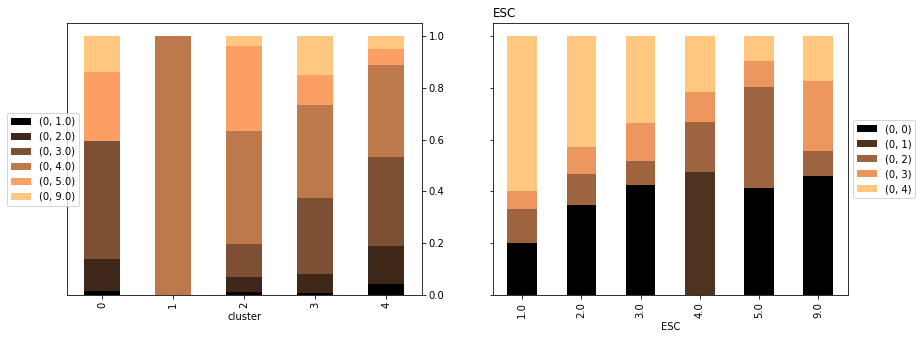

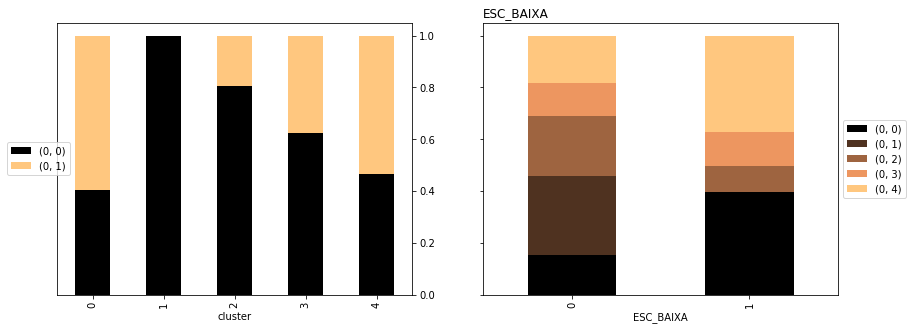

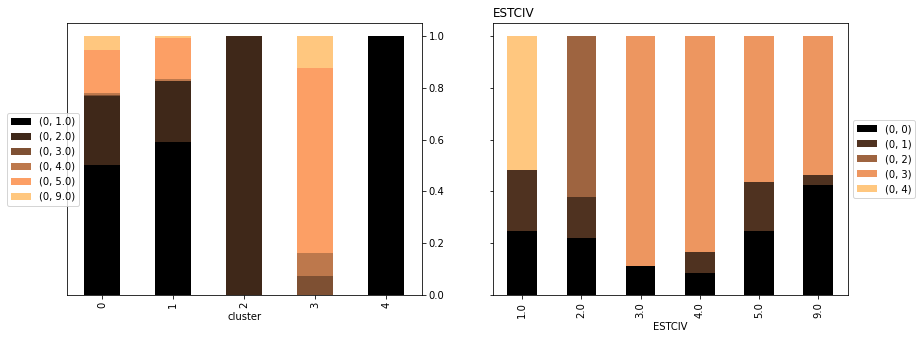

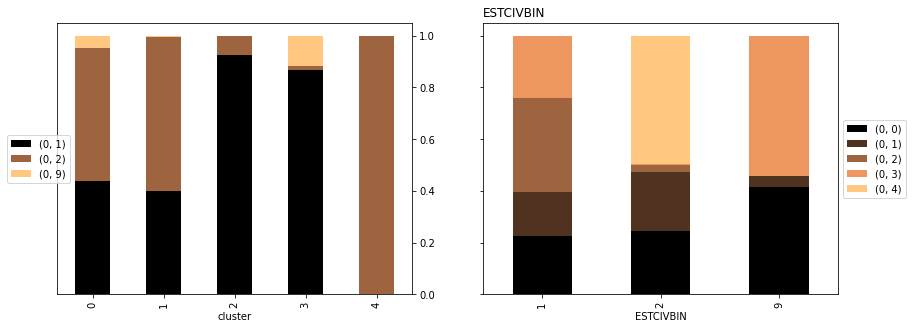

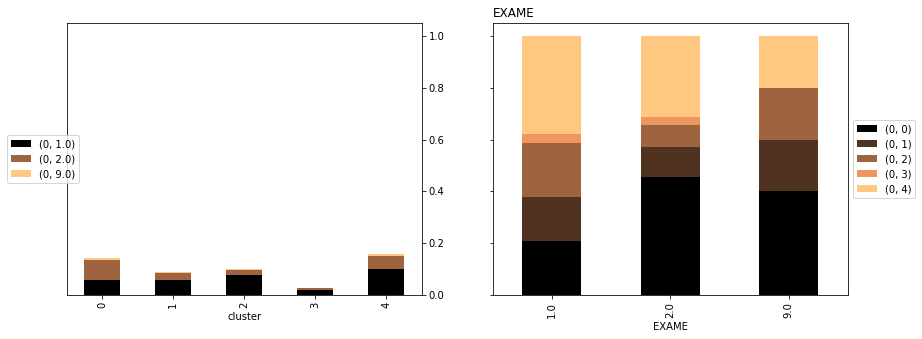

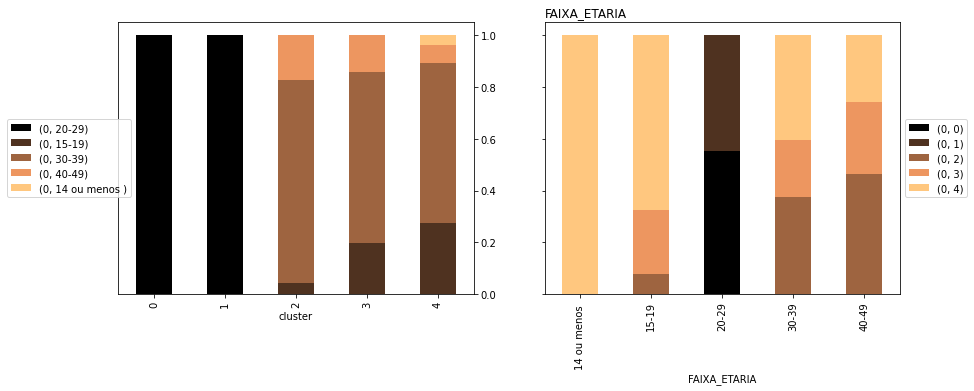

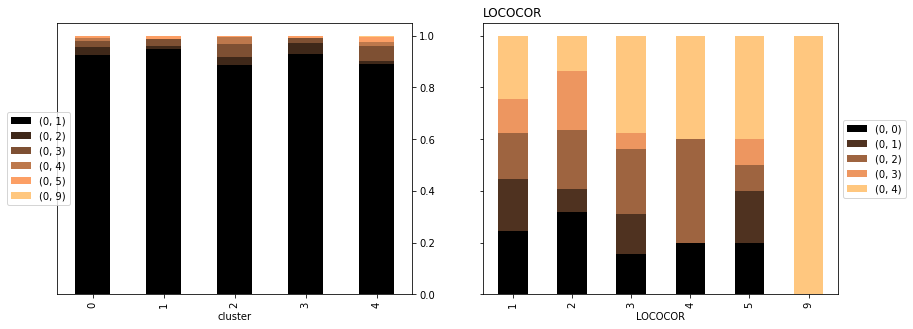

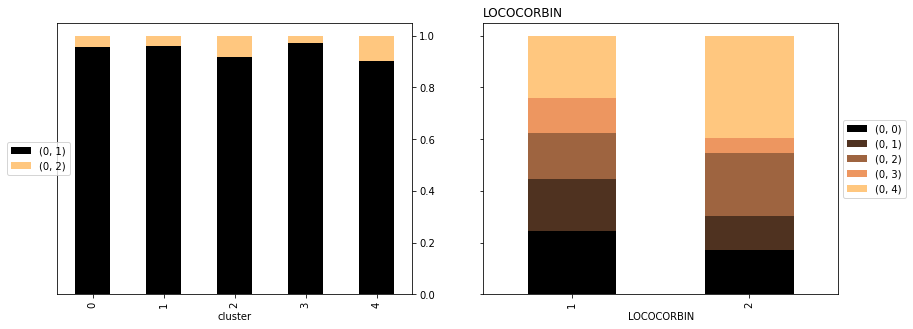

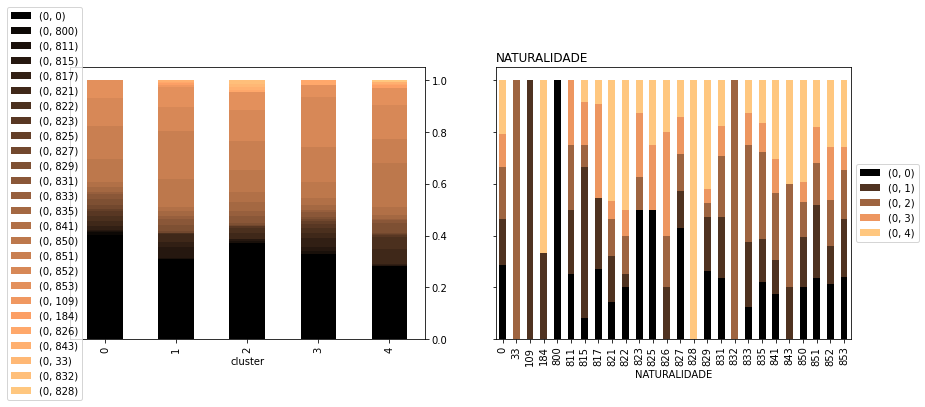

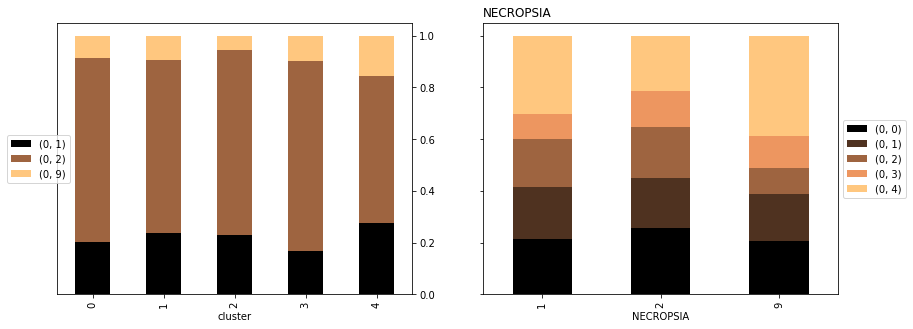

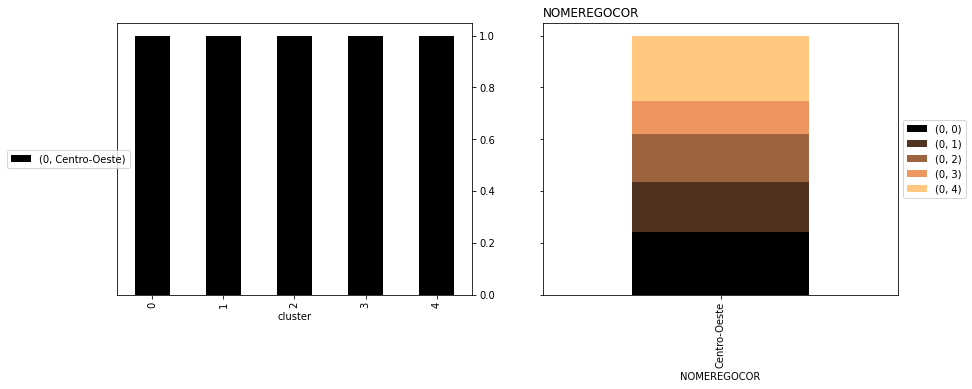

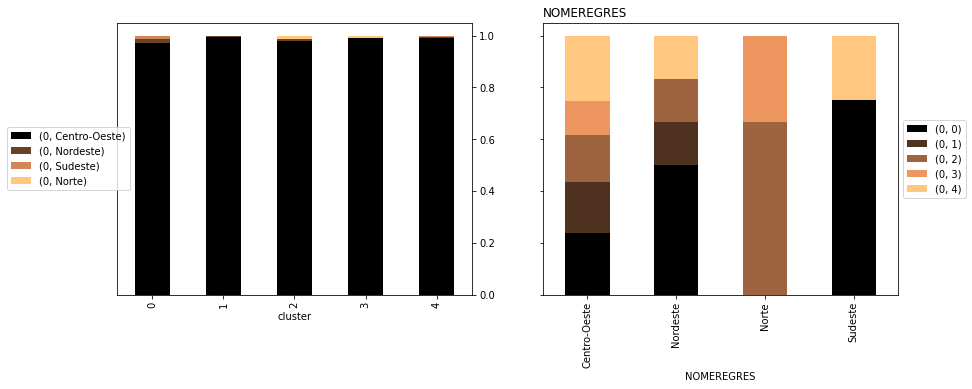

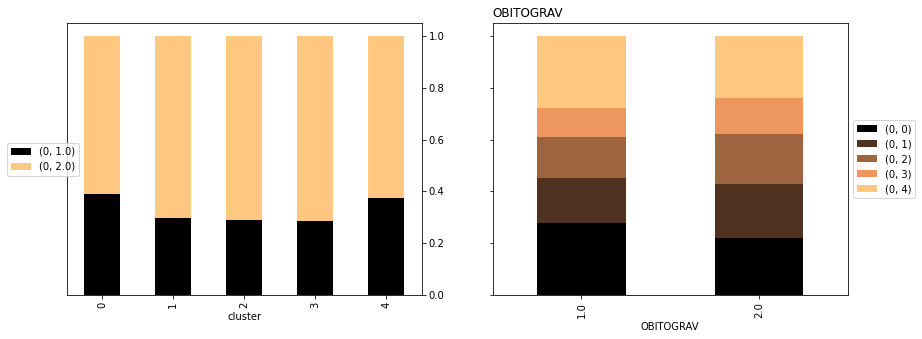

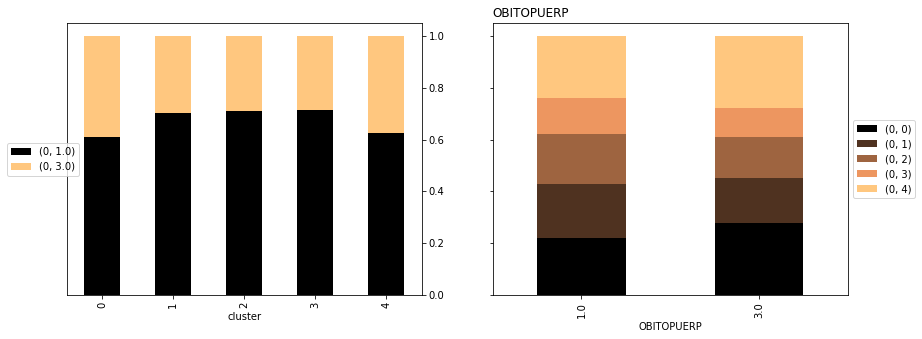

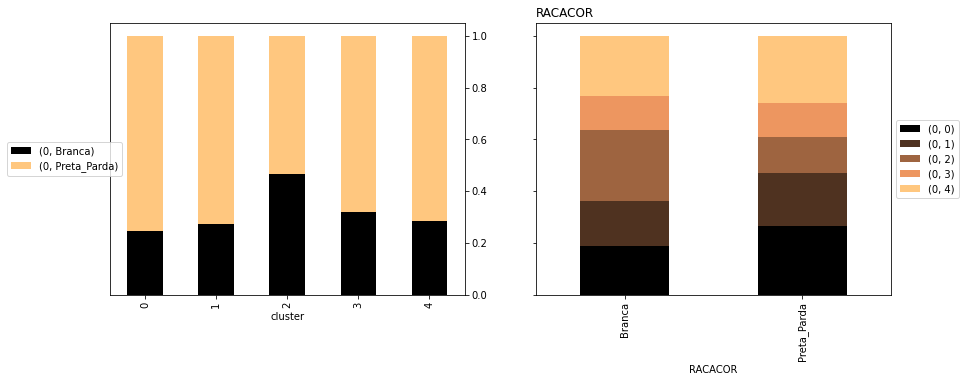

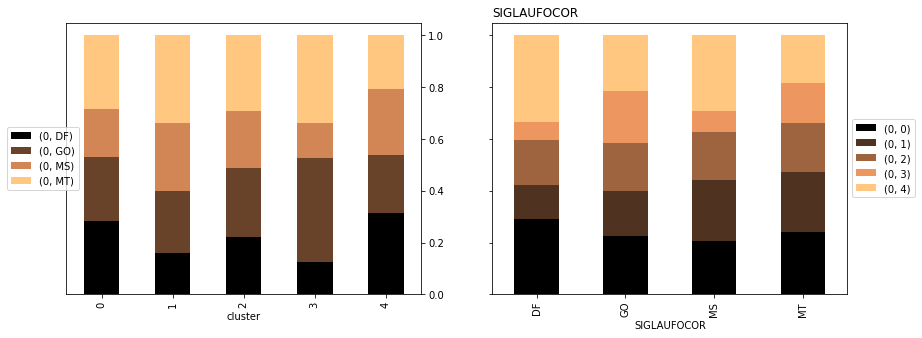

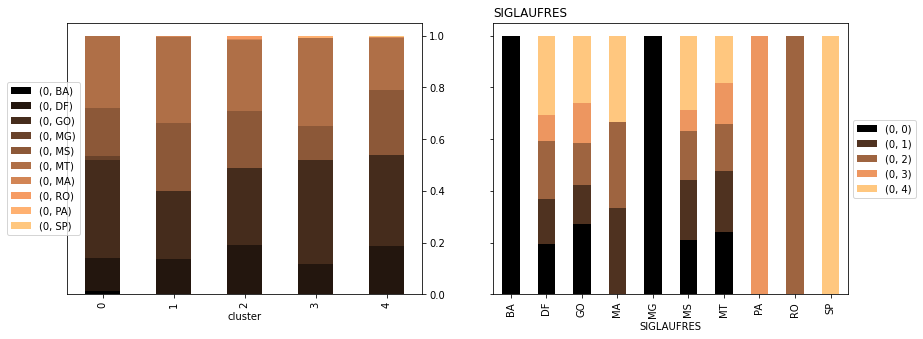

In [11]:
data_centro_oeste = data.loc[data.NOMEREGOCOR == regiao]
cluster_analysis(n_clusters = 5, models = models_centro_oeste, data=data_centro_oeste)

# Agrupamento por região Norte

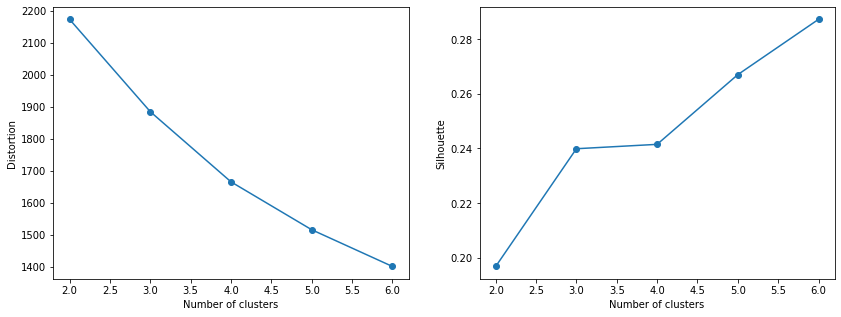

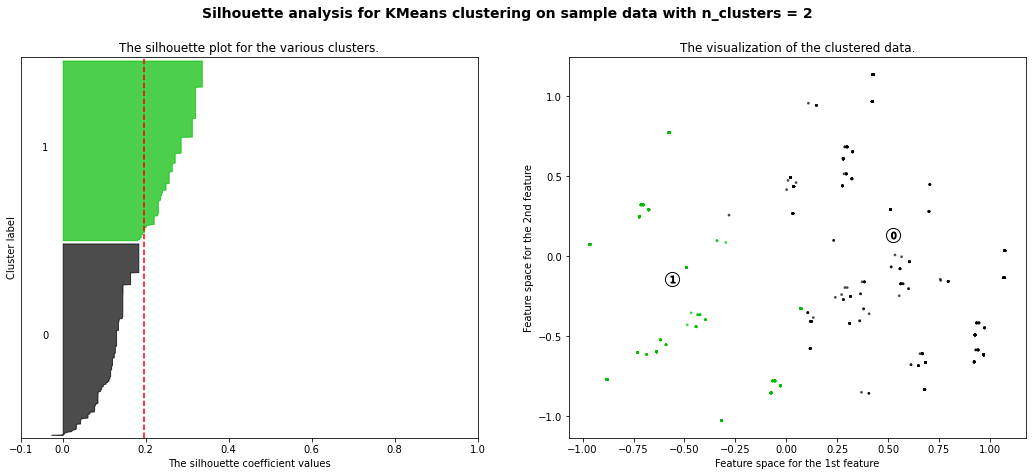

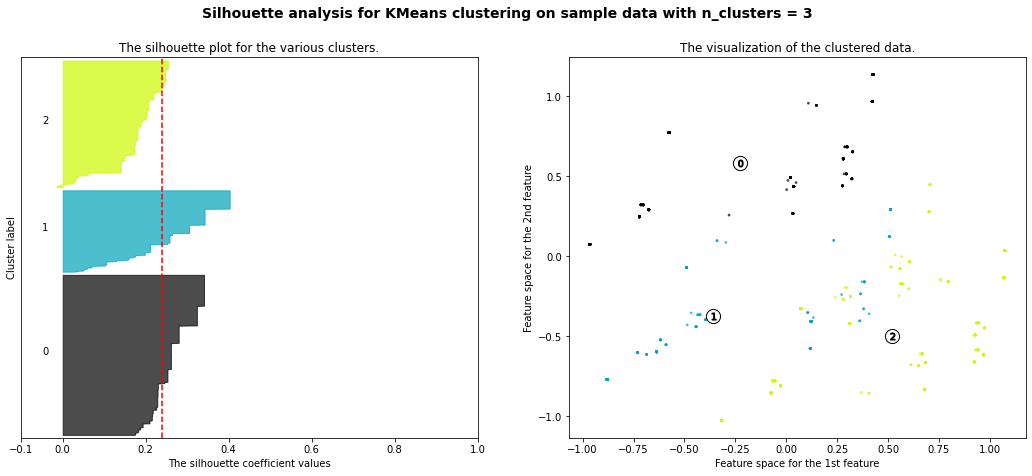

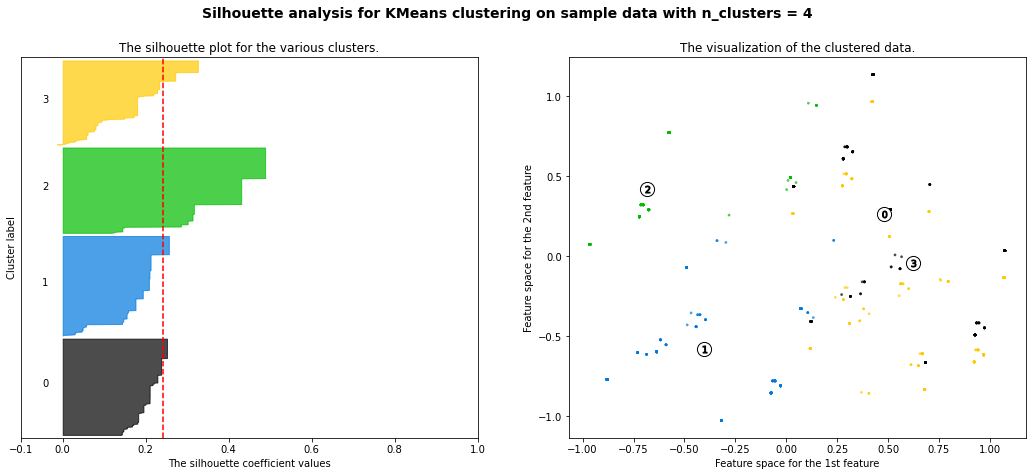

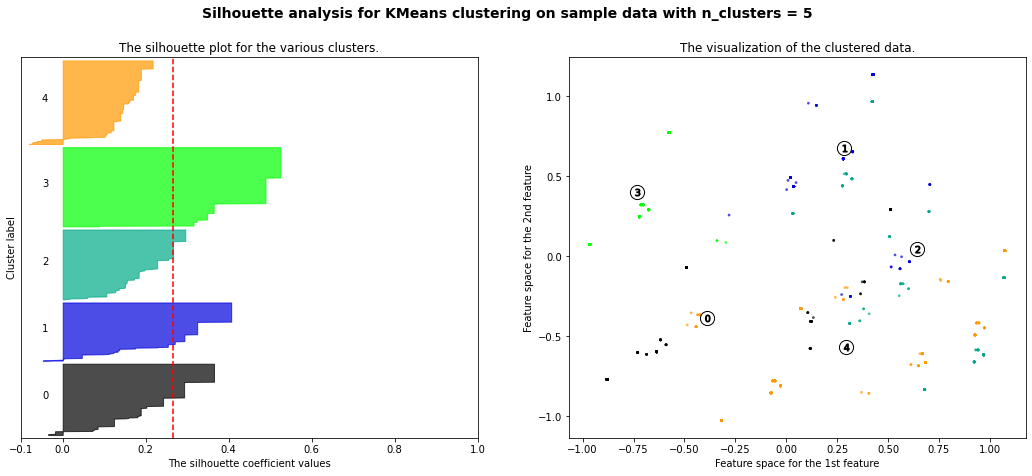

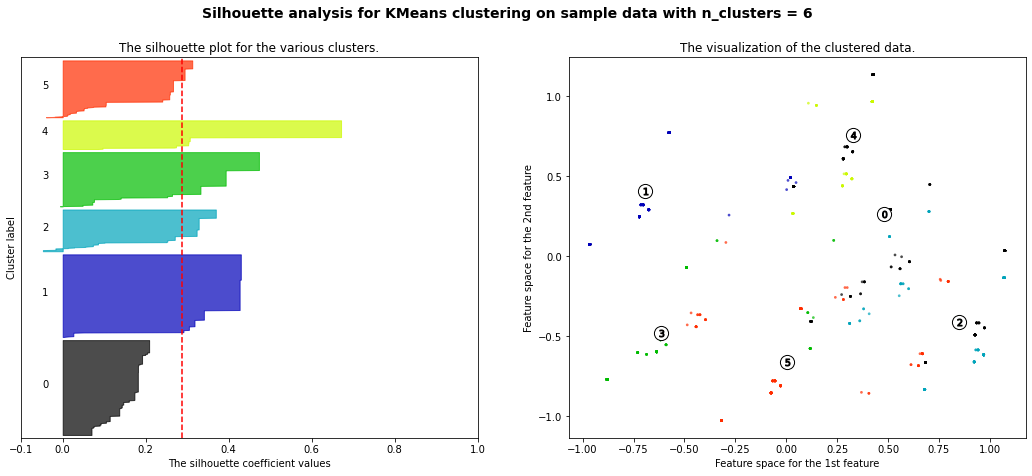

In [12]:
regiao = "Norte"

columns_simple = ['ESC', 'ESTCIV', 'FAIXA_ETARIA']#, 'RACACOR']
columns_complex = [ 'ESC', 'ESTCIV', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP',  'CAUSADIRETA']#'RACACOR',


cluster_norte = data.loc[data.NOMEREGOCOR == regiao,columns_simple]

cluster_norte = pd.get_dummies(cluster_norte)
cluster_norte.fillna(0, inplace=True)

new_columns = []
for col in cluster_norte.columns:
    new_columns.append(col.split(".")[0])    
cluster_norte.columns = new_columns

models_norte = try_clusters_kmeans(X = cluster_norte, range_n_clusters=6)

Cluster size:  cluster
0    250
1    204
2    245
3    278
4    293
dtype: int64


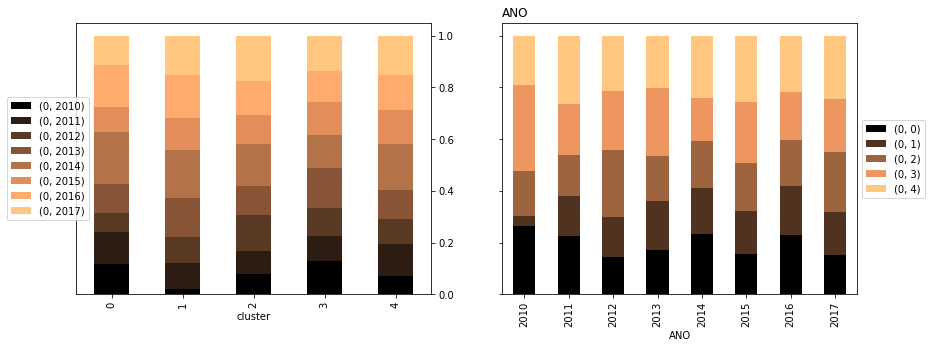

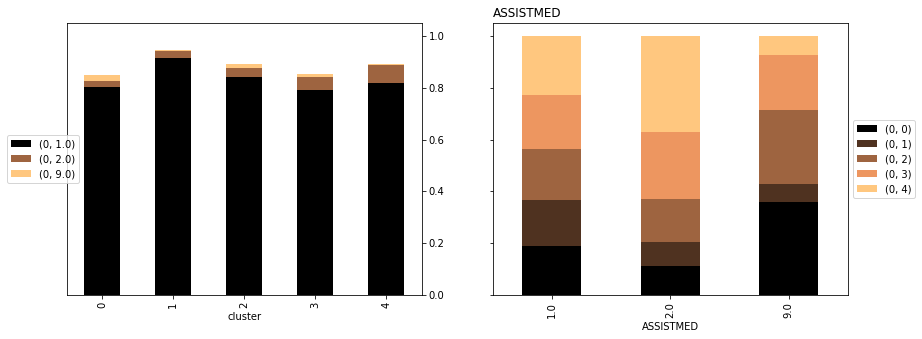

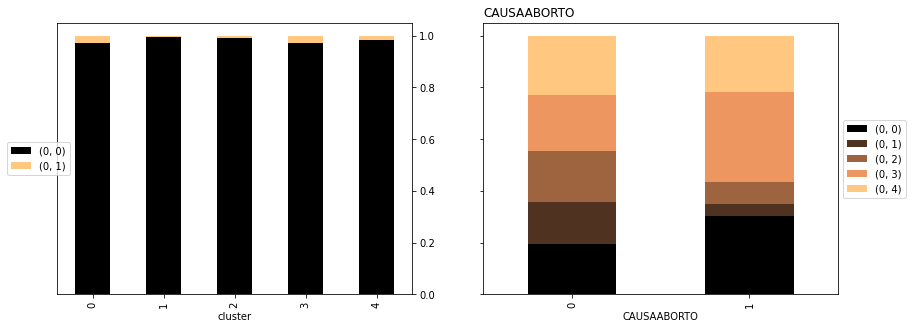

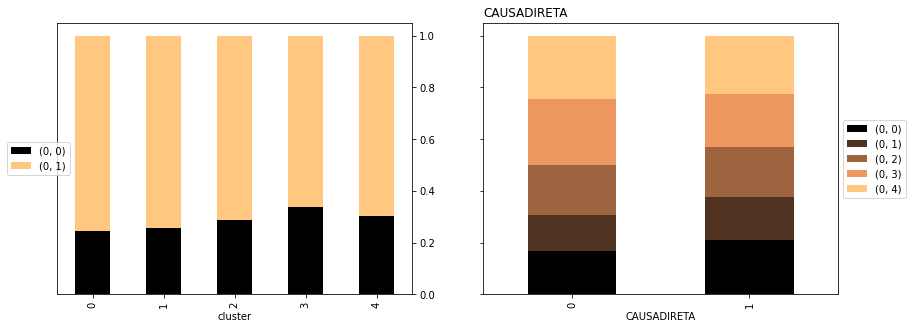

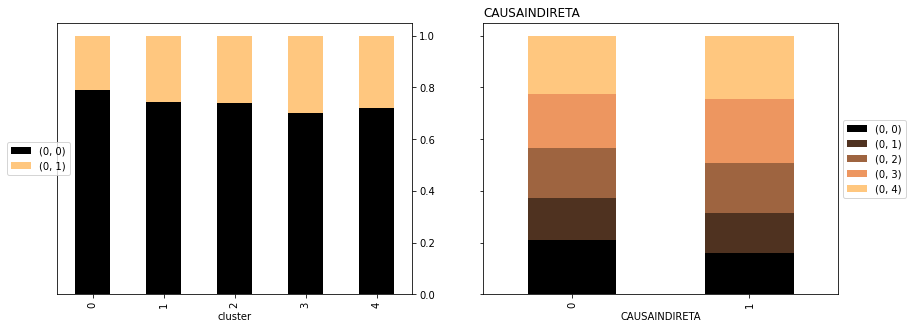

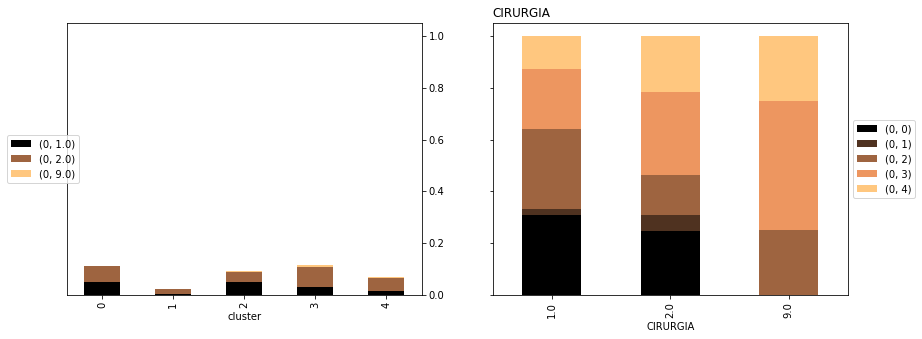

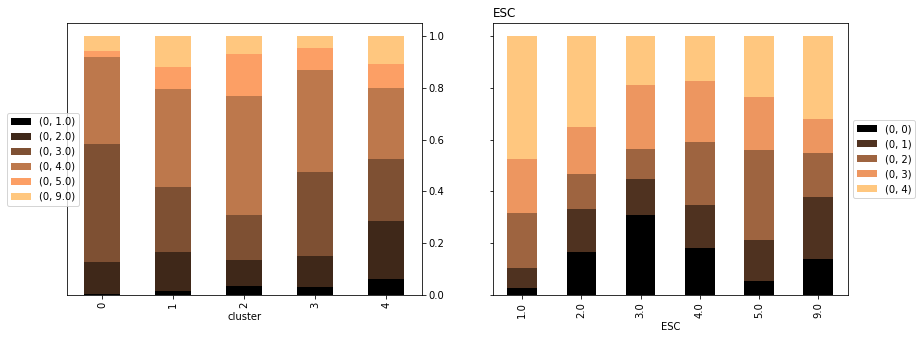

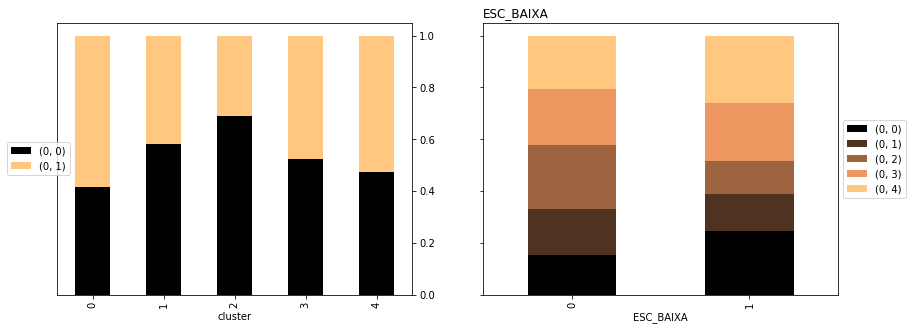

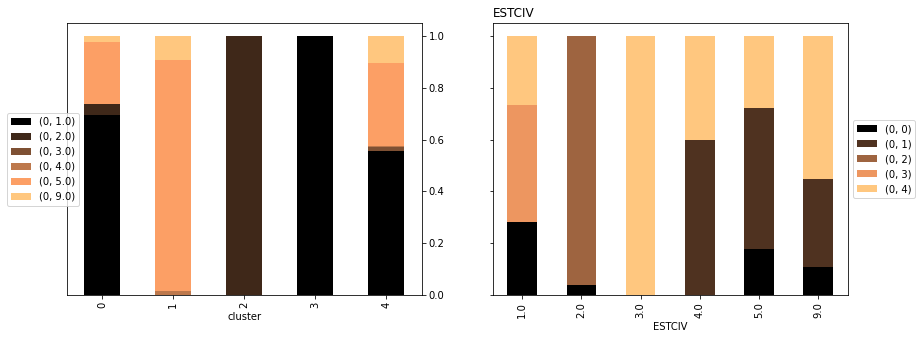

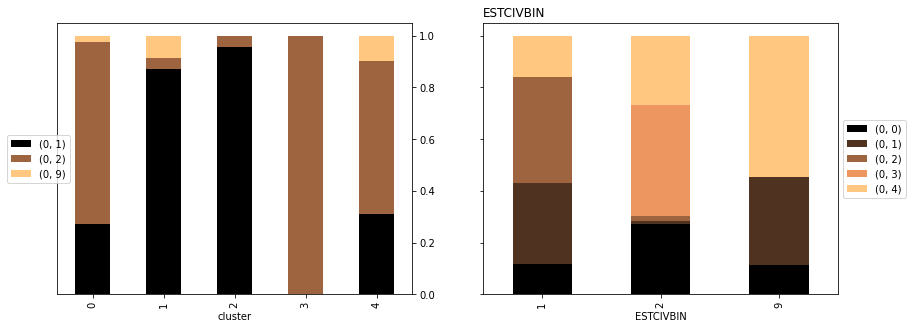

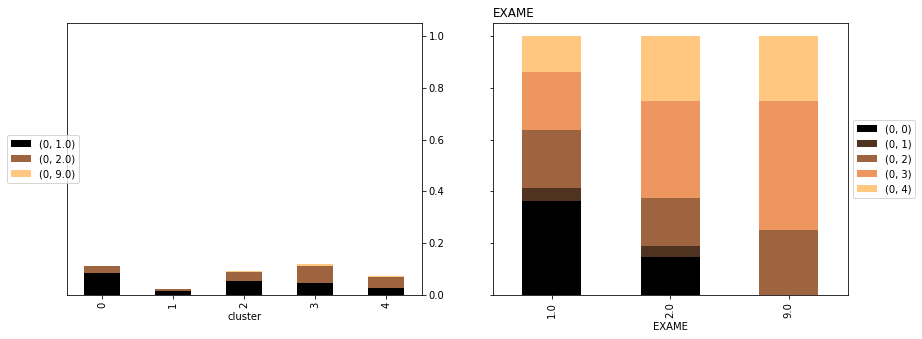

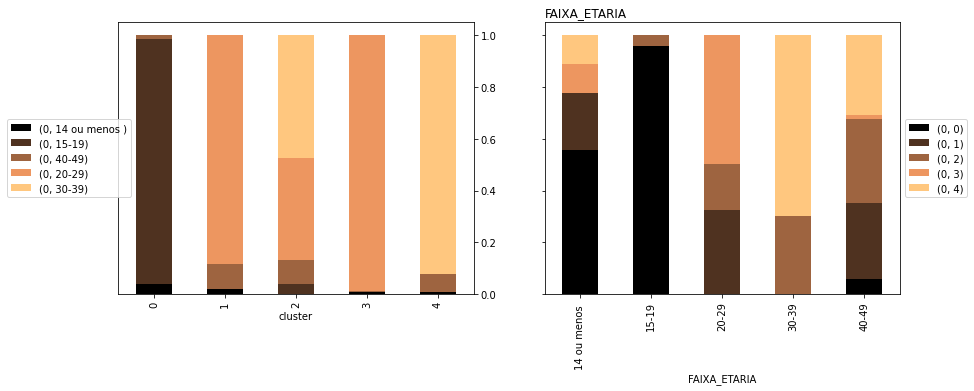

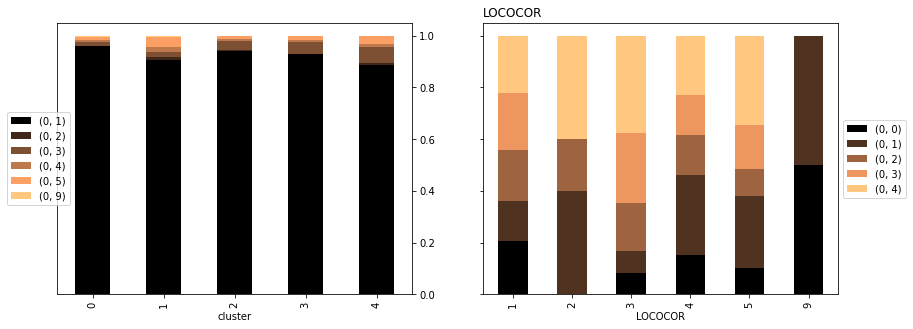

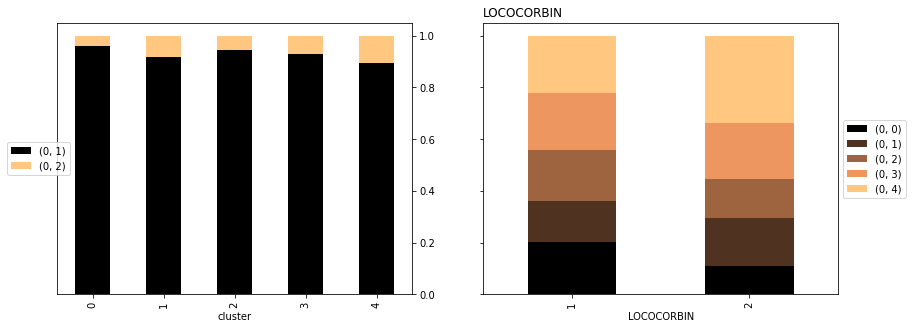

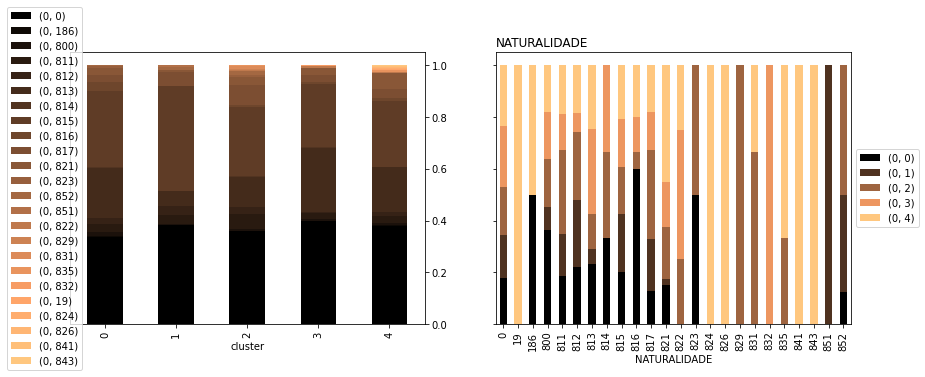

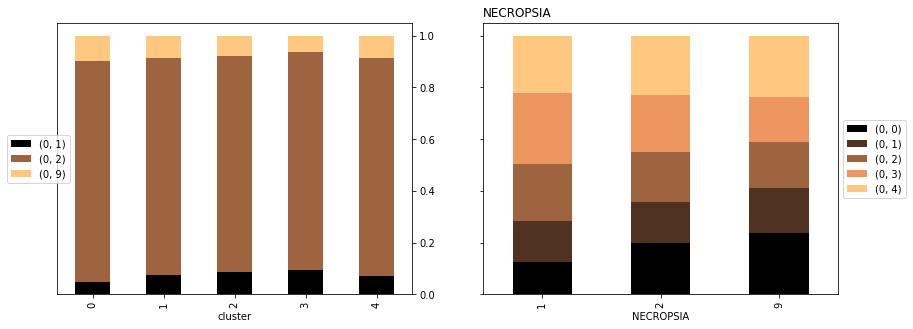

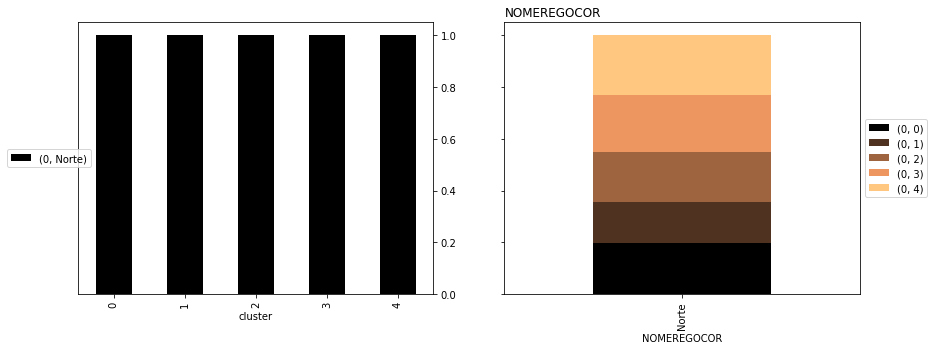

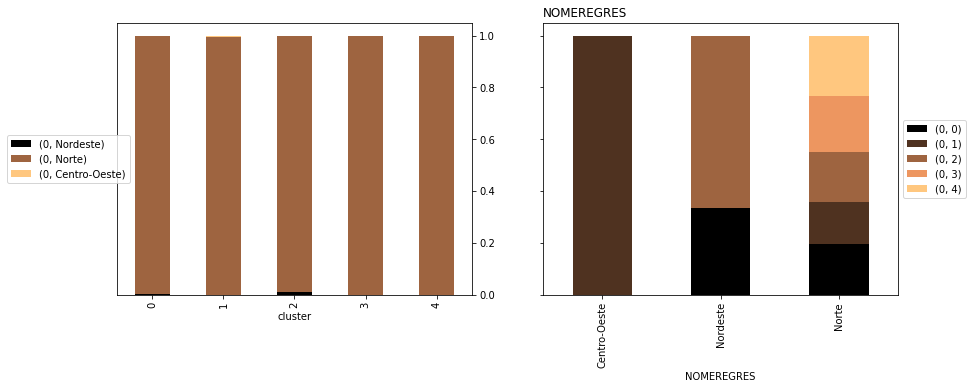

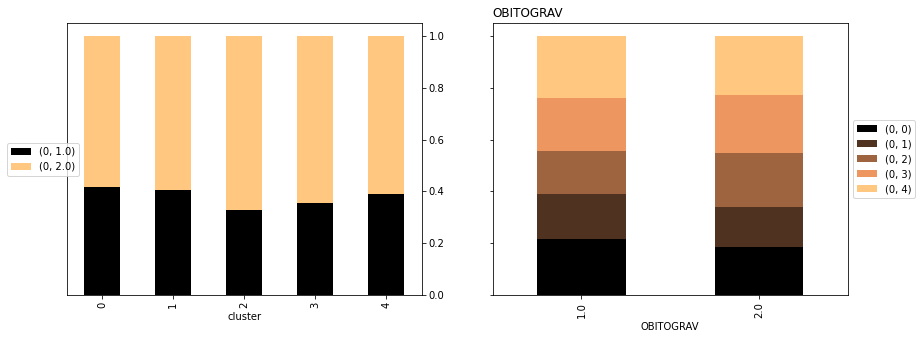

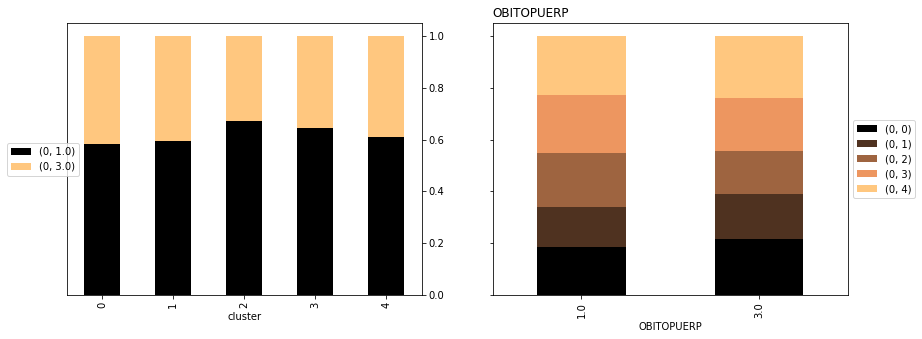

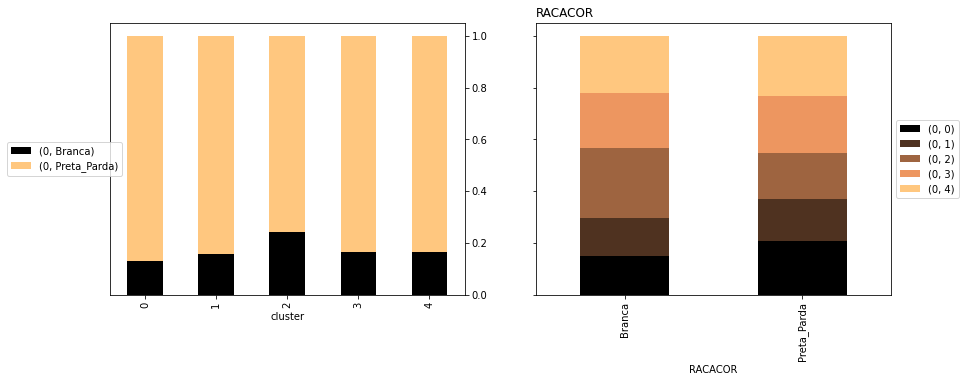

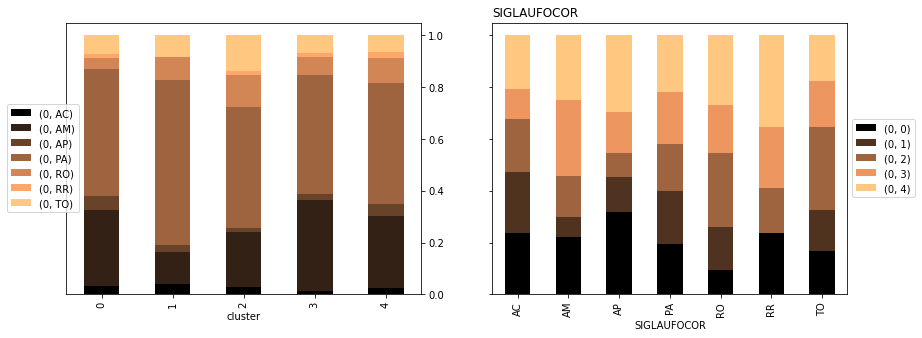

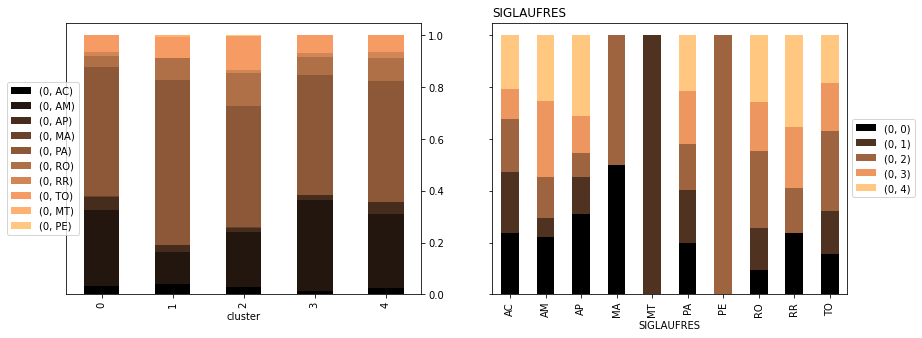

In [13]:
data_norte = data.loc[data.NOMEREGOCOR == regiao]
cluster_analysis(n_clusters = 5, models = models_norte, data=data_norte)

# Agrupamento por região Nordeste

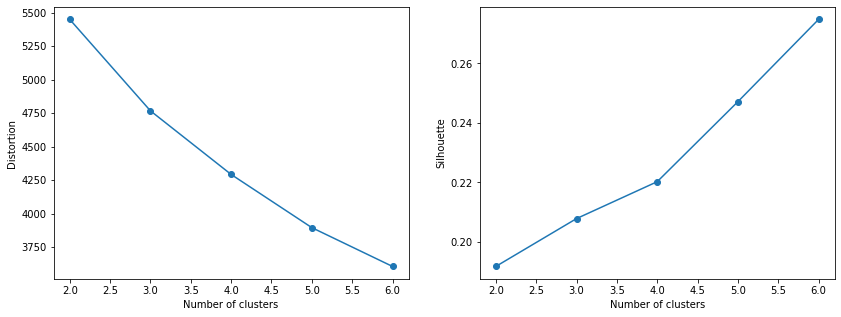

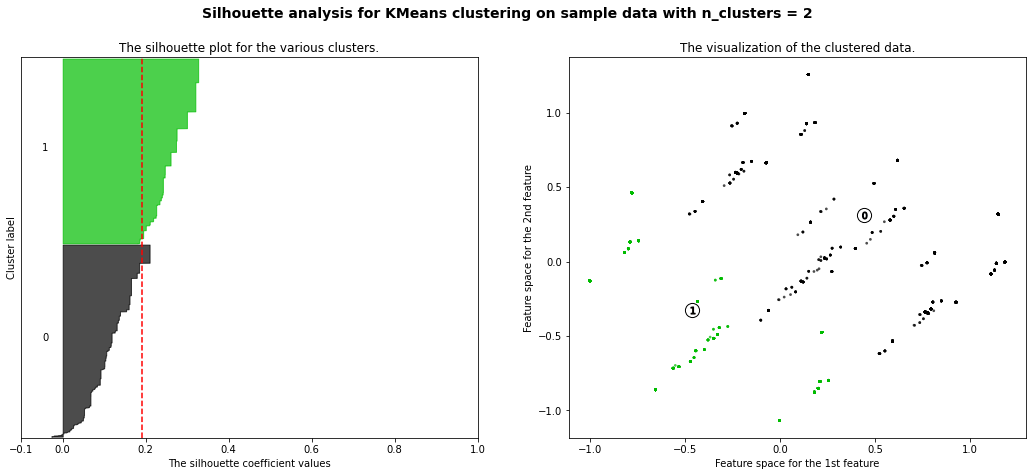

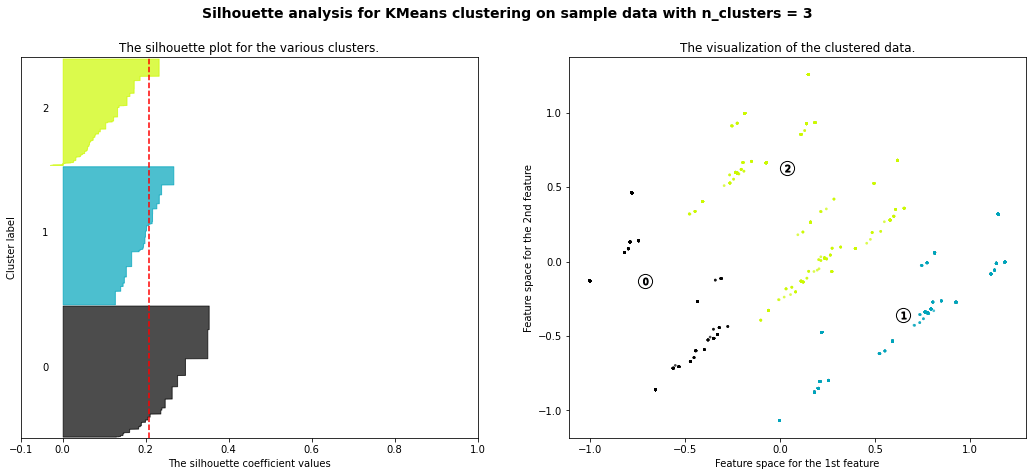

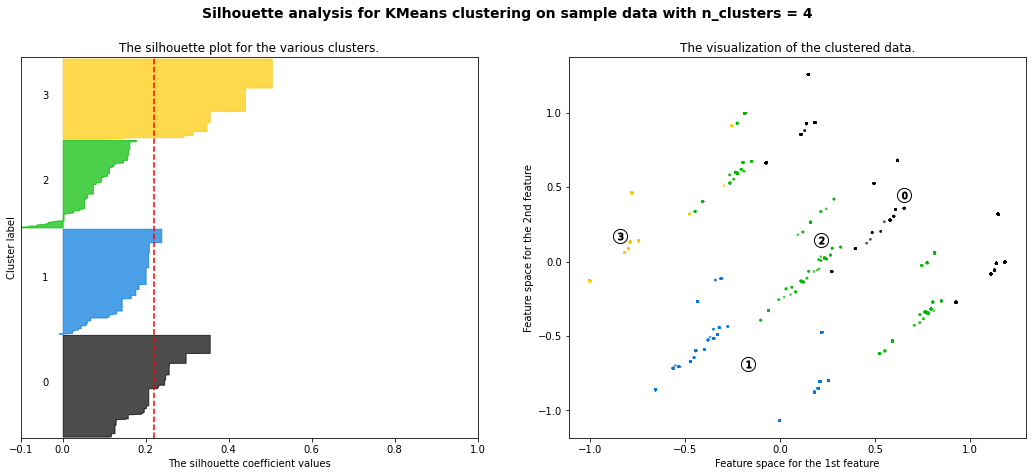

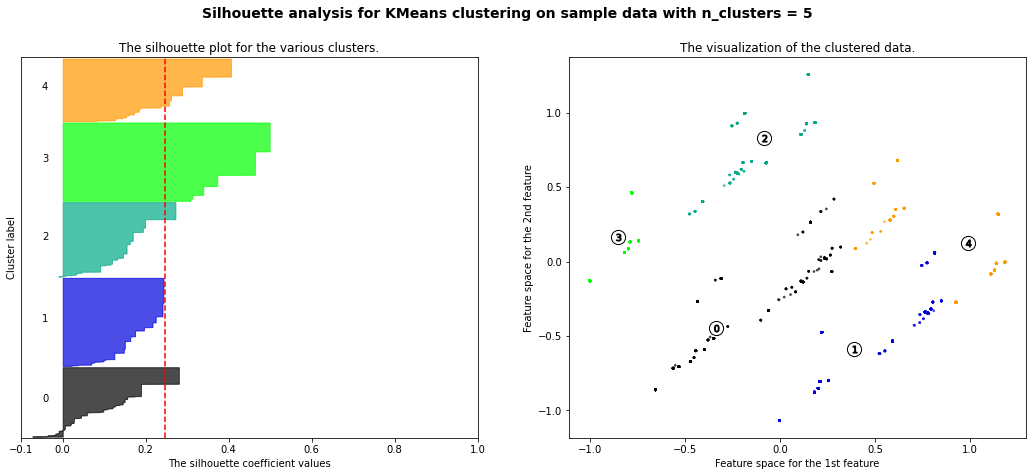

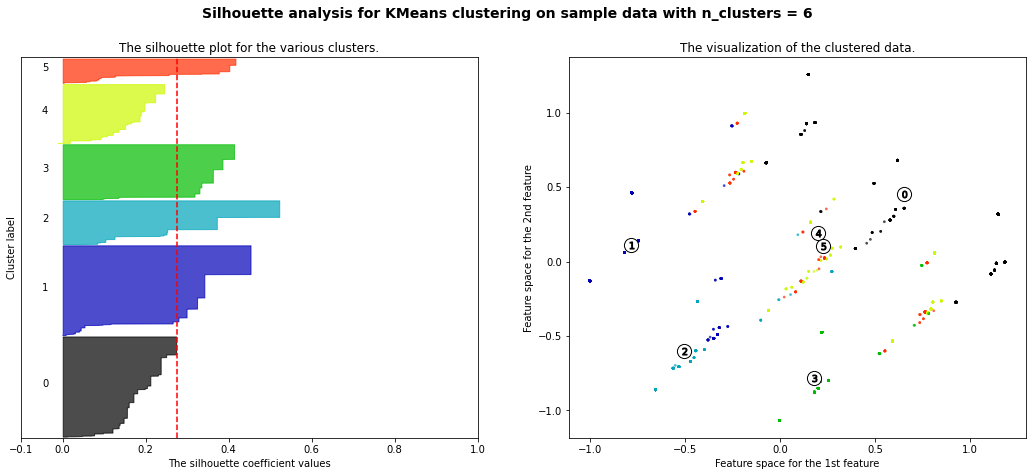

In [14]:
regiao = "Nordeste"

columns_simple = ['ESC', 'ESTCIV', 'FAIXA_ETARIA']#, 'RACACOR']
columns_complex = [ 'ESC', 'ESTCIV', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP',  'CAUSADIRETA']#'RACACOR',


cluster_nordeste = data.loc[data.NOMEREGOCOR == regiao,columns_simple]

cluster_nordeste = pd.get_dummies(cluster_nordeste)
cluster_nordeste.fillna(0, inplace=True)

new_columns = []
for col in cluster_nordeste.columns:
    new_columns.append(col.split(".")[0])    
cluster_nordeste.columns = new_columns

models_nordeste = try_clusters_kmeans(X = cluster_nordeste, range_n_clusters=6)

Cluster size:  cluster
0    584
1    741
2    626
3    659
4    527
dtype: int64


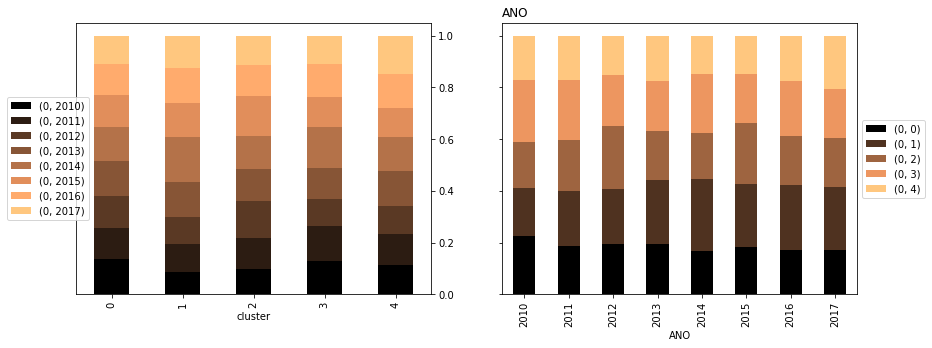

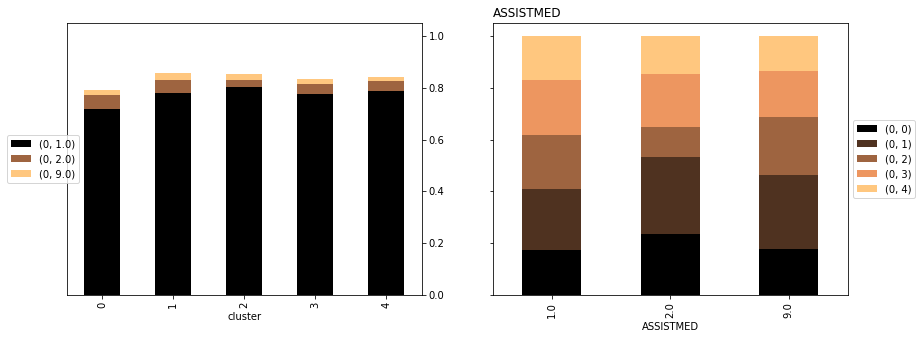

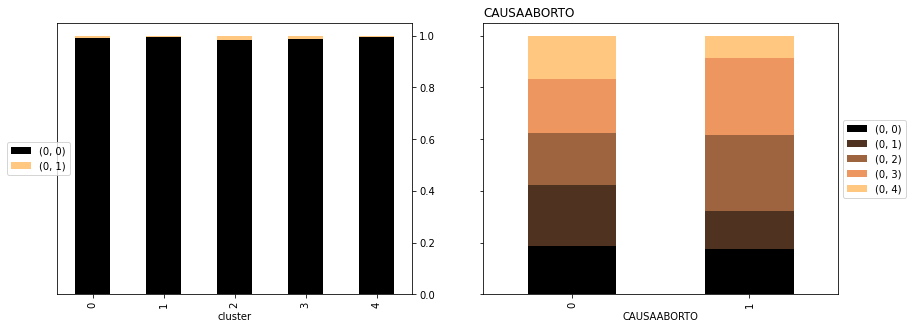

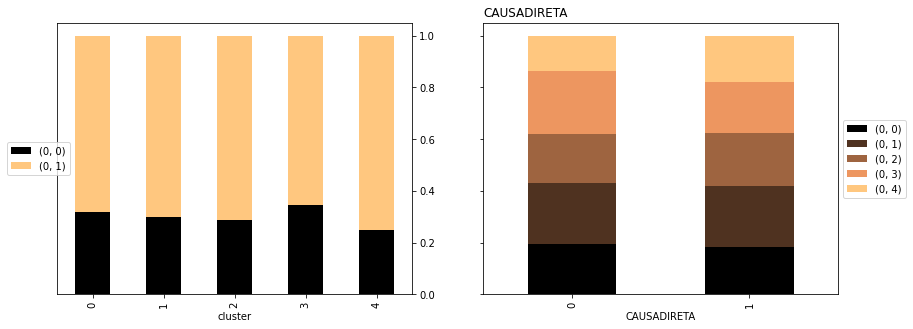

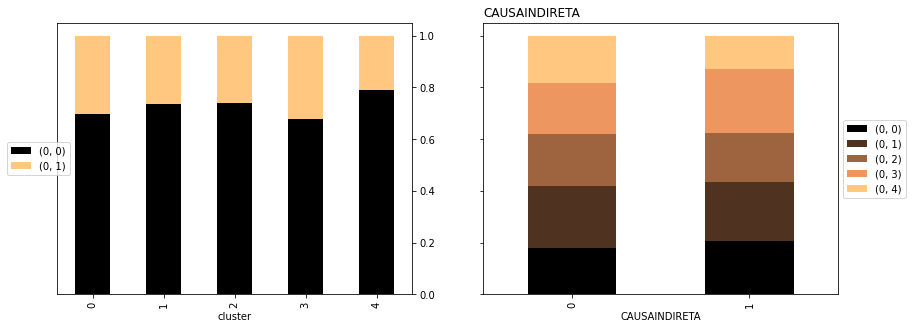

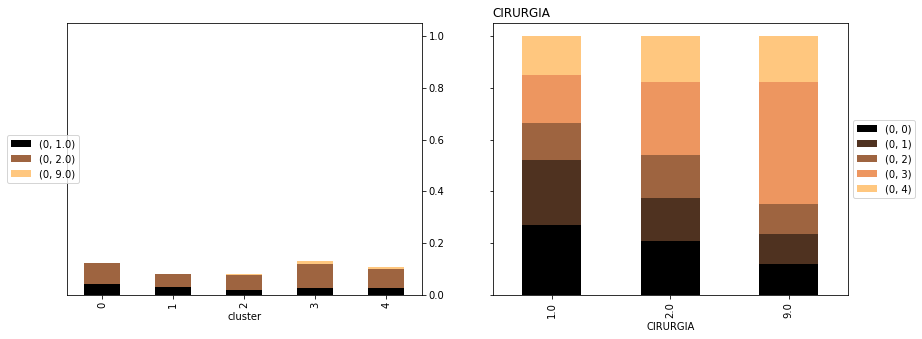

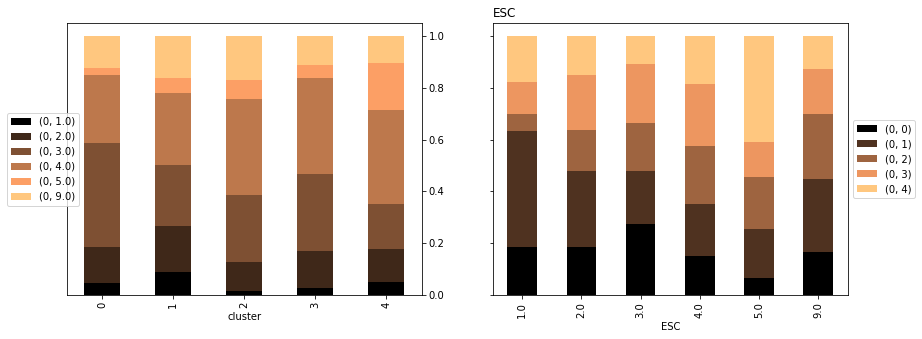

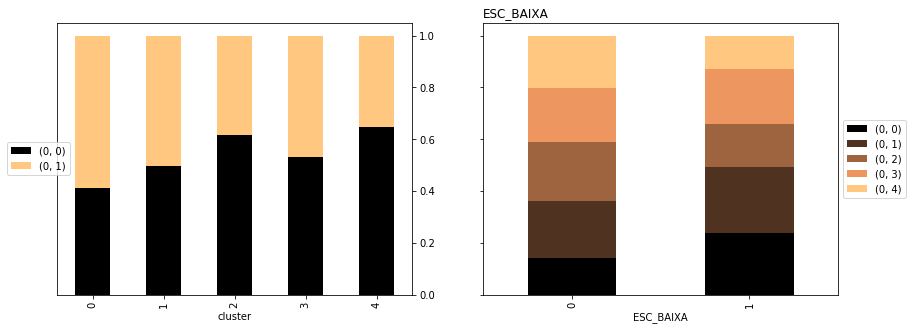

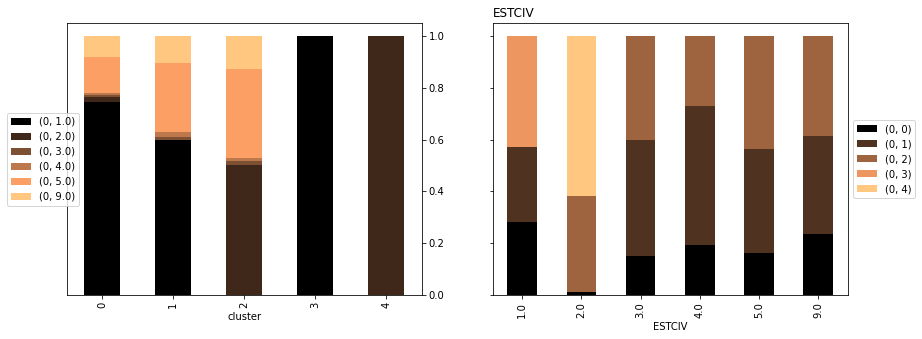

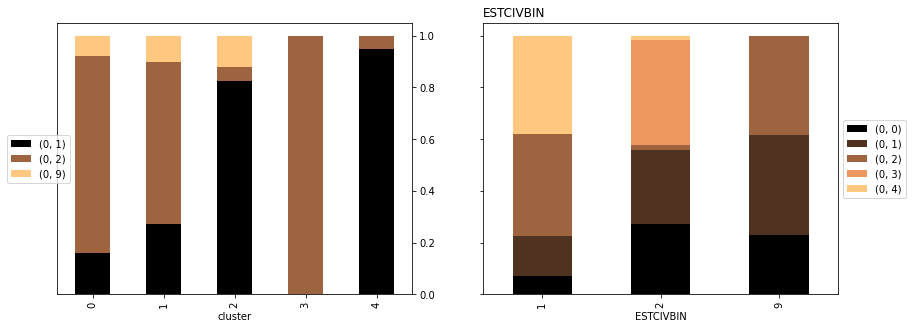

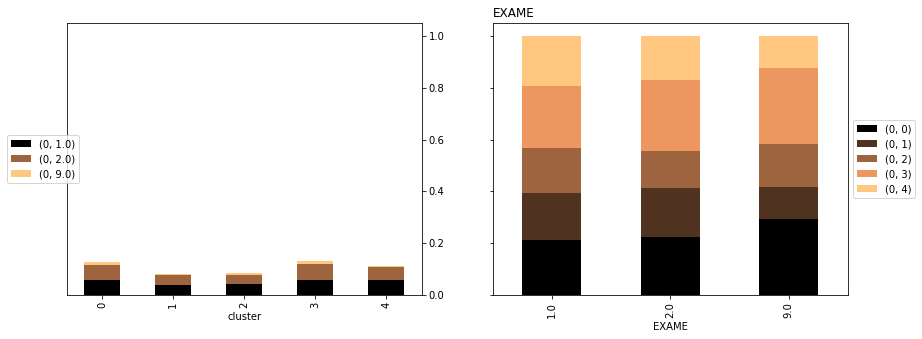

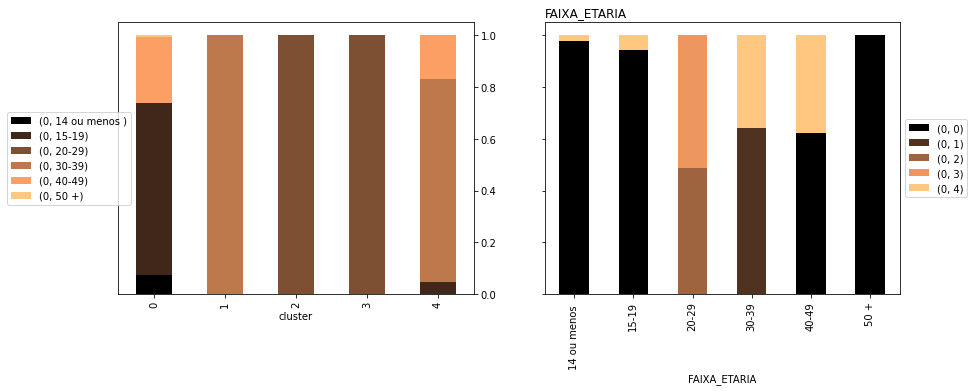

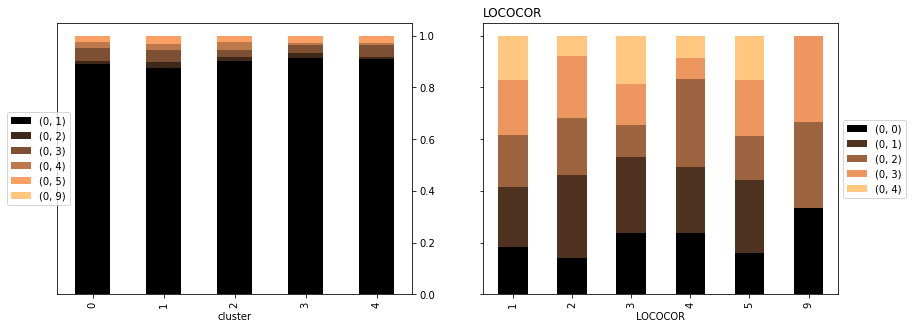

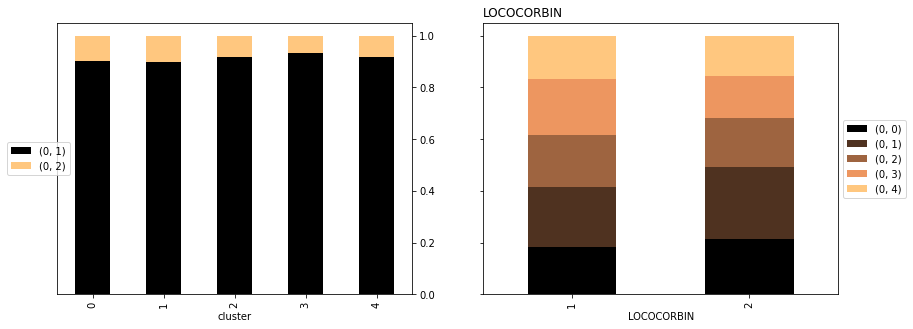

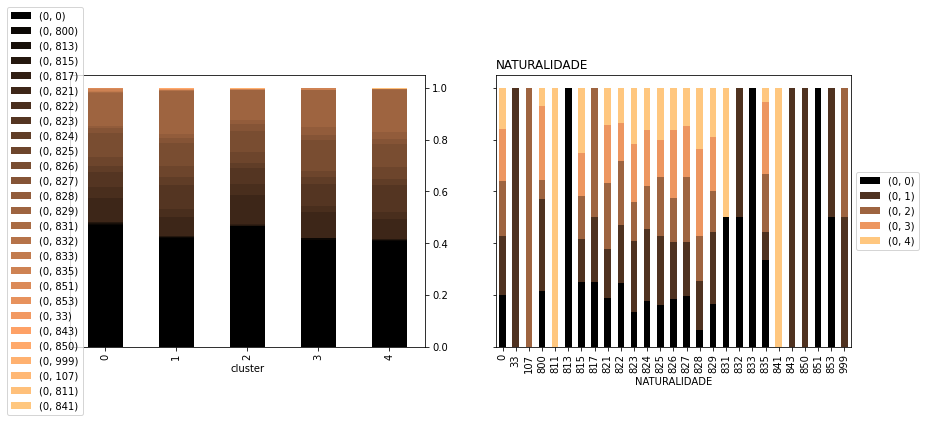

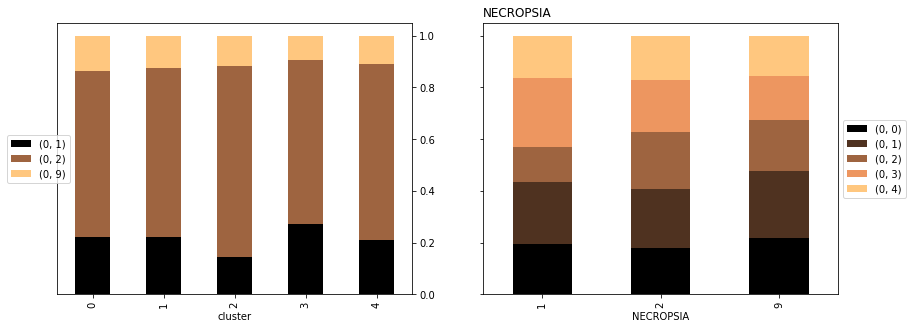

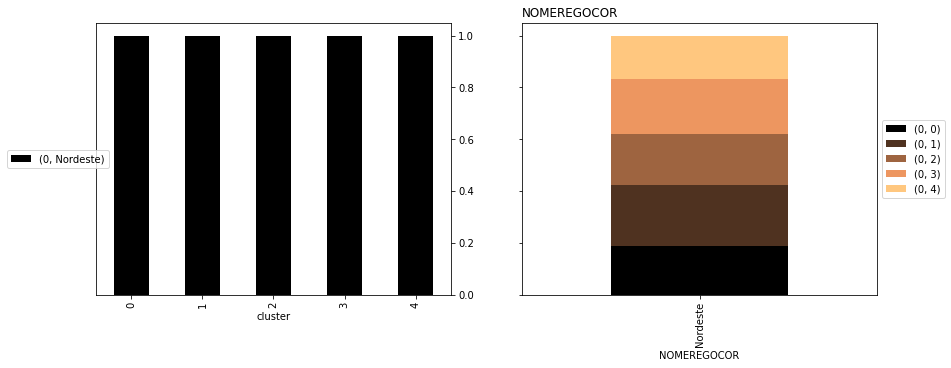

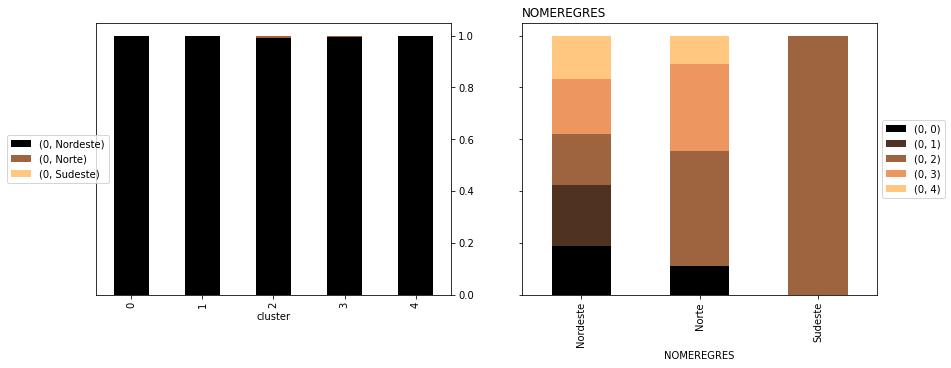

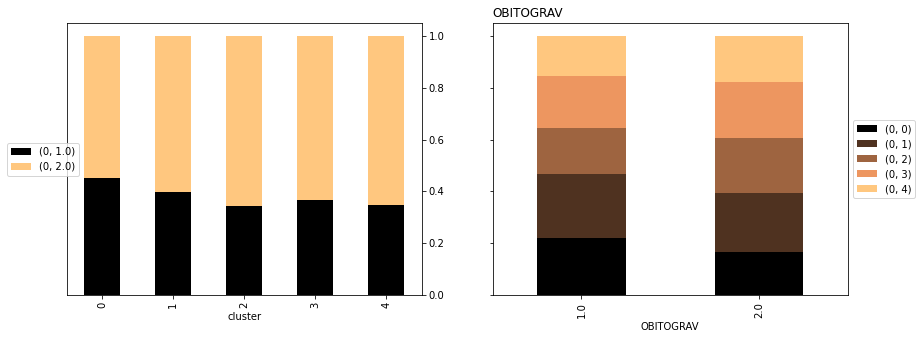

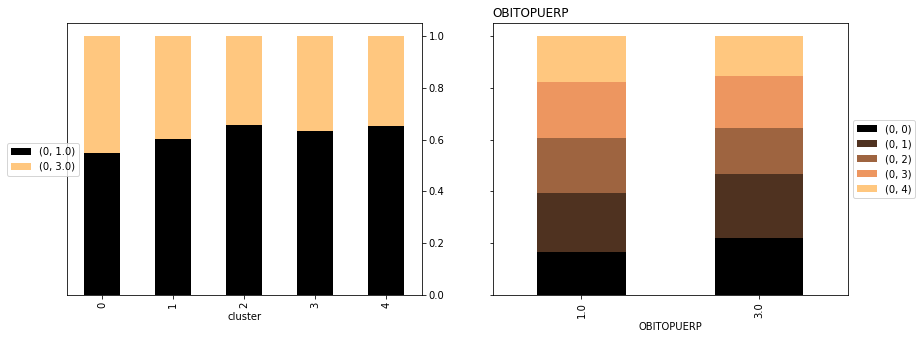

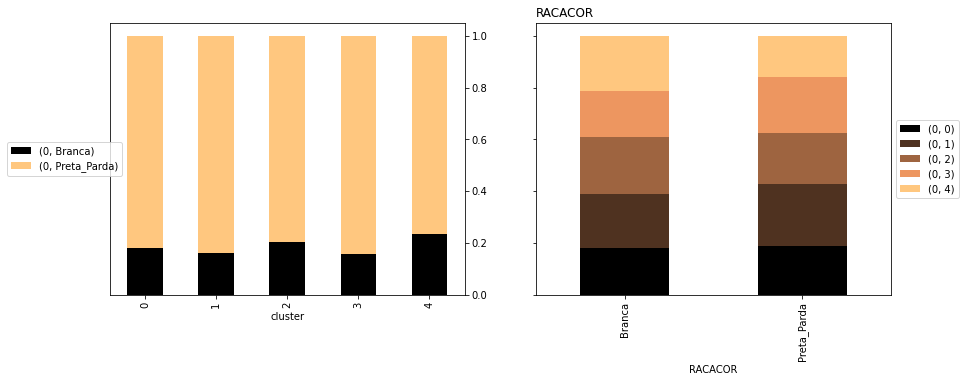

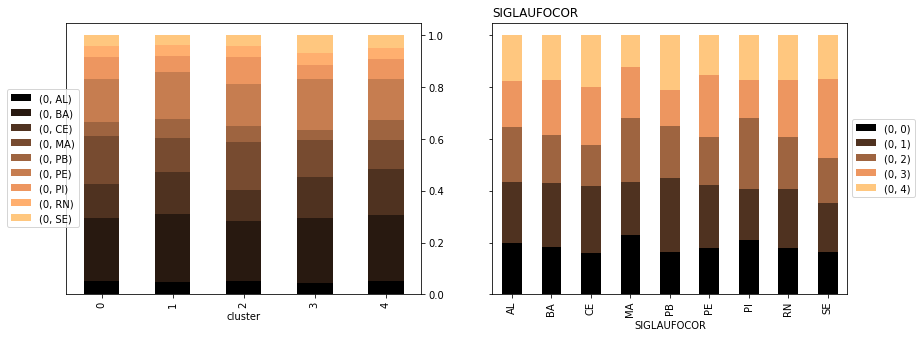

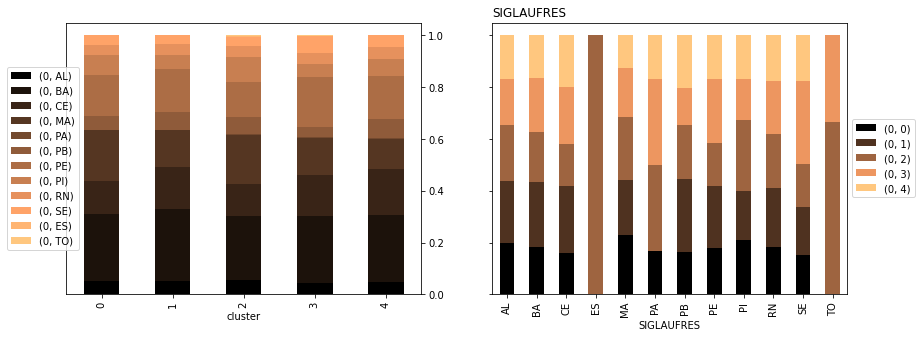

In [15]:
data_nordeste = data.loc[data.NOMEREGOCOR == regiao]
cluster_analysis(n_clusters = 5, models = models_nordeste, data=data_nordeste)

# Cluster Região

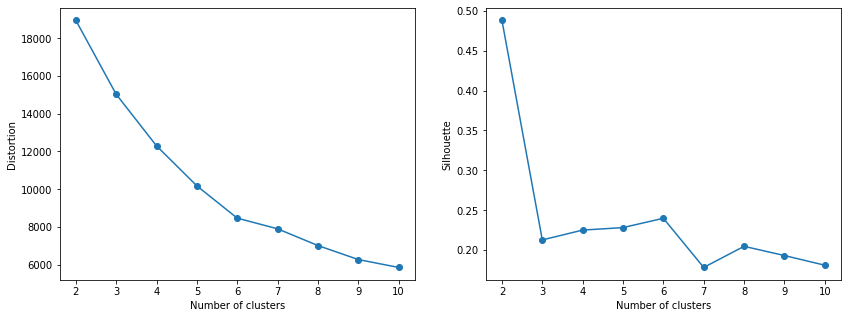

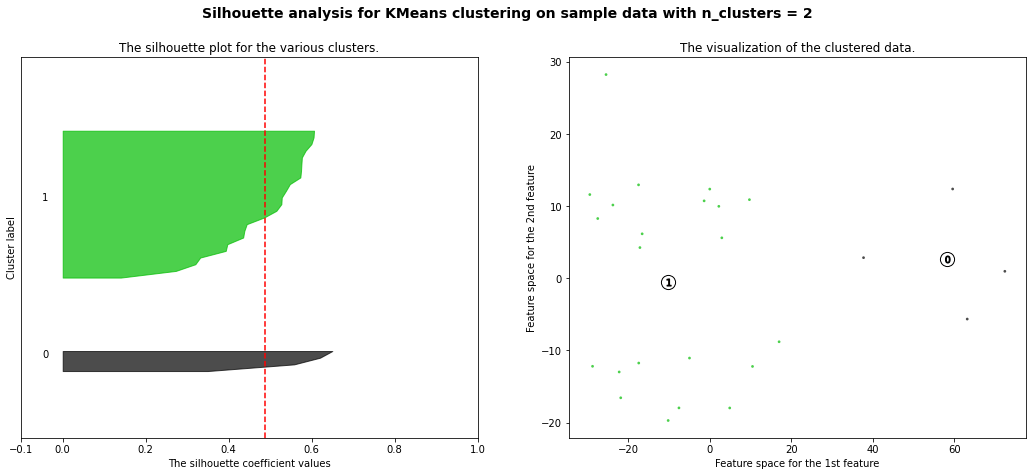

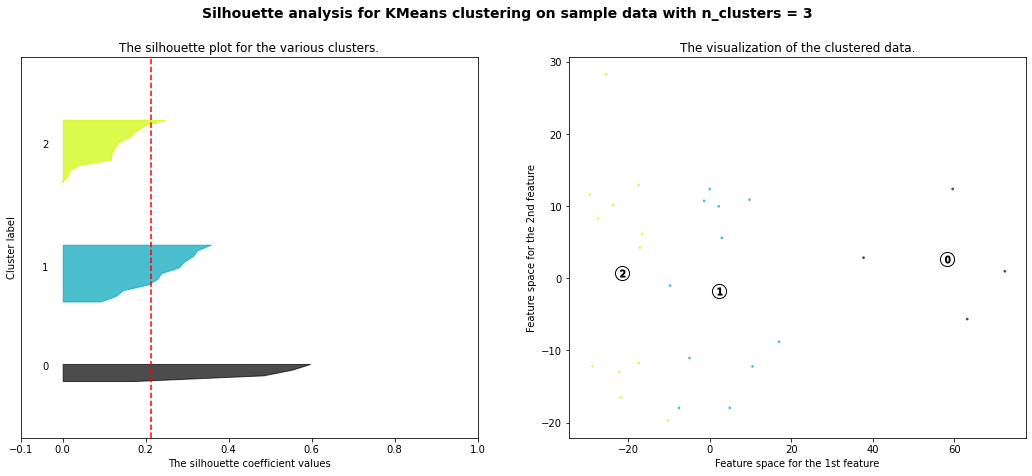

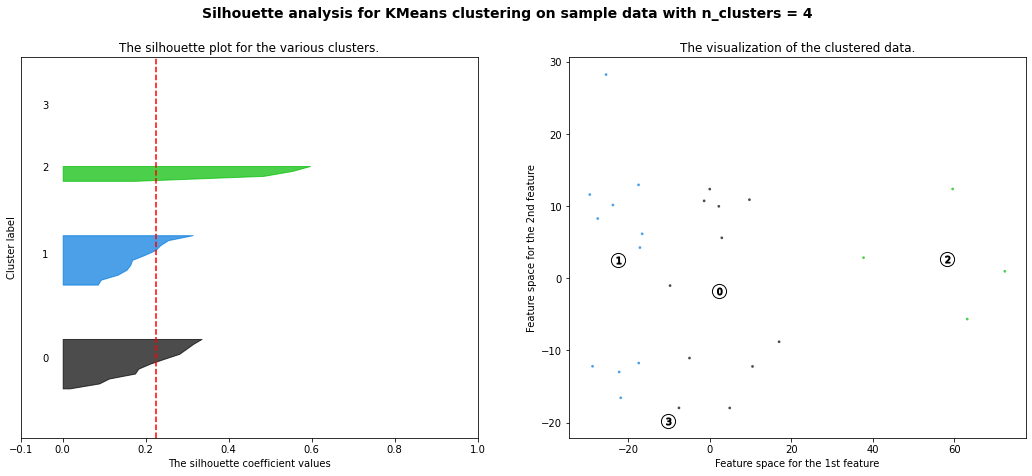

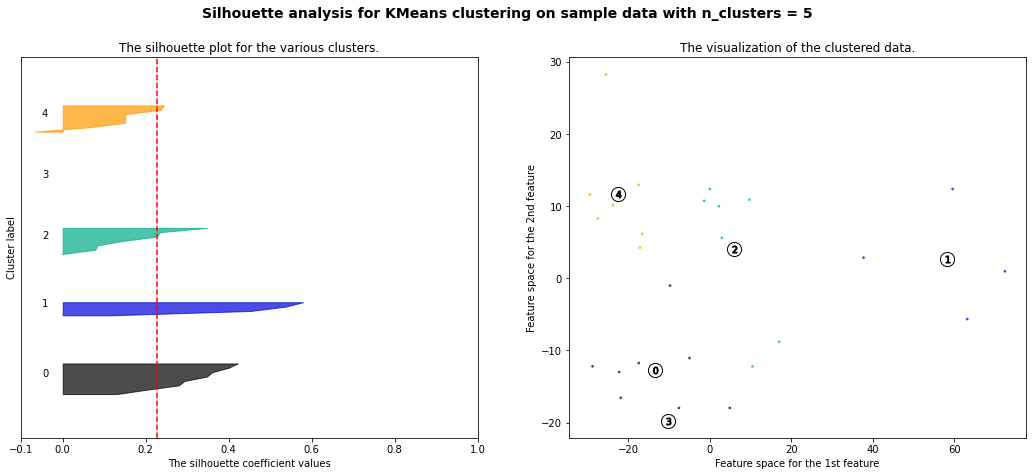

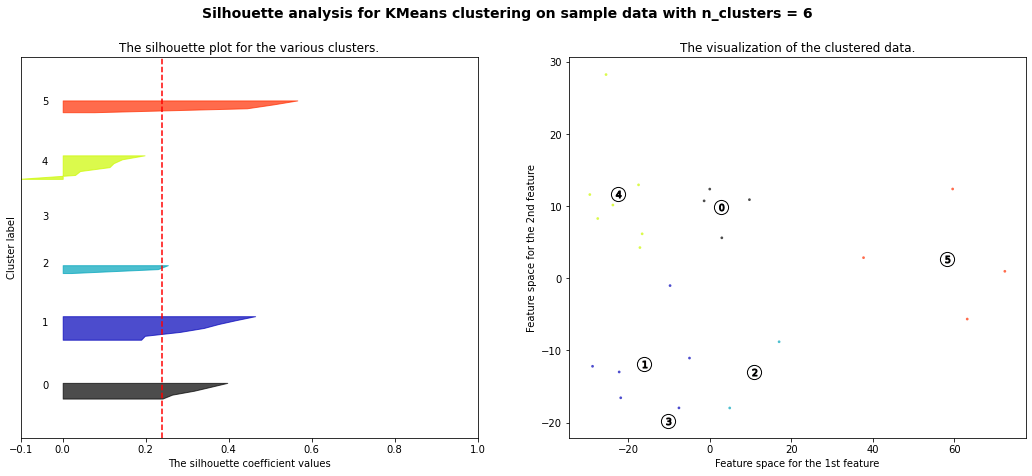

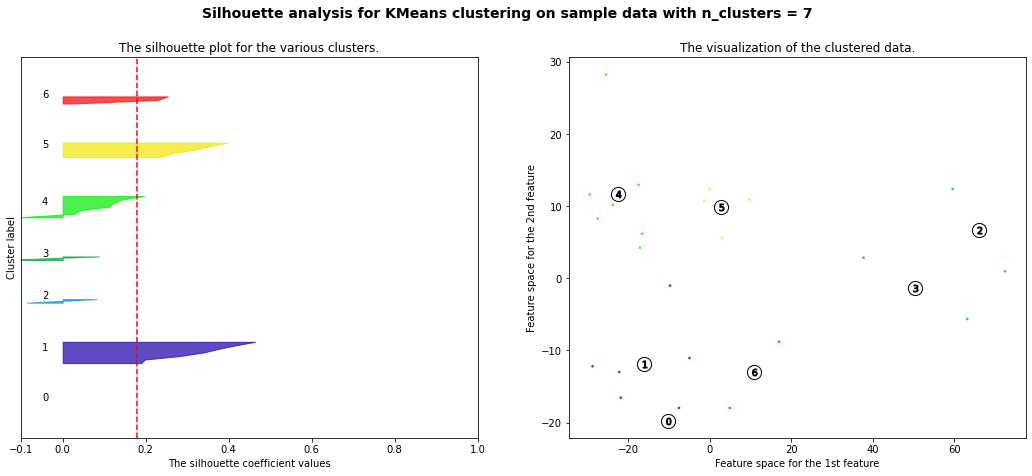

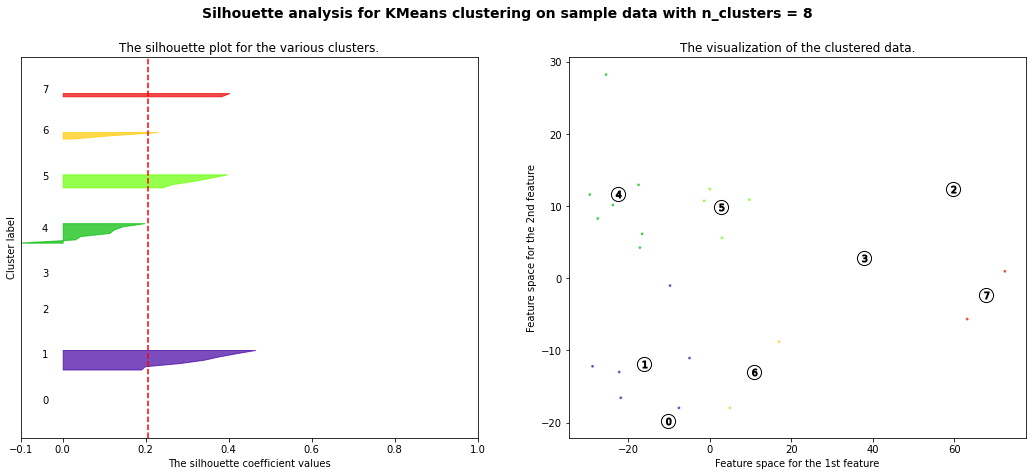

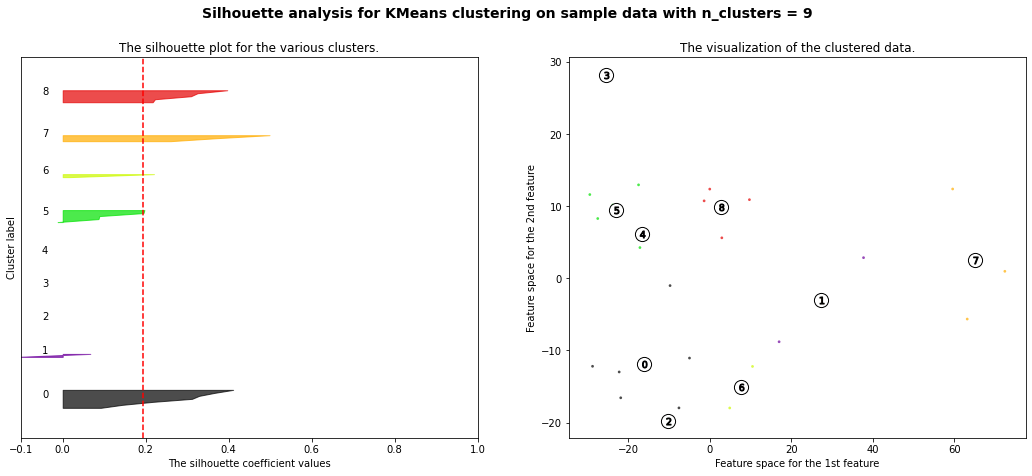

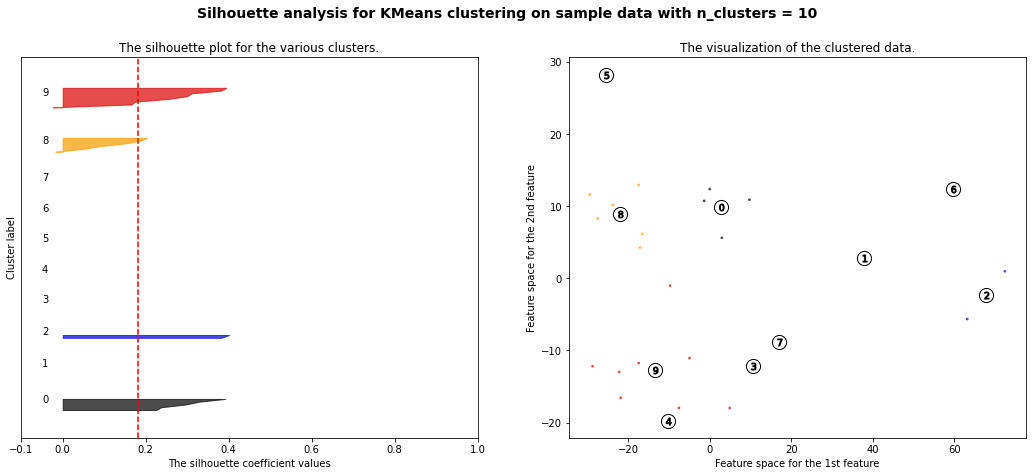

In [16]:
cluster_região = pd.read_csv('../data/cluster_estados.csv')

lemonade_regiao = pd.read_csv('../data/mortmat_tcc_pb_like.csv')
lemonade_regiao_label = lemonade_regiao[['ufs_ESTADO_COD', 'ufs_ESTADO_SIGLA', 'ufs_ESTADO_NOME']]
lemonade_regiao.fillna(0, inplace=True)

lemonade_regiao_label = pd.merge(cluster_região[['NOMEREGRES', 'NOMEUFRES']], lemonade_regiao_label, left_on='NOMEUFRES', right_on='ufs_ESTADO_NOME')

models = try_clusters_kmeans(X = lemonade_regiao.drop(['ufs_ESTADO_COD', 'ufs_ESTADO_SIGLA', 'ufs_ESTADO_NOME'],axis=1), range_n_clusters=10)

Cluster size:  cluster
0    8
1    4
2    7
3    1
4    7
dtype: int64


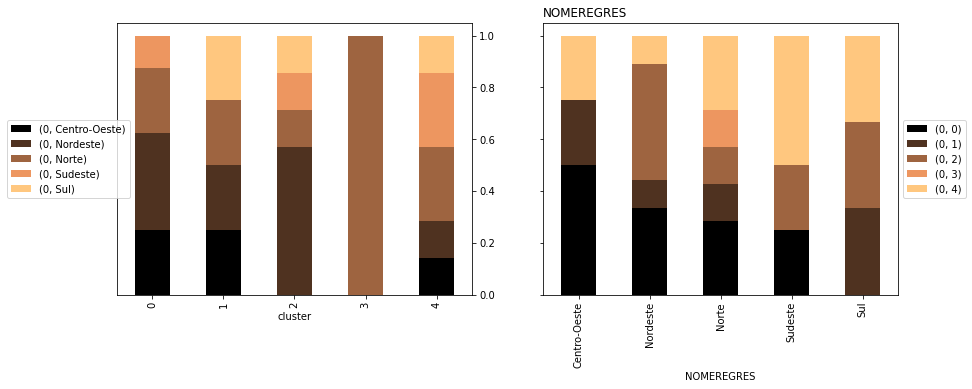

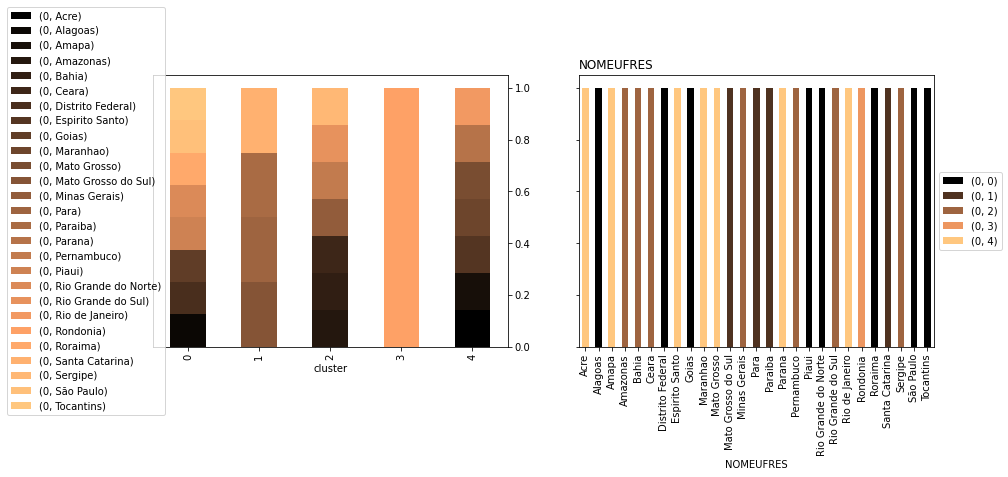

In [17]:
cluster_analysis(n_clusters = 5, data=lemonade_regiao_label[['NOMEREGRES', 'NOMEUFRES']], models=models)

# Agrupamento por RACACOR Branca

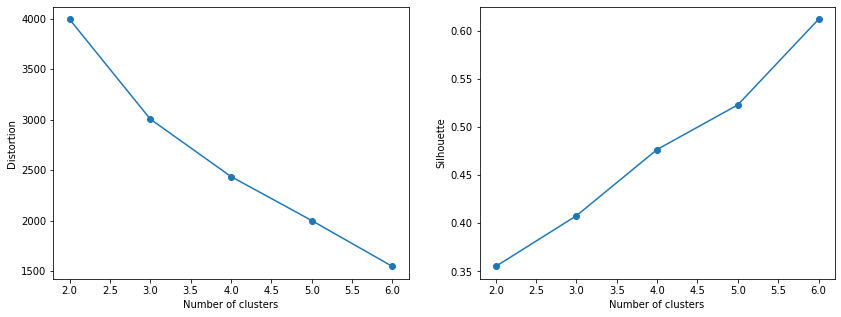

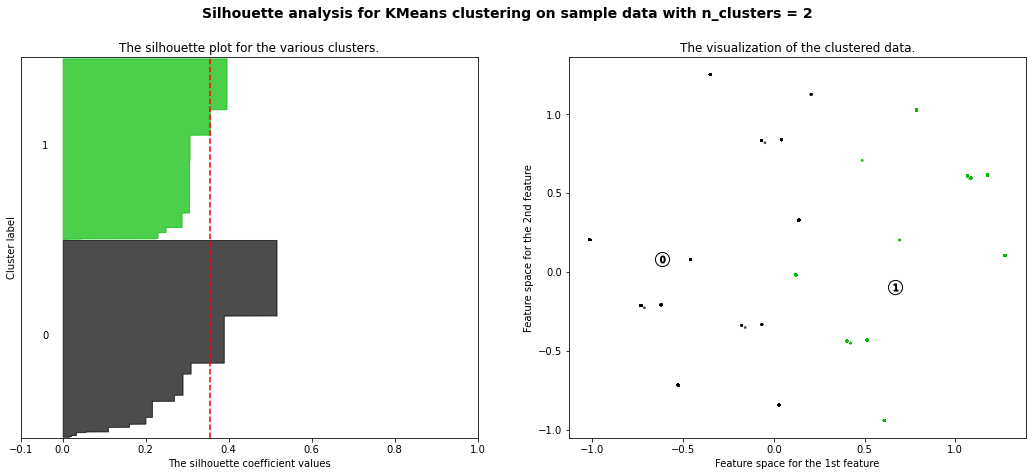

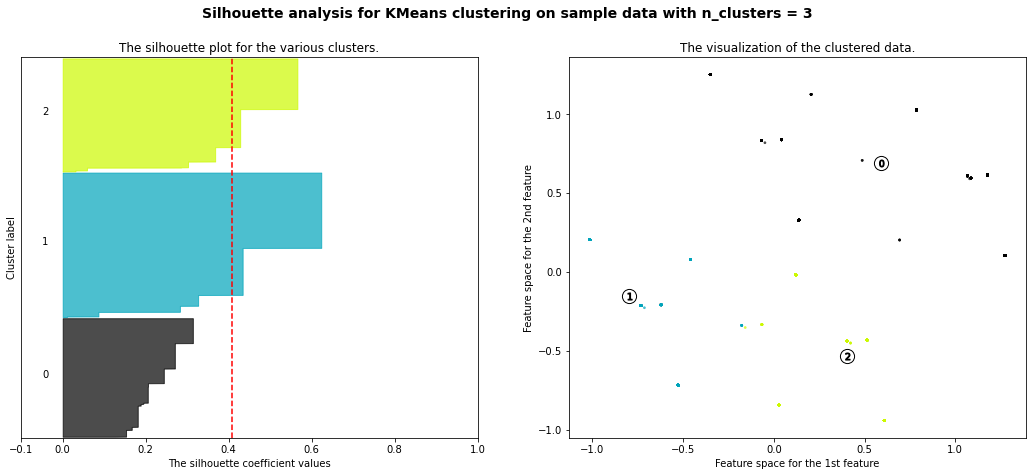

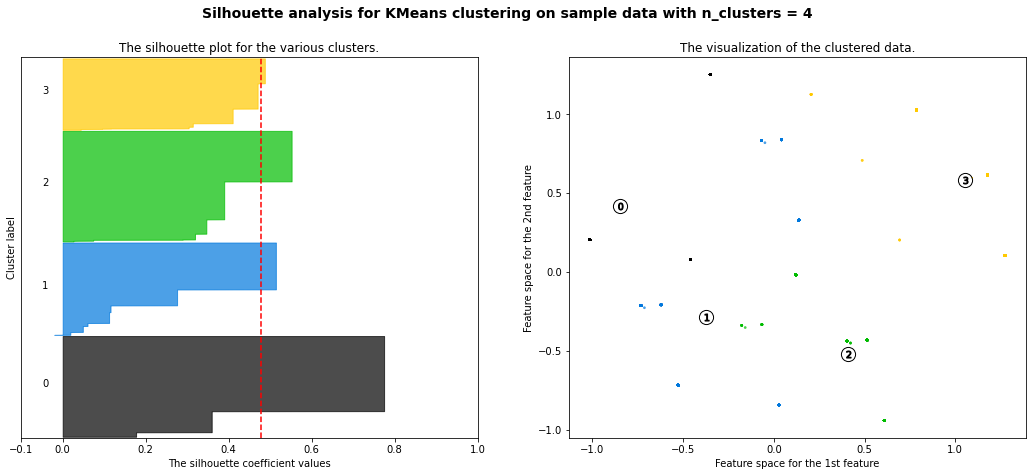

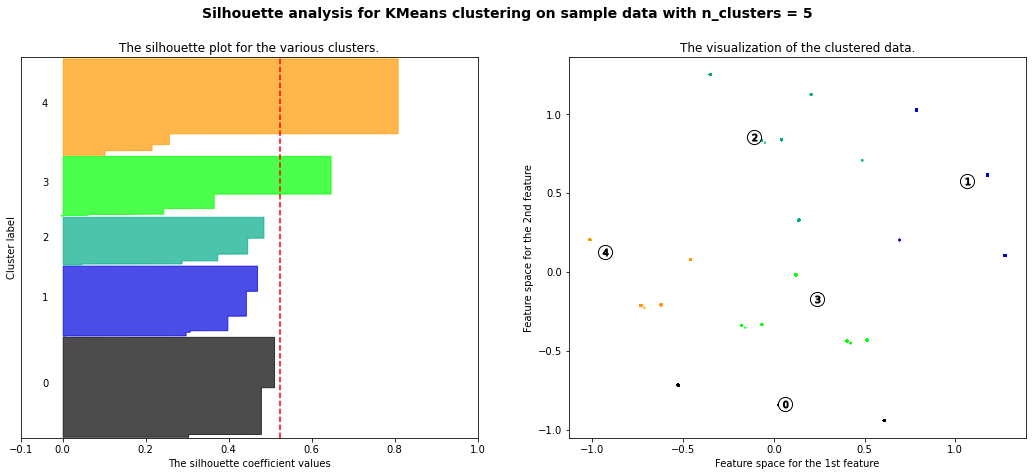

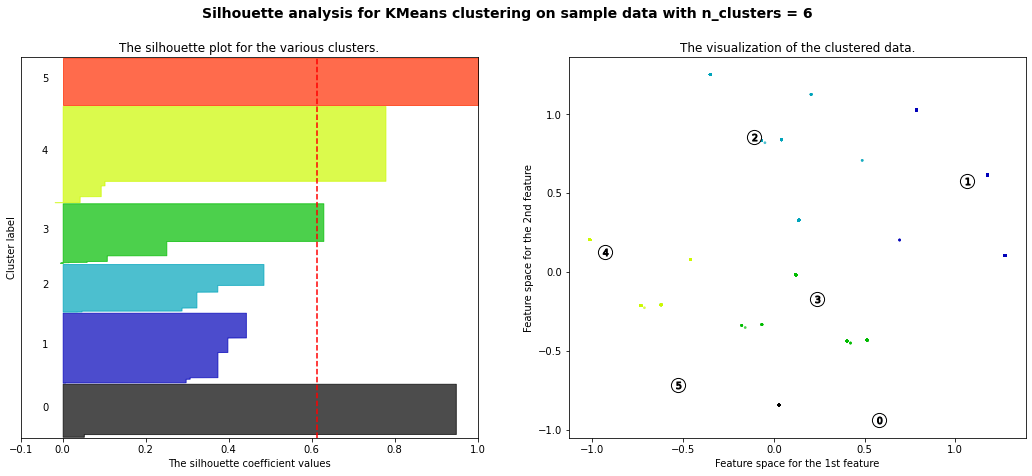

In [21]:
raca_cor = "Branca"

columns_simple = ['ESC_BAIXA', 'ESTCIVBIN', 'FAIXA_ETARIA']#, 'NOMEUFREG']
columns_complex = [ 'ESC_BAIXA', 'ESTCIVBIN', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA', #'NOMEUFREG',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP', 'CAUSADIRETA']


cluster_branca = data.loc[data.RACACOR == raca_cor,columns_simple]

cluster_branca = pd.get_dummies(cluster_branca)
cluster_branca.fillna(0, inplace=True)

new_columns = []
for col in cluster_branca.columns:
    new_columns.append(col.split(".")[0])    
cluster_branca.columns = new_columns

models_branca = try_clusters_kmeans(X = cluster_branca, range_n_clusters=6)

Cluster size:  cluster
0    962
1    675
2    460
3    576
4    927
dtype: int64


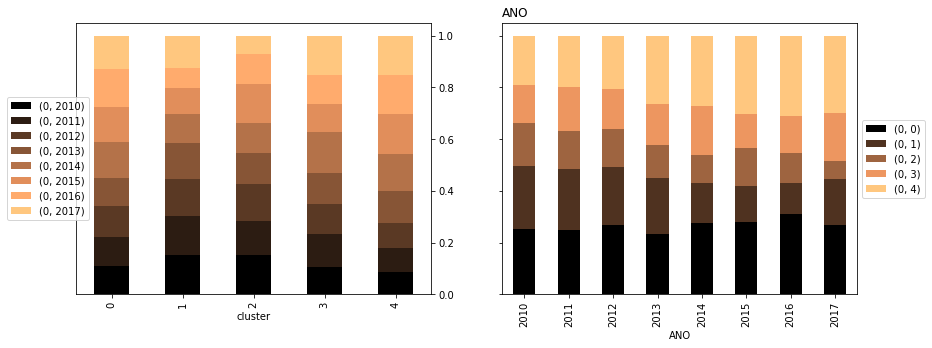

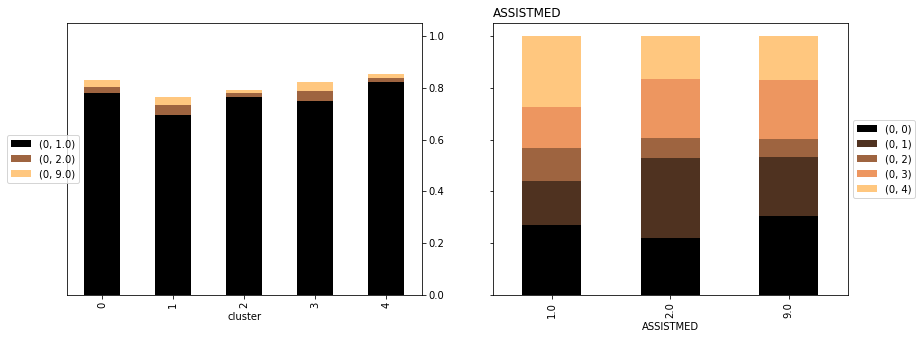

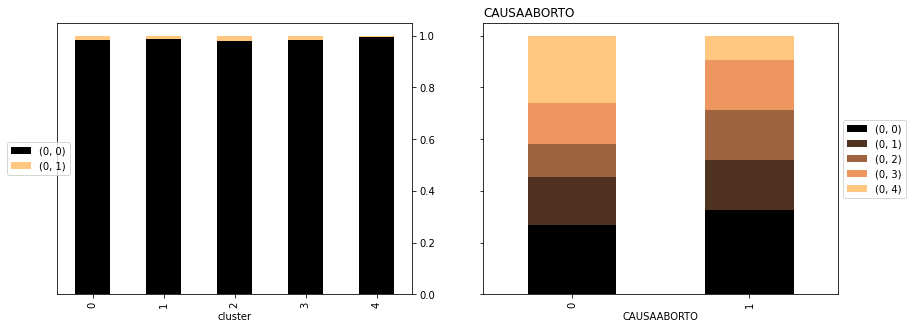

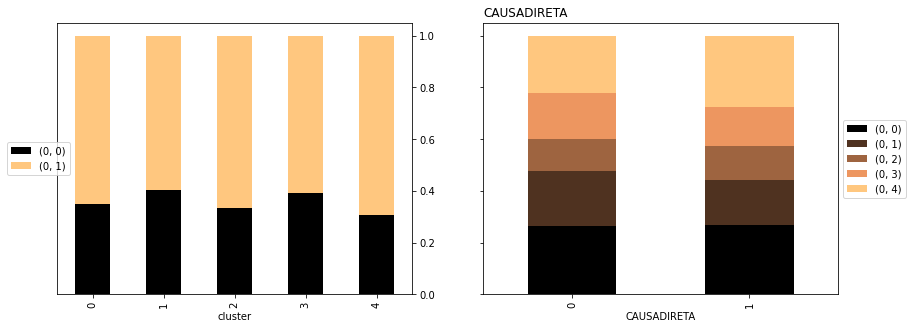

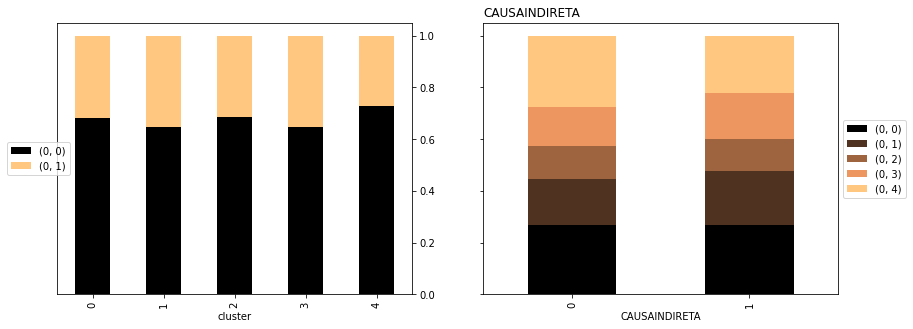

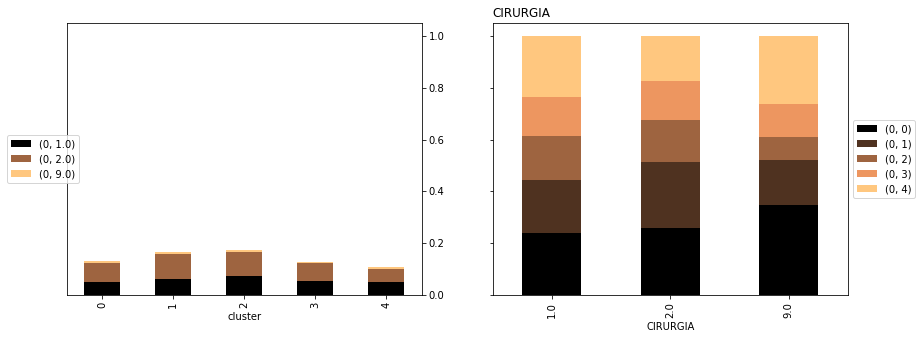

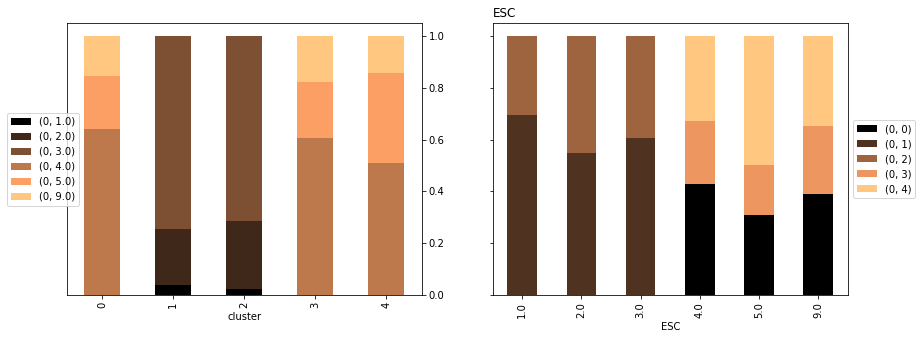

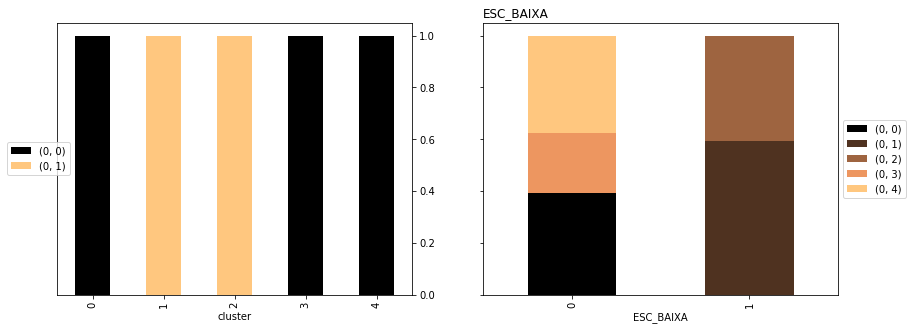

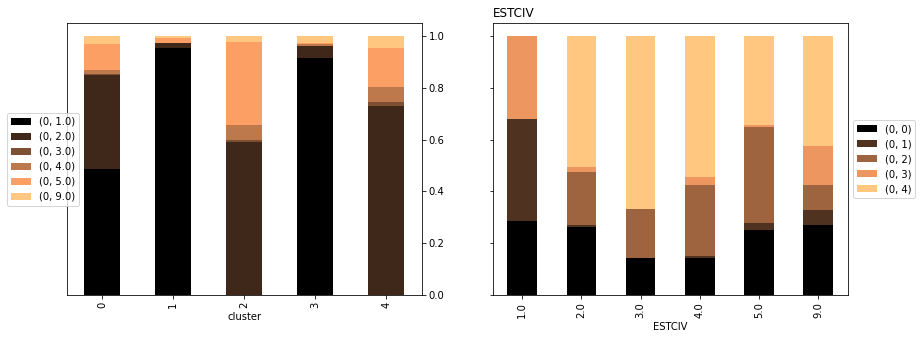

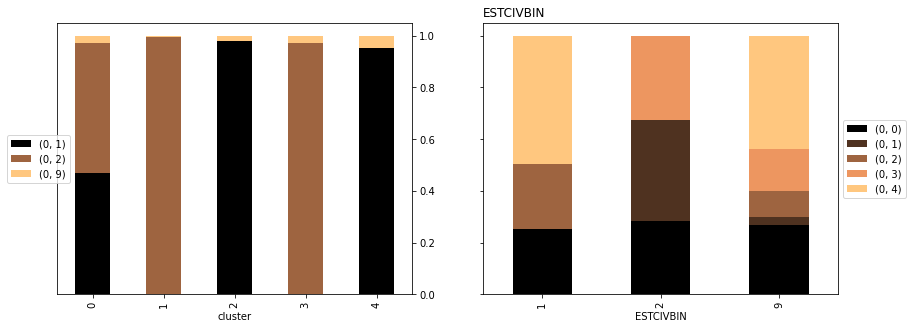

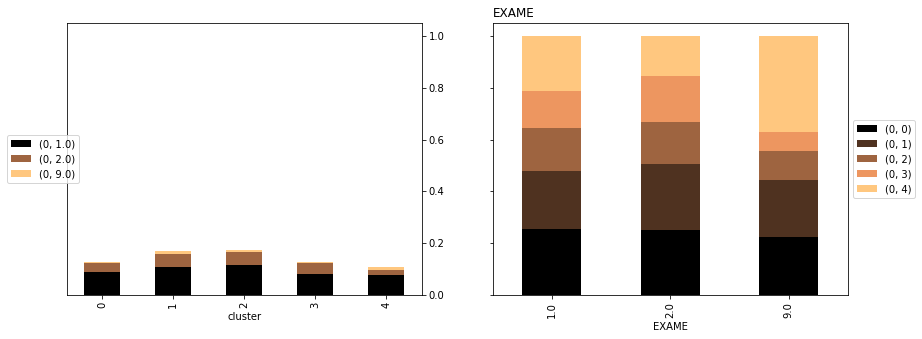

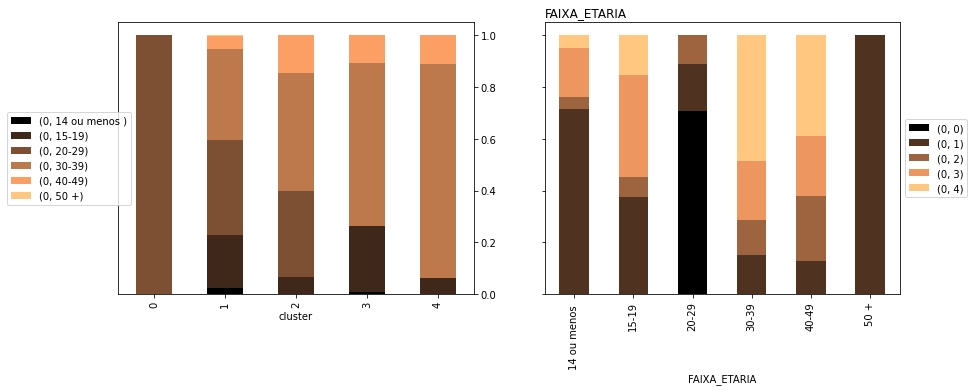

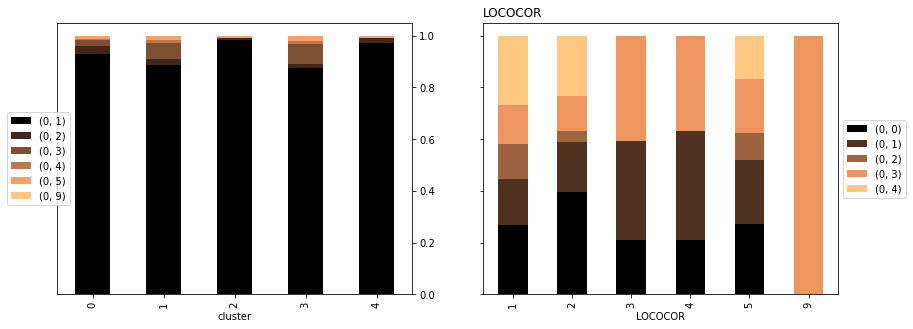

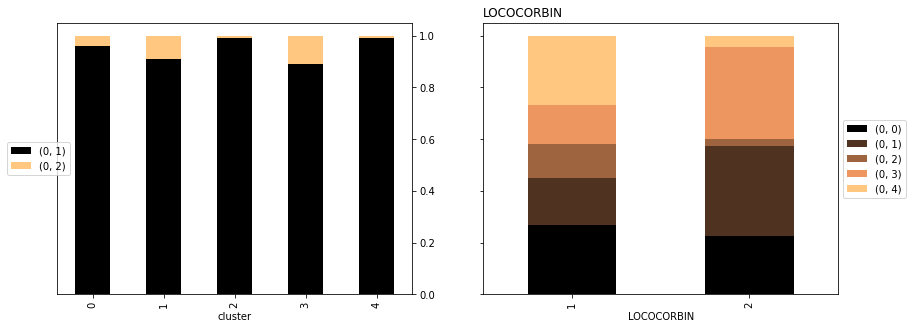

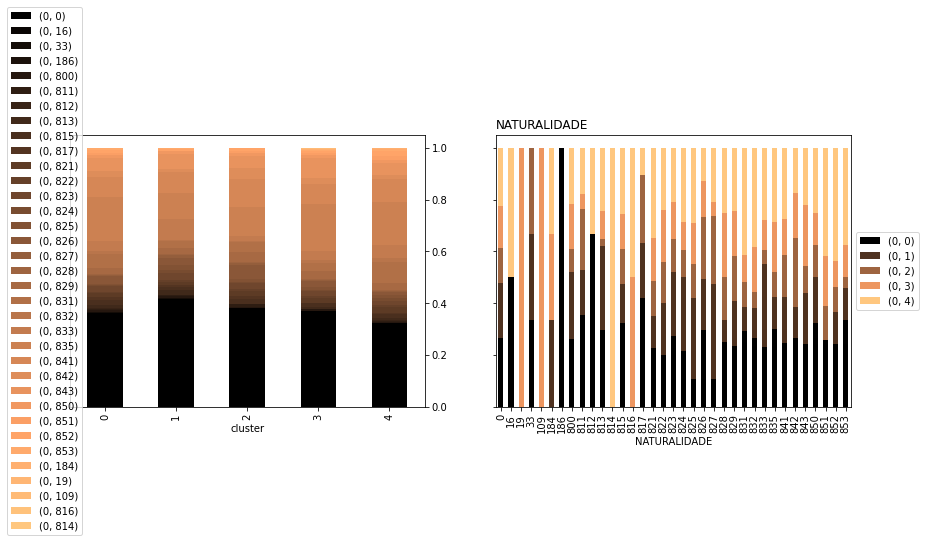

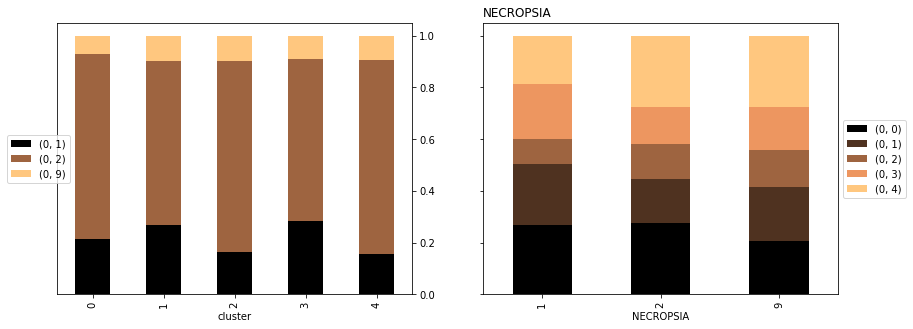

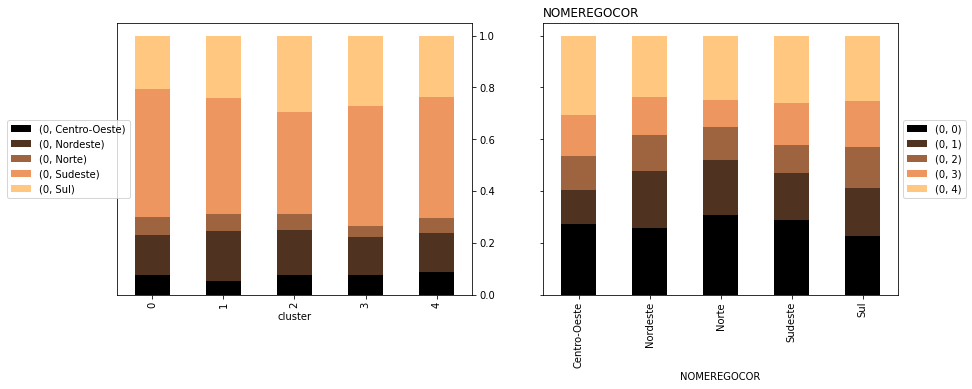

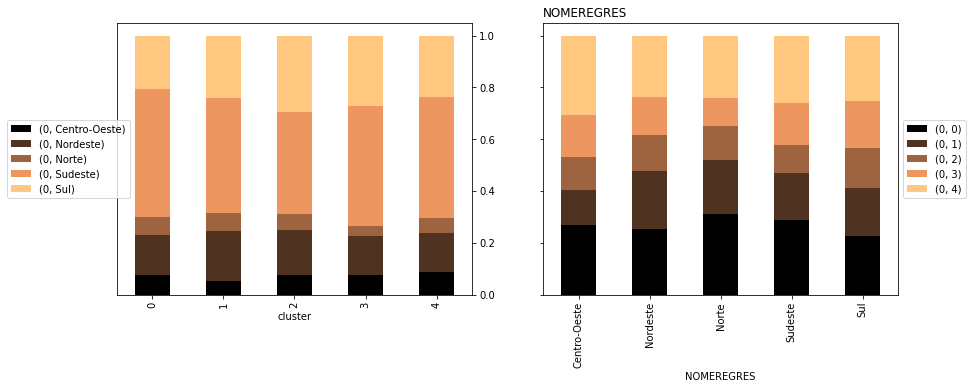

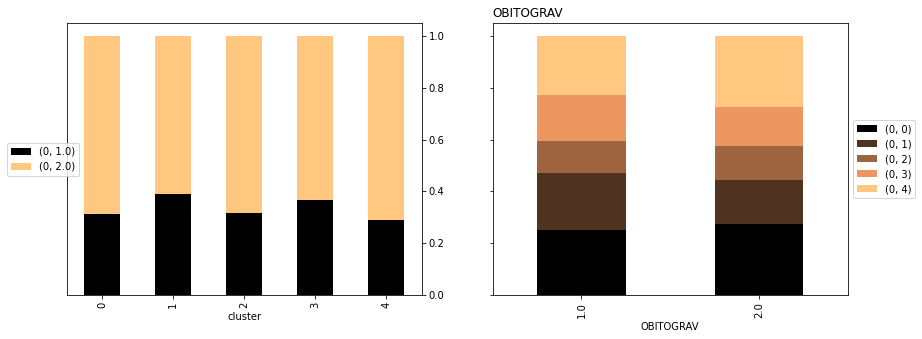

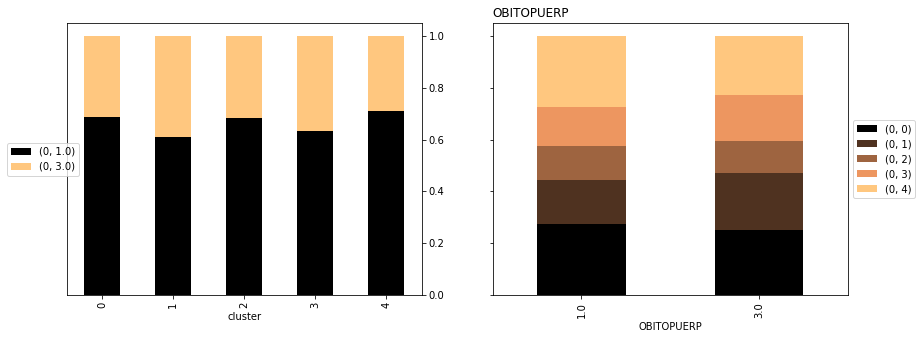

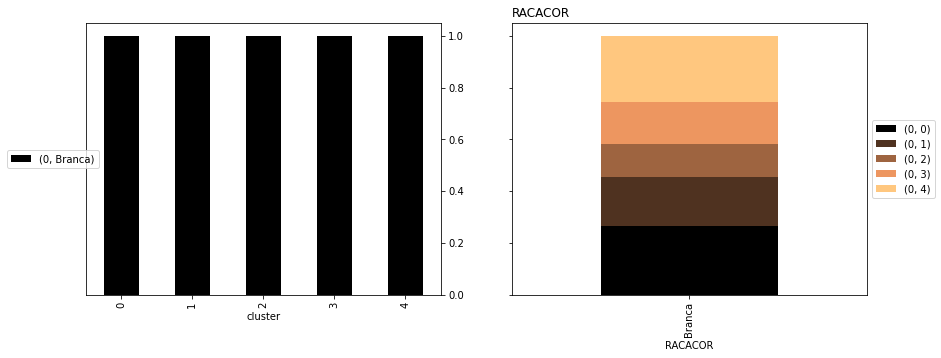

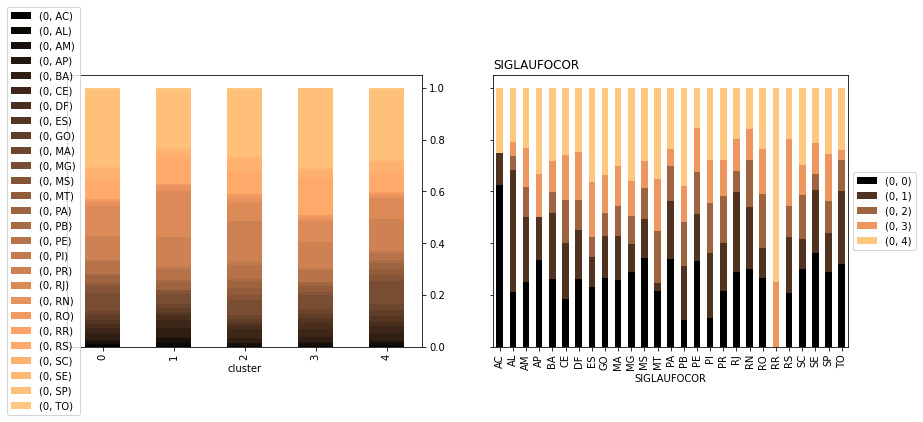

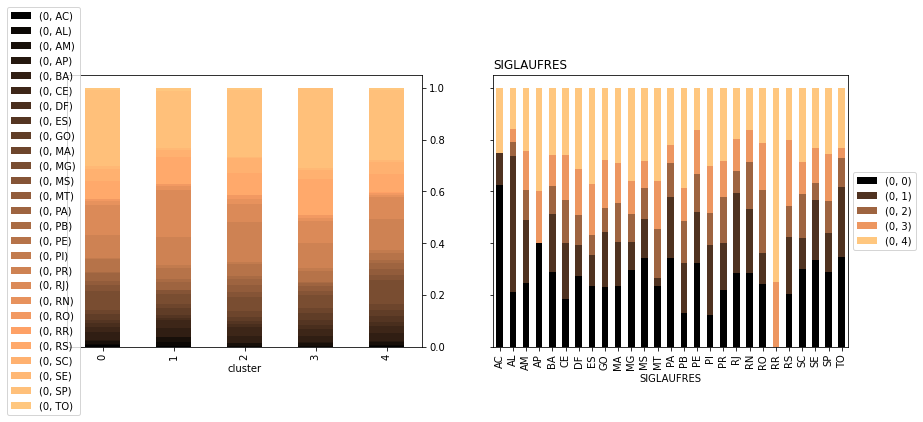

In [22]:
data_branca = data.loc[data.RACACOR == raca_cor]
cluster_analysis(n_clusters = 5, models = models_branca, data=data_branca)

# Agrupamento por RACACOR Preta

In [23]:
data.RACACOR.unique()

[Preta_Parda, Branca]
Categories (2, object): [Preta_Parda, Branca]

In [ ]:
raca_cor = "Preta_2"

columns_simple = ['ESC', 'ESTCIV', 'FAIXA_ETARIA']#, 'NOMEUFREG']
columns_complex = [ 'ESC', 'ESTCIV', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA', #'NOMEUFREG',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP', 'CAUSADIRETA']


cluster_preta = data.loc[data.RACACOR == raca_cor,columns_simple]

cluster_preta = pd.get_dummies(cluster_preta)
cluster_preta.fillna(0, inplace=True)

new_columns = []
for col in cluster_preta.columns:
    new_columns.append(col.split(".")[0])    
cluster_preta.columns = new_columns

models_preta = try_clusters_kmeans(X = cluster_preta, range_n_clusters=6)

In [ ]:
data_preta = data.loc[data.RACACOR == raca_cor]
cluster_analysis(n_clusters = 5, models = models_preta, data=data_preta)

# Agrupamento por RACACOR Parda

In [ ]:
raca_cor = "Parda_4"

columns_simple = ['ESC', 'ESTCIV', 'FAIXA_ETARIA']#, 'NOMEUFREG']
columns_complex = [ 'ESC', 'ESTCIV', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA', #'NOMEUFREG',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP', 'CAUSADIRETA']


cluster_parda = data.loc[data.RACACOR == raca_cor,columns_simple]

cluster_parda = pd.get_dummies(cluster_parda)
cluster_parda.fillna(0, inplace=True)

new_columns = []
for col in cluster_parda.columns:
    new_columns.append(col.split(".")[0])    
cluster_parda.columns = new_columns

models_parda = try_clusters_kmeans(X = cluster_parda, range_n_clusters=6)

In [ ]:
data_parda = data.loc[data.RACACOR == raca_cor]
cluster_analysis(n_clusters = 5, models = models_parda, data=data_parda)

# Agrupamento por RACACOR Indigena

In [ ]:
raca_cor = "Indigena_5"

columns_simple = ['ESC', 'ESTCIV', 'FAIXA_ETARIA']#, 'NOMEUFREG']
columns_complex = [ 'ESC', 'ESTCIV', 'FAIXA_ETARIA', 'ASSISTMED', 'CIRURGIA', #'NOMEUFREG',
                   'EXAME', 'LOCOCORBIN','NECROPSIA','OBITOPUERP', 'CAUSADIRETA']


cluster_indigena = data.loc[data.RACACOR == raca_cor,columns_simple]

cluster_indigena = pd.get_dummies(cluster_indigena)
cluster_indigena.fillna(0, inplace=True)

new_columns = []
for col in cluster_indigena.columns:
    new_columns.append(col.split(".")[0])    
cluster_indigena.columns = new_columns

models_indigena = try_clusters_kmeans(X = cluster_indigena, range_n_clusters=6)

In [ ]:
data_indigena = data.loc[data.RACACOR == raca_cor]
cluster_analysis(n_clusters = 5, models = models_indigena, data=data_indigena)